# Proyecto de Aprendizaje Supervisado
- Con este proyecto aprenderemos como construir, entrenar y evaluar un modelo que resuelva una tarea de regresión.
- Utilizaremos diversas librerías para la manipulación, análisis, visualización, modelado y evaluación de los datos.

## 1. Librerías básicas a utilizar

- Pandas: para el análisis de datos a través de dataframes (data tabular)
- Numpy: para todo lo relacionado con manipulación de arreglos y análisis numérico
- Seaborn y matplotlib.pyplot: para visualización de datos

In [1]:
# Importar librerías

# Manejo de analísis de datos a través de dataframes (data tabular)
import pandas as pd
# Manipulación de arreglos y análisis numérico
import numpy as np
# Visualización de datos
import seaborn as sns
# Visualización de datos
import matplotlib.pyplot as plt
%matplotlib inline

# Librería para el manejo de expresiones regulares
import re

import warnings
warnings.filterwarnings("ignore")

## 2. Lectura de los datos

- El primer paso es la Lectura del archivo csv a un dataframe de pandas
- Se trata de una tarea de regresión ya que la variable objetivo es la esperanza de vida (tipo continua)


In [2]:

df = pd.read_csv('Life_Expectancy_Data.csv')
df

Country  Year      Status  Life expectancy   Adult Mortality  \
0     Afghanistan  2015  Developing              65.0            263.0   
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
...           ...   ...         ...               ...              ...   
2933     Zimbabwe  2004  Developing              44.3            723.0   
2934     Zimbabwe  2003  Developing              44.5            715.0   
2935     Zimbabwe  2002  Developing              44.8             73.0   
2936     Zimbabwe  2001  Developing              45.3            686.0   
2937     Zimbabwe  2000  Developing              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0                62     0.01               71.279624         65.0      1154   
1                64     0.01               73.523582         62.0       492   
2                66     0.01               73.219243         64.0       430   
3                69     0.01               78.184215         67.0      2787   
4                71     0.01                7.097109         68.0      3013   
...             ...      ...                     ...          ...       ...   
2933             27     4.36                0.000000         68.0        31   
2934             26     4.06                0.000000          7.0       998   
2935             25     4.43                0.000000         73.0       304   
2936             25     1.72                0.000000         76.0       529   
2937             24     1.68                0.000000         79.0      1483   

      ...  Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  \
0     ...    6.0               8.16         65.0        0.1  584.259210   
1     ...   58.0               8.18         62.0        0.1  612.696514   
2     ...   62.0               8.13         64.0        0.1  631.744976   
3     ...   67.0               8.52         67.0        0.1  669.959000   
4     ...   68.0               7.87         68.0        0.1   63.537231   
...   ...    ...                ...          ...        ...         ...   
2933  ...   67.0               7.13         65.0       33.6  454.366654   
2934  ...    7.0               6.52         68.0       36.7  453.351155   
2935  ...   73.0               6.53         71.0       39.8   57.348340   
2936  ...   76.0               6.16         75.0       42.1  548.587312   
2937  ...   78.0               7.10         78.0       43.5  547.358878   

      Population   thinness  1-19 years   thinness 5-9 years  \
0     33736494.0                   17.2                 17.3   
1       327582.0                   17.5                 17.5   
2     31731688.0                   17.7                 17.7   
3      3696958.0                   17.9                 18.0   
4      2978599.0                   18.2                 18.2   
...          ...                    ...                  ...   
2933  12777511.0                    9.4                  9.4   
2934  12633897.0                    9.8                  9.9   
2935    125525.0                    1.2                  1.3   
2936  12366165.0                    1.6                  1.7   
2937  12222251.0                   11.0                 11.2   

      Income composition of resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427      

Al hacer el llamado al dataframe, podemos dar un primer vistazo al conjunto de datos. 

## 3. Análisis Exploratorio de Datos

- Limpieza de datos
- Exploración de datos
- Ingeniería de datos

### 3.1. Limpieza de datos

Para realizar una apropiada limpieza de datos se deben entender cada una de las variables presentes dentro del conjunto de datos.

Elementos a tener en cuenta:
- El significado y tipo (e.g. nominal/ordinal/intervalo/ratio) de cada una de las variables
- Identificación de valores faltantes y en caso de haberlos plantear las opciones para tratarlos
- Presencia de datos atípicos y en caso de haberlos identificar la manera de tratarlos


In [3]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

Formateamos los nombres de las variables 

En esta expresión regular está reemplazando todos los espacios (más de 1 espacios) por 1 solo espacio. Con el strip se le quita el espacio al principio y al final. Y finalmente se le reemplaza los espacios por _ y se coloca todo por minúscula. 

In [4]:
def format_columns(df):
    result = df.copy()
    new_cols = []
    for col in result.columns:
        new_cols.append(re.sub(r'\s+', ' ',col.strip()).replace(' ','_').lower())
    result.columns = new_cols
    return result

Descripciones de variables

- country (Nominal): país del que se están analizando los indicadores
- year (Ordinal): año en el que fueron recopilados los indicadores (2000 a 2015)
- status (Nominal): si se considera como una país desarrollado o en vía de desarrollo
- life_expectancy (Ratio): la esperanza de vida de las personas de dicho país para ese año en particular 
- adult_mortality (Ratio): el promedio de mortalidad adulta de cada 1000 personas
- infant_deaths (Ratio): el promedio de mortalidad infantil de cada 1000 personas
- alcohol (Ratio): el promedio de consumo de alcohol medido en litros de alcohol puro per capita 
- percentage_expenditure (Ratio): gastos en salud como porcentaje del PIB 
- hepatitis_b (Ratio): número de niños de 1 año inmunizados contra la hepatitis B sobre toda la población de niños de 1 año de edad
- measles (Ratio): número de casos reportados de sarampión 1000 personas 
- bmi (Interval/Ordinal): promedio de índice de masa corporal de la población total 
- under-five_deaths (Ratio): número de muertes de niños por debajo de los 5 años por 1000 personas
- polio (Ratio): número de niños de 1 año inmunizados contra el polio sobre toda la población de niños de 1 año de edad
- total_expenditure (Ratio): gasto gubernamental en salud como un porcentaje del total de gastos del gobierno 
- diphtheria (Ratio): Tasa de inmunización contra difteria, tétanos y tosferina (DTP3) en niños de 1 año
- hiv/aids (Ratio): Muertes por cada 1000 nacidos vivos causadas por el VIH/SIDA en personas menores de 5 años 
- gdp (Ratio): PIB per capita 
- population (Ratio): población de un país
- thinness_1-19_years (Ratio): tasa de delgadez entre personas de 10 a 19 años
- thinness_5-9_years (Ratio): tasa de delgadez entre personas de 5 a 9 años
- income_composition_of_resources (Ratio):  Índice de Desarrollo Humano en términos de composición del ingreso de los recursos (índice que varía de 0 a 1)
- schooling (Ratio): número promedio de años de escolaridad de una población

Debemos renombrar una variable que tenía un nombre errado de acuerdo con su descripción, pues no era delgadez de 1 a 19 años sino de 10 a 19 años.

In [5]:
from sklearn.base import BaseEstimator, TransformerMixin

# Creamos un Transformer para renombrar columnas
class Rename_columns(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        result = X.copy()
        result = format_columns(result)
        result = result.rename(columns={'thinness_1-19_years':'thinness_10-19_years'})
        return result

In [6]:
df_renamed = Rename_columns().fit_transform(df)

In [7]:
df_renamed.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_10-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

Tenemos nuestro dataset con nuestras columnas renombradas

### Valores faltantes

- Detección de valores faltantes
- Manejo de valores faltantes

### ¿Qué podemos hacer con estos?

- Identificar valores faltantes (no necesariamente representados por null)
- Imputarlos
- Eliminarlos (registros o columnas)

In [8]:
df_renamed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   year                             2938 non-null   int64  
 2   status                           2938 non-null   object 
 3   life_expectancy                  2928 non-null   float64
 4   adult_mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   hepatitis_b                      2385 non-null   float64
 9   measles                          2938 non-null   int64  
 10  bmi                              2904 non-null   float64
 11  under-five_deaths                2938 non-null   int64  
 12  polio               

In [9]:
df_renamed.isnull().sum()

country                              0
year                                 0
status                               0
life_expectancy                     10
adult_mortality                     10
infant_deaths                        0
alcohol                            194
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 34
under-five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
hiv/aids                             0
gdp                                448
population                         652
thinness_10-19_years                34
thinness_5-9_years                  34
income_composition_of_resources    167
schooling                          163
dtype: int64

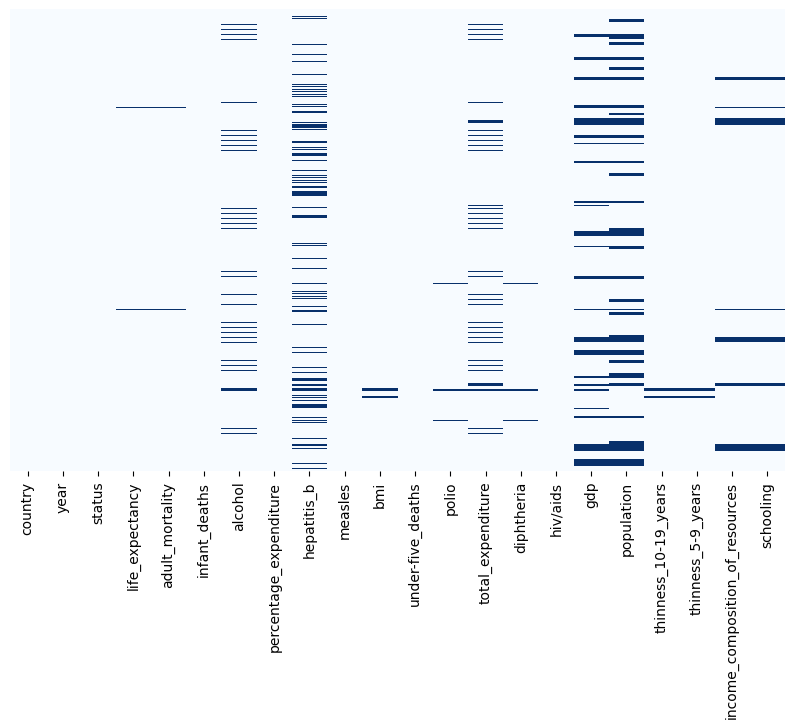

In [10]:
# Para revisar datos faltantes podemos dibujar un mapa de calor
# Nos permite encontrar la ubicación de dichos datos faltantes

plt.figure(figsize=(10,6))
sns.heatmap(df_renamed.isnull(), yticklabels = False, cbar = False, cmap="Blues")
plt.show()

Con los métodos info e isnull podemos encontrar rápidamente aquellos datos explícitamente nulos.

Vamos a revisar aquellos que no son explícitamente nulos:
- Utilizamos el método describe para revisar cada variable para revisar si su descripción tiene sentido. 

In [11]:
df_renamed.describe()

year  life_expectancy  adult_mortality  infant_deaths  \
count  2938.000000      2928.000000      2928.000000    2938.000000   
mean   2007.518720        69.224932       164.796448      30.303948   
std       4.613841         9.523867       124.292079     117.926501   
min    2000.000000        36.300000         1.000000       0.000000   
25%    2004.000000        63.100000        74.000000       0.000000   
50%    2008.000000        72.100000       144.000000       3.000000   
75%    2012.000000        75.700000       228.000000      22.000000   
max    2015.000000        89.000000       723.000000    1800.000000   

           alcohol  percentage_expenditure  hepatitis_b        measles  \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

               bmi  under-five_deaths        polio  total_expenditure  \
count  2904.000000        2938.000000  2919.000000         2712.00000   
mean     38.321247          42.035739    82.550188            5.93819   
std      20.044034         160.445548    23.428046            2.49832   
min       1.000000           0.000000     3.000000            0.37000   
25%      19.300000           0.000000    78.000000            4.26000   
50%      43.500000           4.000000    93.000000            5.75500   
75%      56.200000          28.000000    97.000000            7.49250   
max      87.300000        2500.000000    99.000000           17.60000   

        diphtheria     hiv/aids            gdp    population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

       thinness_10-19_years  thinness_5-9_years  \
count           2904.000000         2904.000000   
mean               4.839704            4.870317   
std                4.420195            4.508882   
min                0.100000            0.100000   
25%                1.600000            1.500000   
50%                3.300000            3.300000   
75%                7.200000            7.200000   
max               27.700000           28.600000   

       income_composition_of_resources    schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

¿Qué no tiene sentido a partir de la descripción anterior?
- Mortalidad adulta: Parece un error el tener tan solo una muerte para algún país.
- Mortalidad infantil por cada 1000 personas: No parece factible tener 0 muertes o 1800  (dato atípico aunque posible si se tiene en cuenta un país con alta tasa de nacimientos y una población no tan alta).
- Índice de masa corporal: 15 o menos se considera extremo bajo peso. 1 no tiene sentido. 40 o más es extremadamente obeso. 87.3 no parece real. 
- Muertes de niños de menos 5 años de edad: 0 no resulta real.
- PIB: Un producto Interno Bruto de 1.68 dólares no parece posible.
- Población: 34 personas como población para todo un país no es sensato. 

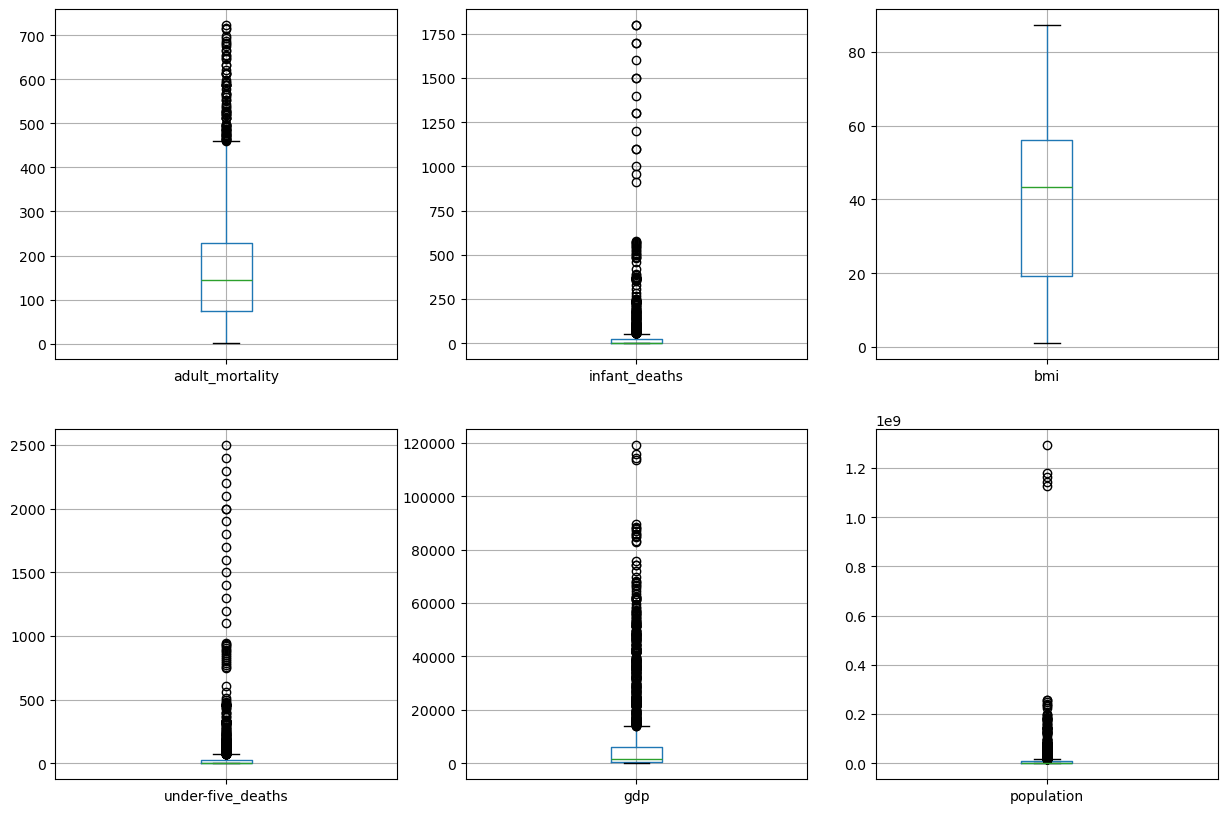

In [12]:
# Utilizamos diagramas de cajas y bigotes para verificar las variables que parecieron no tener sentido
plt.figure(figsize=(15,10))
for i, col in enumerate(['adult_mortality', 'infant_deaths', 'bmi', 'under-five_deaths', 'gdp', 'population'], start=1):
    plt.subplot(2, 3, i)
    df_renamed.boxplot(col)

Aunque a partir de estos diagramas podemos observar datos atípicos, ciertamente algunos de ellos son errores y deberíamos cambiarlos a nulos.
- Mortalidad adulta menor al quinto percentil
- Mortalidad infantil de 0
- Índice de Masa Corporal menor a 10 y mayor a 50
- Muertes de niños menores a 5 años de 0

In [13]:
# Creamos un Transformer personalizado que nos convierte a nulos los datos erróneos
class Nullify_variables(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        result = X.copy()
        mort_5_percentile = np.percentile(df.iloc[:,4].dropna(), 5)
        result.iloc[:,4] = result.apply(lambda x: np.nan if x.adult_mortality < mort_5_percentile else x.adult_mortality, axis=1)
        result.infant_deaths = result.infant_deaths.replace(0, np.nan)
        result.bmi = result.apply(lambda x: np.nan if (x.bmi < 10 or x.bmi > 50) else x.bmi, axis=1)
        result['under-five_deaths'] = result['under-five_deaths'].replace(0, np.nan)
        return result

In [14]:
df_nulls = Nullify_variables().fit_transform(df_renamed)

In [15]:
df_nulls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   year                             2938 non-null   int64  
 2   status                           2938 non-null   object 
 3   life_expectancy                  2928 non-null   float64
 4   adult_mortality                  2783 non-null   float64
 5   infant_deaths                    2090 non-null   float64
 6   alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   hepatitis_b                      2385 non-null   float64
 9   measles                          2938 non-null   int64  
 10  bmi                              1482 non-null   float64
 11  under-five_deaths                2153 non-null   float64
 12  polio               

Hacemos la transformación y asignamos los valores a un nuevo dataframe de tal manera que podamos analizar los resultados.

A partir de los datos se observa que hay una cantidad considerable de valores nulos.

La idea es analizar estos datos de manera que podamos tomar una decisión informado sobre como tratarlos.

In [16]:
# Nos da un análisis pormenorizado de las variables con valores nulos explícitos
def nulls_breakdown(df):
    df_cols = list(df.columns)
    cols_total_count = len(list(df.columns))
    cols_count = 0
    for loc, col in enumerate(df_cols):
        null_count = df[col].isnull().sum()
        total_count = df[col].isnull().count()
        percent_null = round(null_count/total_count*100, 2)
        if null_count > 0:
            cols_count += 1
            print('[iloc = {}] {} has {} null values: {}% null'.format(loc, col, null_count, percent_null))
    cols_percent_null = round(cols_count/cols_total_count*100, 2)
    print('Out of {} total columns, {} contain null values; {}% columns contain null values.'.format(cols_total_count, cols_count, cols_percent_null))

In [17]:
nulls_breakdown(df_nulls)

[iloc = 3] life_expectancy has 10 null values: 0.34% null
[iloc = 4] adult_mortality has 155 null values: 5.28% null
[iloc = 5] infant_deaths has 848 null values: 28.86% null
[iloc = 6] alcohol has 194 null values: 6.6% null
[iloc = 8] hepatitis_b has 553 null values: 18.82% null
[iloc = 10] bmi has 1456 null values: 49.56% null
[iloc = 11] under-five_deaths has 785 null values: 26.72% null
[iloc = 12] polio has 19 null values: 0.65% null
[iloc = 13] total_expenditure has 226 null values: 7.69% null
[iloc = 14] diphtheria has 19 null values: 0.65% null
[iloc = 16] gdp has 448 null values: 15.25% null
[iloc = 17] population has 652 null values: 22.19% null
[iloc = 18] thinness_10-19_years has 34 null values: 1.16% null
[iloc = 19] thinness_5-9_years has 34 null values: 1.16% null
[iloc = 20] income_composition_of_resources has 167 null values: 5.68% null
[iloc = 21] schooling has 163 null values: 5.55% null
Out of 22 total columns, 16 contain null values; 72.73% columns contain null val

¿Qué obtenemos a partir de este análisis?
- Casi la mitad de los valores de BMI son nulos. 
- Tiene sentido eliminar dicha columna.
- Otras 15 columnas contienen valores nulos. 
- Para las restantes columnas se pueden imputar los datos teniendo en cuenta la media por año. (teniendo en cuenta que es una serie de tiempo)
- Se puede usar KNN para imputar y luego comparar resultados

In [18]:
# Creamos un Transformer personalizado que nos elimina valores nulos
# Eliminamos los registros con valores faltantes en la variable objetivo
# Eliminamos la columna BMI
# Las otras columnas con valores faltantes las imputamos con la media por año
class Remove_null_values_mean(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        result = X.copy()
        result = result.drop(columns='bmi')
        imputed_data = []
        for year in list(result.year.unique()):
            year_data = result[result.year == year].copy()
            for col in list(year_data.columns)[3:]:
                year_data[col] = year_data[col].fillna(year_data[col].dropna().mean()).copy()
            imputed_data.append(year_data)
        result = pd.concat(imputed_data).copy()
        return result

In [19]:
df_non_nulls_mean = Remove_null_values_mean().fit_transform(df_nulls)

In [20]:
nulls_breakdown(df_non_nulls_mean)

Out of 21 total columns, 0 contain null values; 0.0% columns contain null values.


In [21]:
df_non_nulls_mean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   year                             2938 non-null   int64  
 2   status                           2938 non-null   object 
 3   life_expectancy                  2938 non-null   float64
 4   adult_mortality                  2938 non-null   float64
 5   infant_deaths                    2938 non-null   float64
 6   alcohol                          2938 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   hepatitis_b                      2938 non-null   float64
 9   measles                          2938 non-null   int64  
 10  under-five_deaths                2938 non-null   float64
 11  polio                            2938 non-null   float64
 12  total_expenditure        

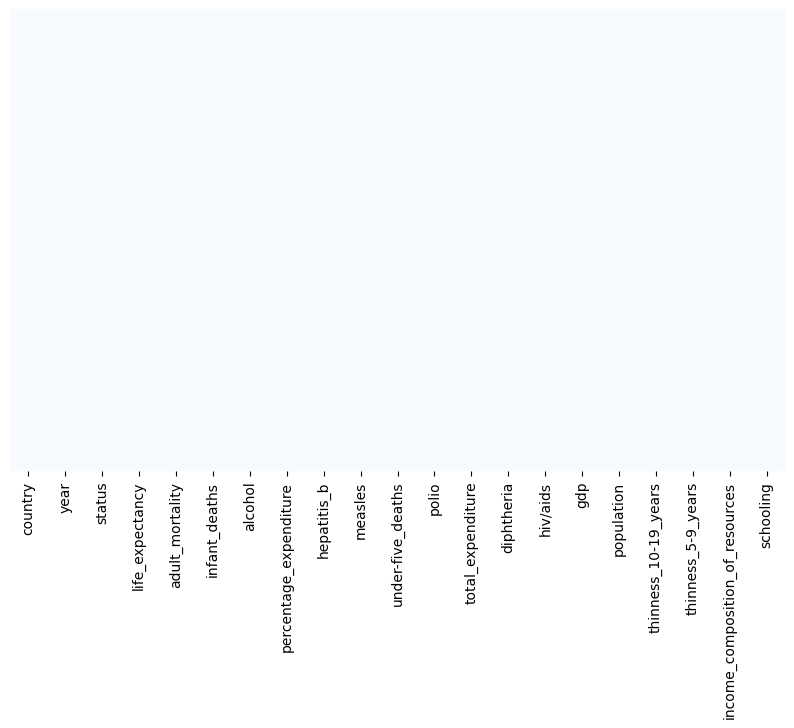

In [22]:
# Para revisar datos faltantes podemos dibujar un mapa de calor
# Nos permite encontrar la ubicación de dichos datos faltantes

plt.figure(figsize=(10,6))
sns.heatmap(df_non_nulls_mean.isnull(), yticklabels = False, cbar = False, cmap="Blues")
plt.show()

No hay datos faltantes en este caso

In [23]:
# Construimos una función que nos permite obtener el X y el y para el dataframe de Life expectancy

def obtain_X_y(df):
    return df.drop(columns=['life_expectancy']),df[['life_expectancy']]

# Segunda aproximación: utilizar knn para imputar los datos faltantes
# Utilizamos KNNImputer para completar los datos faltantes
# Para optimizar debemos encontrar el mejor k

from sklearn.impute import KNNImputer 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error 

def optimize_k(df):
    result = df.copy()
    errors = []
    result = result.drop(columns='bmi')
    numeric_vars = result.select_dtypes('number').columns
    for k in range(1, 20, 2):
        imputer = KNNImputer(n_neighbors=k)
        imputed = imputer.fit_transform(result[numeric_vars])
        df_imputed = pd.DataFrame(imputed, columns=numeric_vars)
        
        X,y = obtain_X_y(df_imputed)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

        model = RandomForestRegressor(random_state=1234)
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        error = np.sqrt(mean_squared_error(y_test, preds))
        errors.append({'K': k, 'RMSE': error, 'R^2': r2_score(y_test,preds)})
        
    return errors

errors = optimize_k(df_nulls)
print(errors)

[{'K': 1, 'RMSE': 2.0061382960333987, 'R^2': 0.9510592385141093}, {'K': 3, 'RMSE': 1.9938601502336735, 'R^2': 0.9517341589355882}, {'K': 5, 'RMSE': 1.9624950612413836, 'R^2': 0.9532138963436405}, {'K': 7, 'RMSE': 1.9184041270778196, 'R^2': 0.9552808106724361}, {'K': 9, 'RMSE': 1.9353888653820124, 'R^2': 0.9544999046300415}, {'K': 11, 'RMSE': 1.9006396579514053, 'R^2': 0.9561107288516756}, {'K': 13, 'RMSE': 1.9254766101130718, 'R^2': 0.9549460815579861}, {'K': 15, 'RMSE': 1.898966822166886, 'R^2': 0.9561761945007139}, {'K': 17, 'RMSE': 1.9045961277340662, 'R^2': 0.9559025206977376}, {'K': 19, 'RMSE': 1.8957697277684427, 'R^2': 0.9563155730613838}]


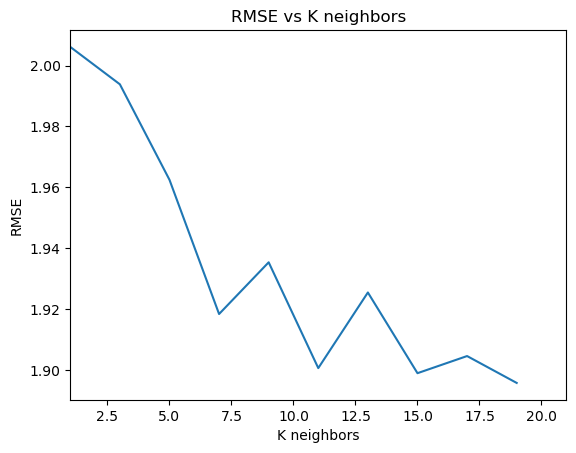

In [24]:
# Gráfica para encontrar el mejor k teniendo en cuenta el RMSE
 
ax = sns.lineplot(x=[errors[i]['K'] for i in range(len(errors))],y=[errors[i]['RMSE'] for i in range(len(errors))])
ax.set(title='RMSE vs K neighbors',xlim=(1,21),xlabel='K neighbors', ylabel='RMSE')
plt.show()

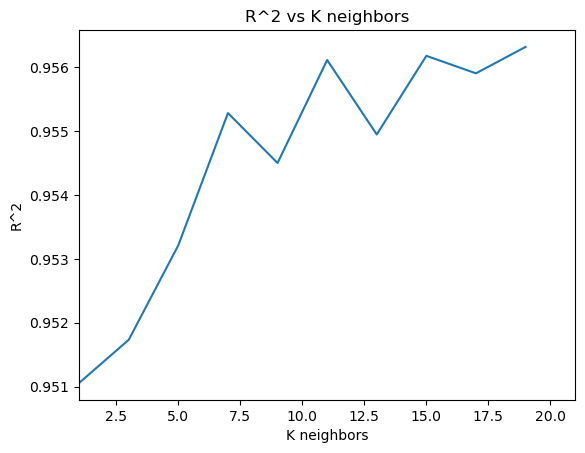

In [25]:
# Gráfica para encontrar el mejor k teniendo en cuenta el R^2

ax = sns.lineplot(x=[errors[i]['K'] for i in range(len(errors))],y=[errors[i]['R^2'] for i in range(len(errors))])
ax.set(title='R^2 vs K neighbors',xlim=(1,21),xlabel='K neighbors', ylabel='R^2')
plt.show()

Ordenamos los resultados con base al mejor R^2 y el mejor RMSE

In [26]:
# Verificamos el mejor K teniendo en cuenta el R^2 y el RMSE
res1 = sorted(errors,key=lambda x: x['R^2'],reverse=False)[0]
res2 = sorted(errors,key=lambda x: x['R^2'],reverse=True)[0]
print('K =',res1['K'],' R^2 = ',res1['R^2'],' RMSE = ',res1['RMSE'])
print('K =',res2['K'],' RMSE = ',res2['RMSE'],' R^2 = ',res2['R^2'])

K = 1  R^2 =  0.9510592385141093  RMSE =  2.0061382960333987
K = 19  RMSE =  1.8957697277684427  R^2 =  0.9563155730613838


Observamos los mejores valores son k = 1 y k = 19

In [27]:
# Luego de reconocer a k=19 como el mejor número de vecinos más cercanos, 
# podemos imputar nuestros datos faltantes

# Creamos un Transformer personalizado para imputar con KNN
class KnnImputer(BaseEstimator, TransformerMixin):
    def __init__(self, k):
        self.k = k
        
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        result = X.copy()
        result = result.drop(columns='bmi')
        numeric_vars = result.select_dtypes('number').columns
        imputed = KNNImputer(n_neighbors=self.k).fit_transform(result[numeric_vars])
        df_imputed = pd.DataFrame(imputed, columns=numeric_vars)
        for col in X.select_dtypes('object'):
            df_imputed[col] = X[col]
        return df_imputed


In [28]:
df_imputed_knn = KnnImputer(19).fit_transform(df_nulls)
df_imputed_knn

year  life_expectancy  adult_mortality  infant_deaths  alcohol  \
0     2015.0             65.0            263.0           62.0     0.01   
1     2014.0             59.9            271.0           64.0     0.01   
2     2013.0             59.9            268.0           66.0     0.01   
3     2012.0             59.5            272.0           69.0     0.01   
4     2011.0             59.2            275.0           71.0     0.01   
...      ...              ...              ...            ...      ...   
2933  2004.0             44.3            723.0           27.0     4.36   
2934  2003.0             44.5            715.0           26.0     4.06   
2935  2002.0             44.8             73.0           25.0     4.43   
2936  2001.0             45.3            686.0           25.0     1.72   
2937  2000.0             46.0            665.0           24.0     1.68   

      percentage_expenditure  hepatitis_b  measles  under-five_deaths  polio  \
0                  71.279624         65.0   1154.0               83.0    6.0   
1                  73.523582         62.0    492.0               86.0   58.0   
2                  73.219243         64.0    430.0               89.0   62.0   
3                  78.184215         67.0   2787.0               93.0   67.0   
4                   7.097109         68.0   3013.0               97.0   68.0   
...                      ...          ...      ...                ...    ...   
2933                0.000000         68.0     31.0               42.0   67.0   
2934                0.000000          7.0    998.0               41.0    7.0   
2935                0.000000         73.0    304.0               40.0   73.0   
2936                0.000000         76.0    529.0               39.0   76.0   
2937                0.000000         79.0   1483.0               39.0   78.0   

      ...  diphtheria  hiv/aids         gdp  population  thinness_10-19_years  \
0     ...        65.0       0.1  584.259210  33736494.0                  17.2   
1     ...        62.0       0.1  612.696514    327582.0                  17.5   
2     ...        64.0       0.1  631.744976  31731688.0                  17.7   
3     ...        67.0       0.1  669.959000   3696958.0                  17.9   
4     ...        68.0       0.1   63.537231   2978599.0                  18.2   
...   ...         ...       ...         ...         ...                   ...   
2933  ...        65.0      33.6  454.366654  12777511.0                   9.4   
2934  ...        68.0      36.7  453.351155  12633897.0                   9.8   
2935  ...        71.0      39.8   57.348340    125525.0                   1.2   
2936  ...        75.0      42.1  548.587312  12366165.0                   1.6   
2937  ...        78.0      43.5  547.358878  12222251.0                  11.0   

      thinness_5-9_years  income_composition_of_resources  schooling  \
0                   17.3                            0.479       10.1   
1                   17.5                            0.476       10.0   
2                   17.7                            0.470        9.9   
3                   18.0                            0.463        9.8   
4                   18.2                            0.454        9.5   
...                  ...                              ...        ...   
2933                 9.4                            0.407        9.2   
2934                 9.9                            0.418        9.5   
2935                 1.3                            0.427       10.0   
2936                 1.7                            0.427        9.8   
2937                11.2                            0.434        9.8   

          country      status  
0     Afghanistan  Developing  
1     Afghanistan  Developing  
2     Afghanistan  Developing  
3     Afghanistan  Developing  
4     Afghanistan  Developing  
...           ...         ...  
2933     Zimbabwe  Developing  
2934     Zimbabwe  Developing  
2935     Zimbabwe  Developing  


### Valores atípicos
Visualizamos utilizando
- Diagramas de cajas y bigotes
- Histogramas

In [29]:
# Función para graficar los valores continuos del dataframe
def outliers_visual(data):
    cont_vars = list(data.select_dtypes('number').columns)
    plt.figure(figsize=(15, 40))
    i = 0
    val = int(len(cont_vars)/2) + 1
    for col in cont_vars:
        i += 1
        plt.subplot(val, 4, i)
        plt.boxplot(data[col])
        plt.title('{} boxplot'.format(col))
        i += 1
        plt.subplot(val, 4, i)
        plt.hist(data[col])
        plt.title('{} histogram'.format(col))
        
    plt.show()

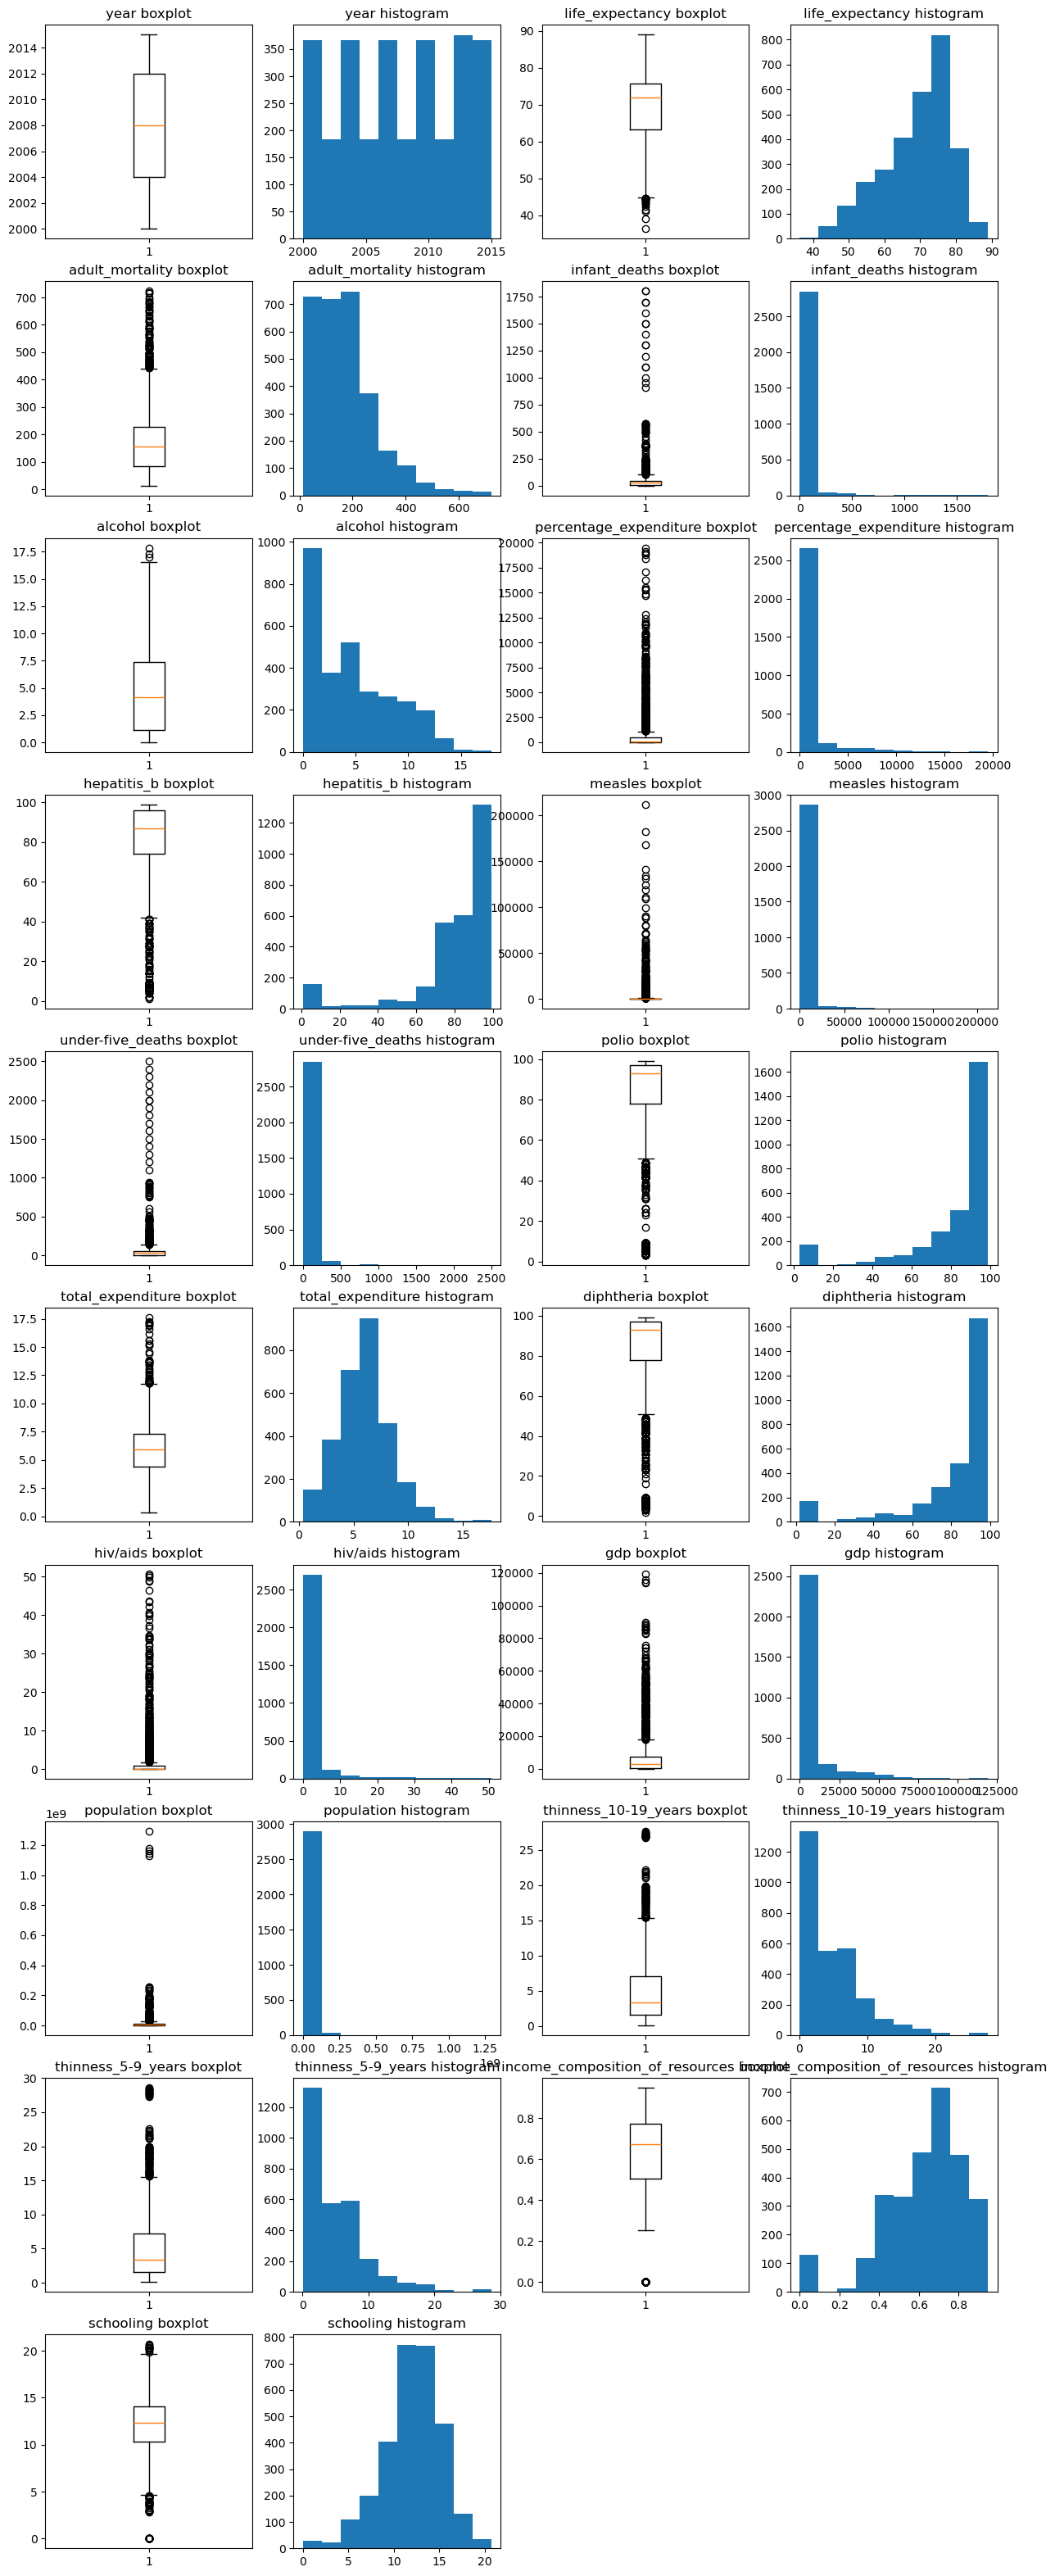

In [30]:
outliers_visual(df_non_nulls_mean)

Utilizando los gráficos anteriores podemos observar las distribuciones para cada variable continua.

Visualmente resulta claro que existen múltiples outliers, incluyendo la variable objetivo (esperanza de vida)

Podemos corroborar lo anterior de manera estadística haciendo uso del método de Tukey (se consideran como datos atípicos aquellos que están 1.5 veces por fuera del rango intercuartil)

In [31]:
# Función para calcular los datos atípicos utilizando el método de Tukey
def outlier_count(col, data):
    print(15*'-' + col + 15*'-')
    q75, q25 = np.percentile(data[col], [75, 25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    print('Number of outliers: {}'.format(outlier_count))
    print('Percent of data that is outlier: {}%'.format(outlier_percent))
    return outlier_count

In [32]:
# Guardar las columnas de tipo continuas con datos atípicos
cont_vars = []
for col in list(df_non_nulls_mean.select_dtypes('number').columns):
    if outlier_count(col, df_non_nulls_mean) > 0:
        cont_vars.append(col)

---------------year---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------life_expectancy---------------
Number of outliers: 17
Percent of data that is outlier: 0.58%
---------------adult_mortality---------------
Number of outliers: 97
Percent of data that is outlier: 3.3%
---------------infant_deaths---------------
Number of outliers: 135
Percent of data that is outlier: 4.59%
---------------alcohol---------------
Number of outliers: 3
Percent of data that is outlier: 0.1%
---------------percentage_expenditure---------------
Number of outliers: 389
Percent of data that is outlier: 13.24%
---------------hepatitis_b---------------
Number of outliers: 222
Percent of data that is outlier: 7.56%
---------------measles---------------
Number of outliers: 542
Percent of data that is outlier: 18.45%
---------------under-five_deaths---------------
Number of outliers: 142
Percent of data that is outlier: 4.83%
---------------polio---------------
Number of outl

¿Qué hacer con tantos datos atípicos?
Existen varias opciones a considerar
- Eliminarlos (mejor evitar esta opción para mantener la mayor cantidad de información posible)
- Limitar los límites inferiores y superiores (winzorize)
- Transformación de los datos (normalización)


Teniendo en cuenta los gráficos previos y los estadísticos, se puede ver que existen cantidades diferentes de outliers para cada variable y hacia diferentes direcciones. Es por esto que en este caso la mejor decisión es limitar a través de winsorizing

In [33]:
from scipy.stats.mstats import winsorize

wins_dict = {}

def test_wins(col, df, wins_dict, lower_limit=0, upper_limit=0, show_plot=True):
    wins_data = winsorize(df[col], limits=(lower_limit, upper_limit))
    wins_dict[col] = wins_data
    if show_plot == True:
        plt.figure(figsize=(15,5))
        plt.subplot(121)
        plt.boxplot(df[col])
        plt.title('original {}'.format(col))
        plt.subplot(122)
        plt.boxplot(wins_data)
        plt.title('wins=({},{}) {}'.format(lower_limit, upper_limit, col))
        plt.show()
    return wins_dict

In [34]:
cont_vars

['life_expectancy',
 'adult_mortality',
 'infant_deaths',
 'alcohol',
 'percentage_expenditure',
 'hepatitis_b',
 'measles',
 'under-five_deaths',
 'polio',
 'total_expenditure',
 'diphtheria',
 'hiv/aids',
 'gdp',
 'population',
 'thinness_10-19_years',
 'thinness_5-9_years',
 'income_composition_of_resources',
 'schooling']

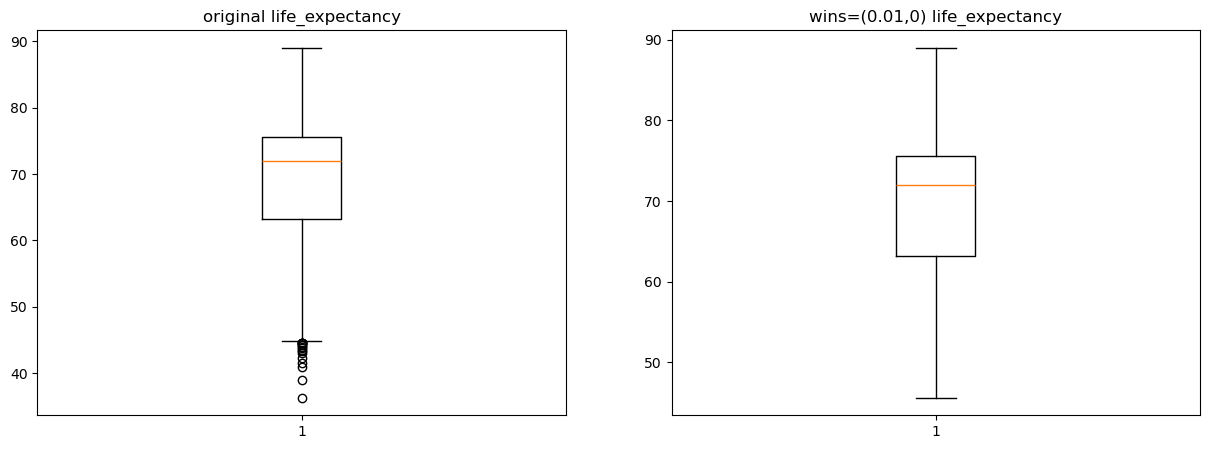

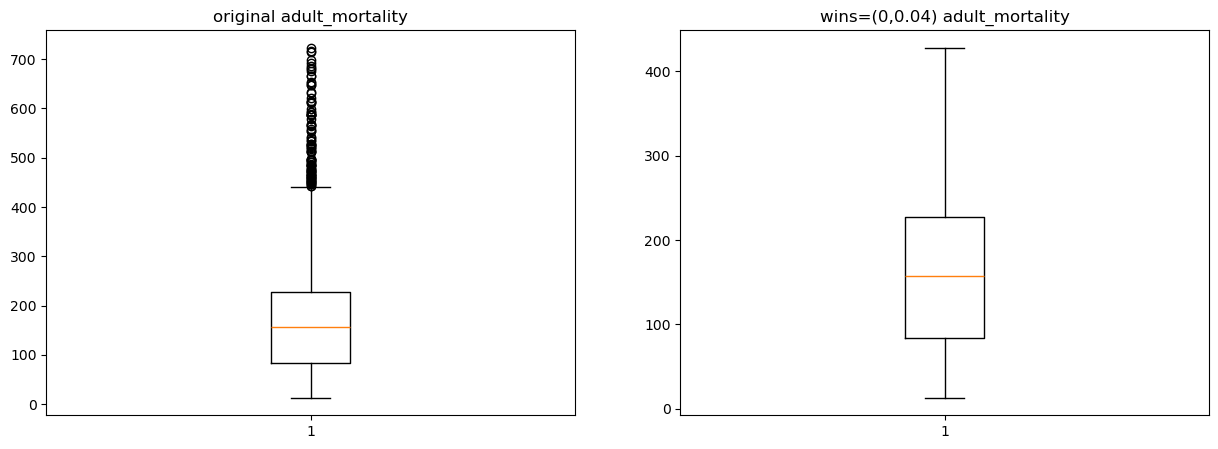

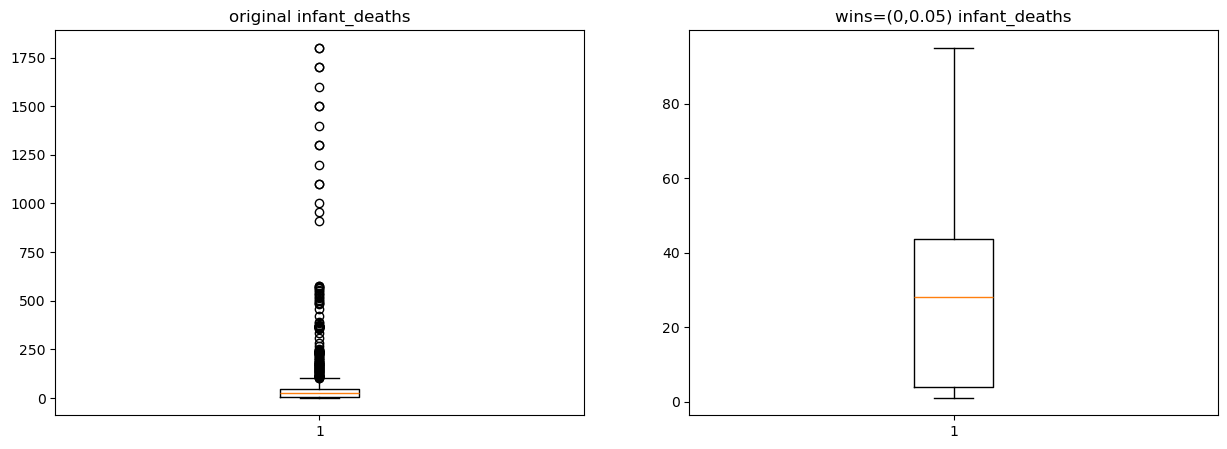

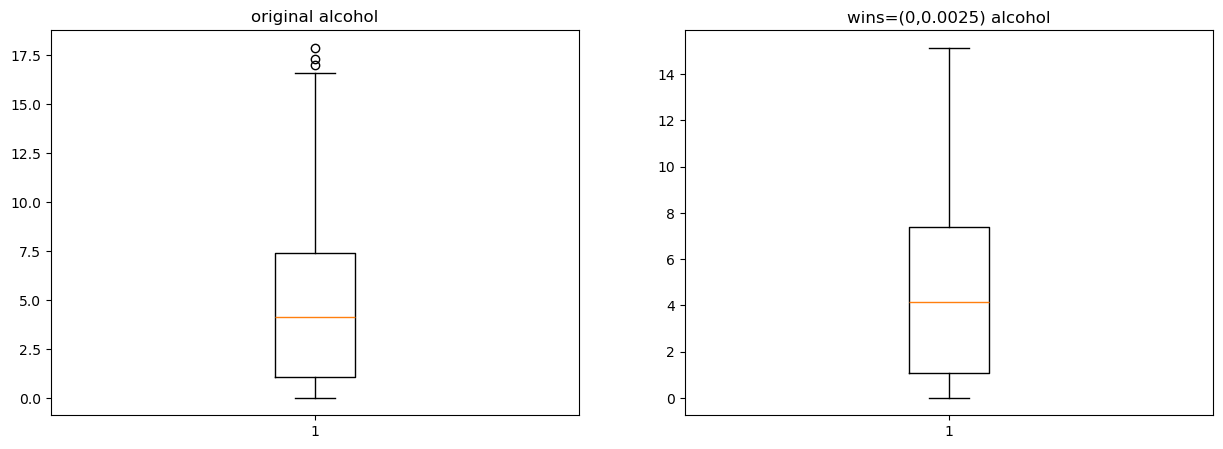

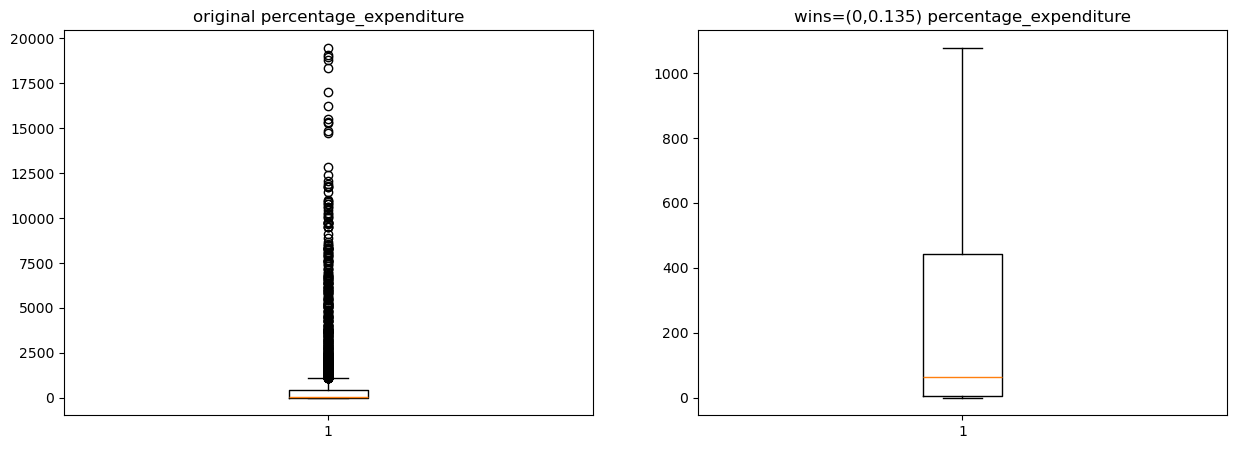

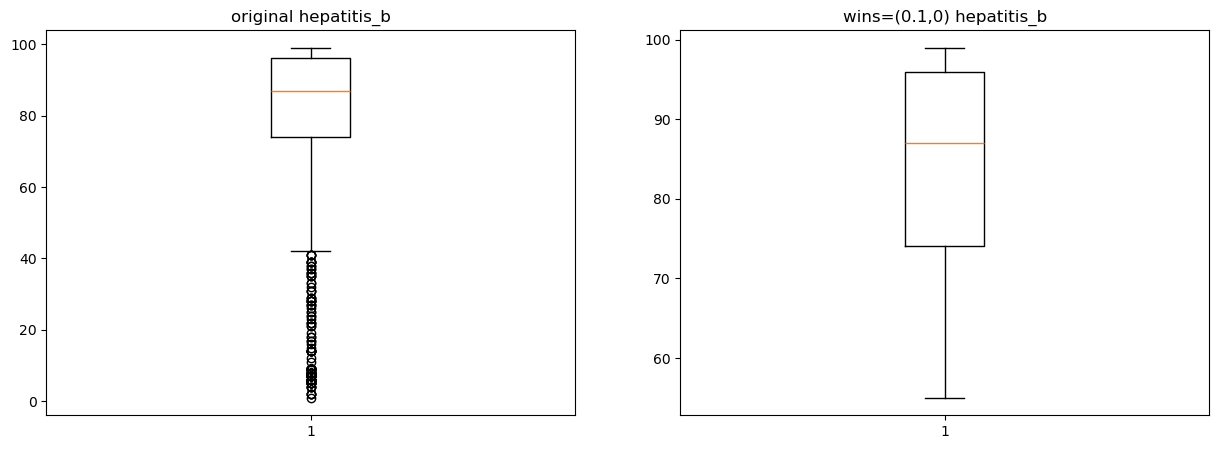

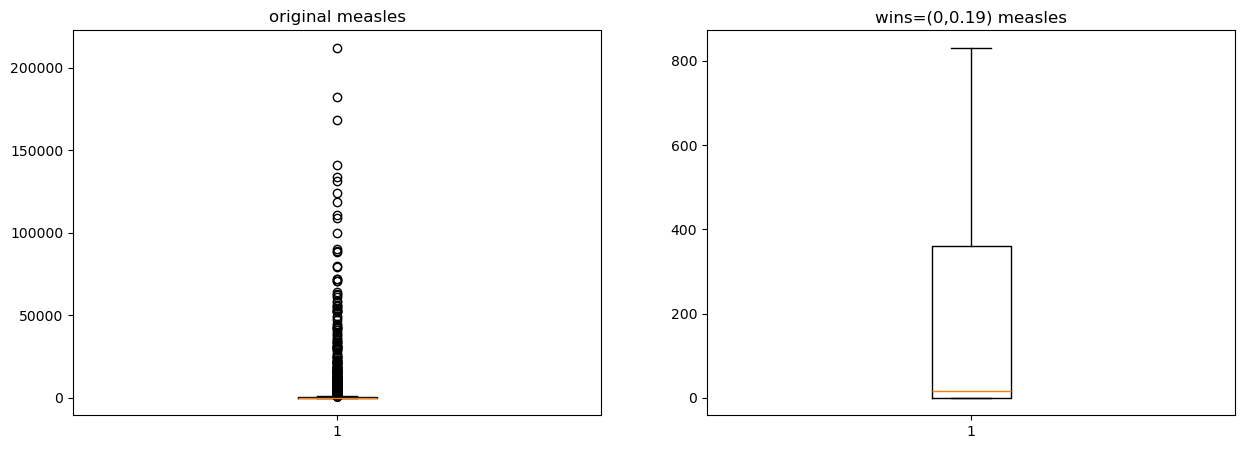

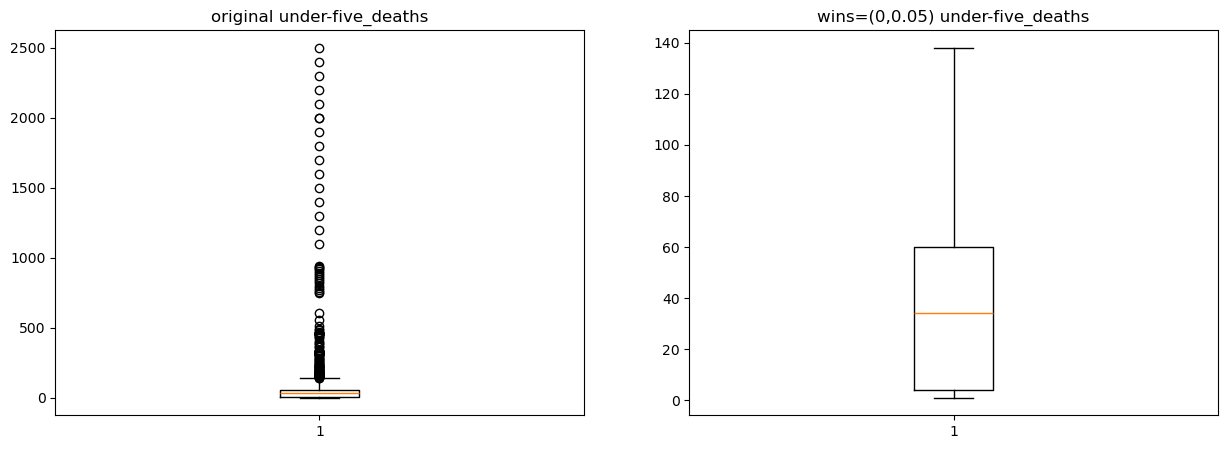

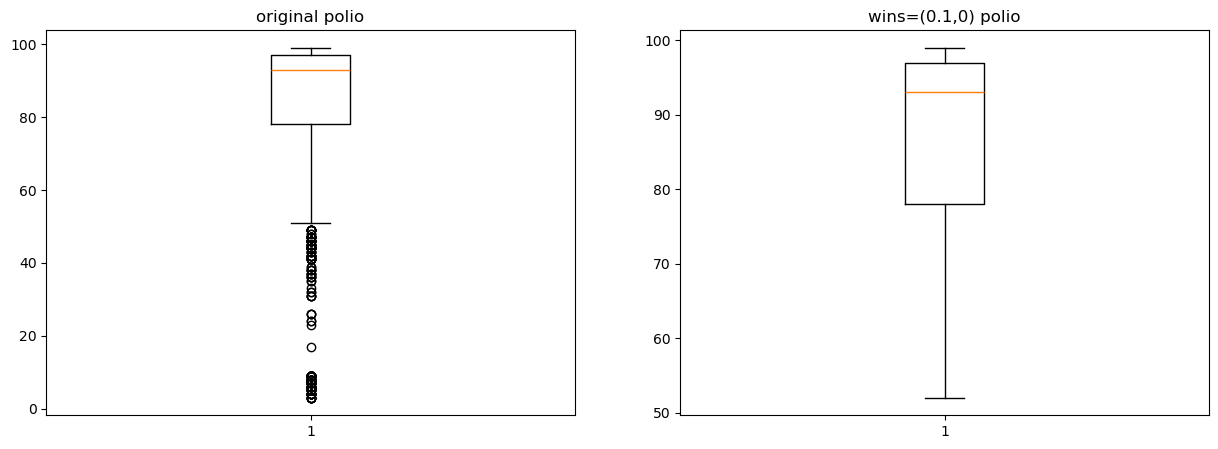

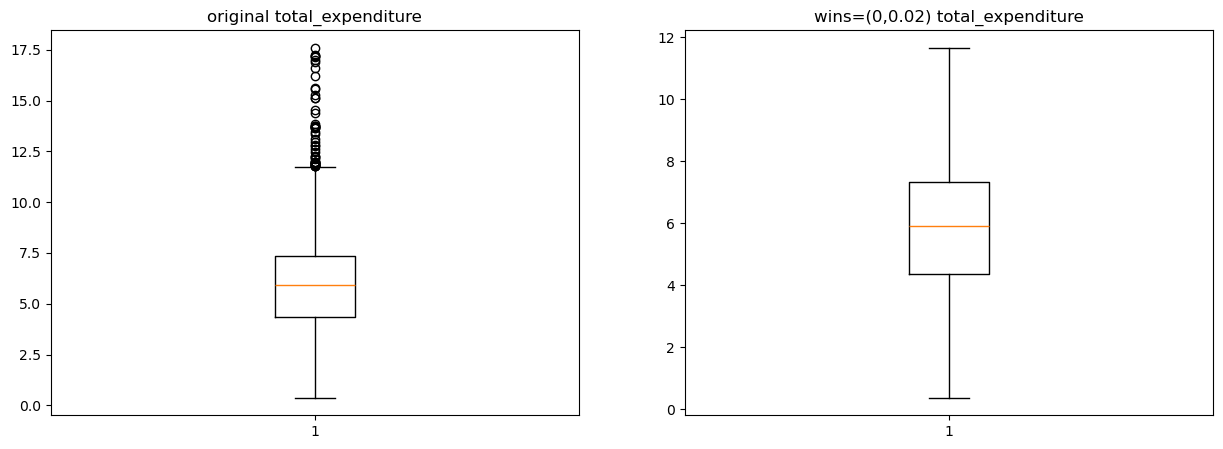

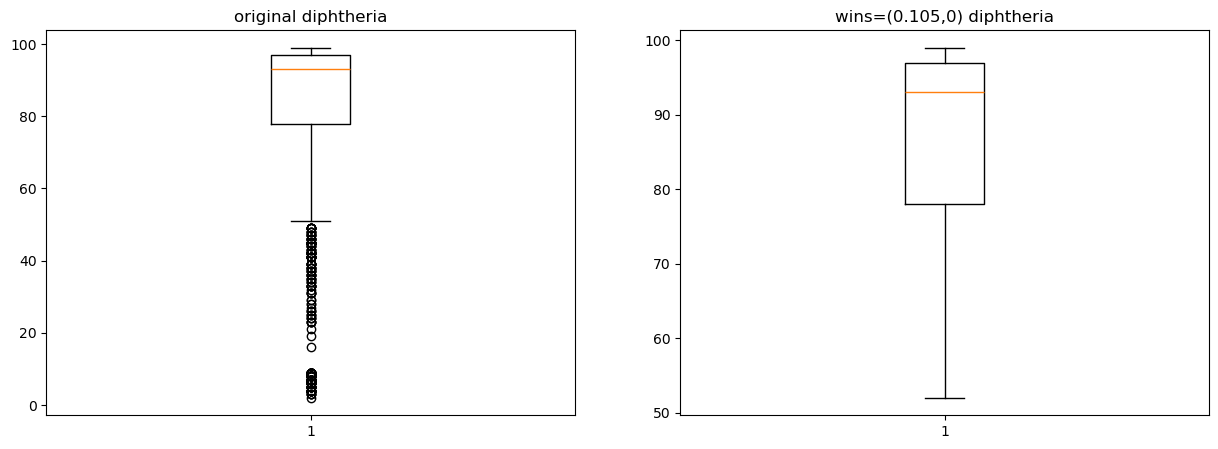

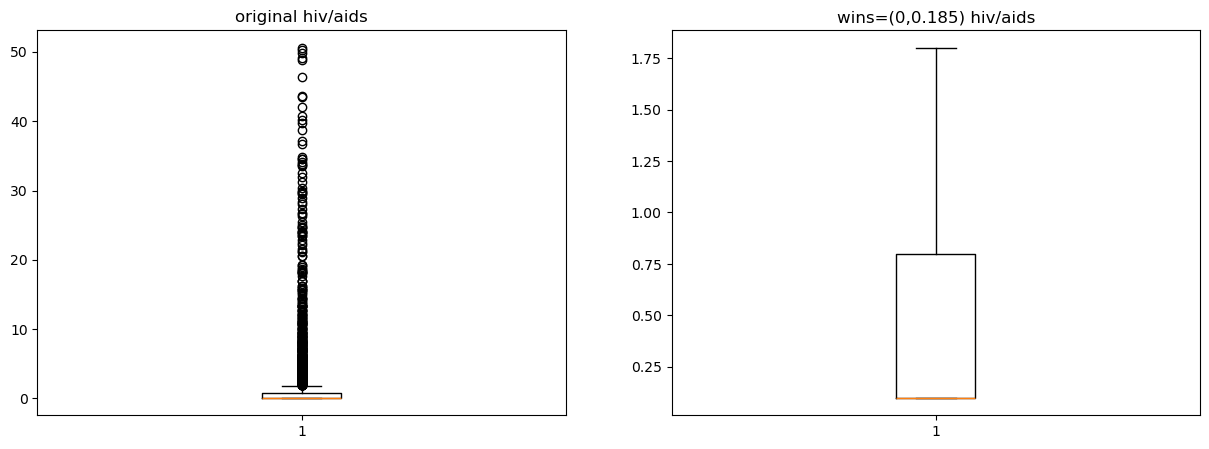

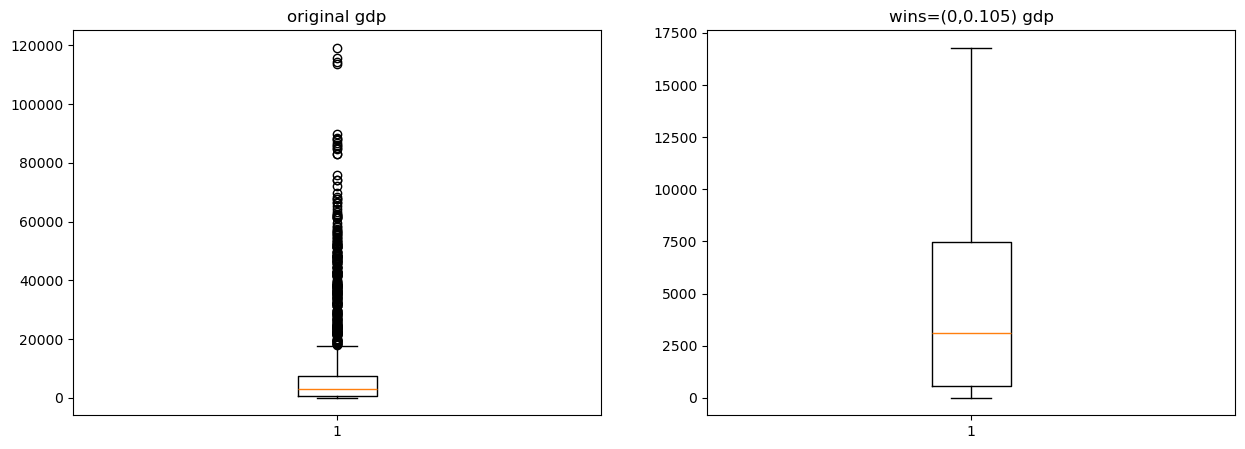

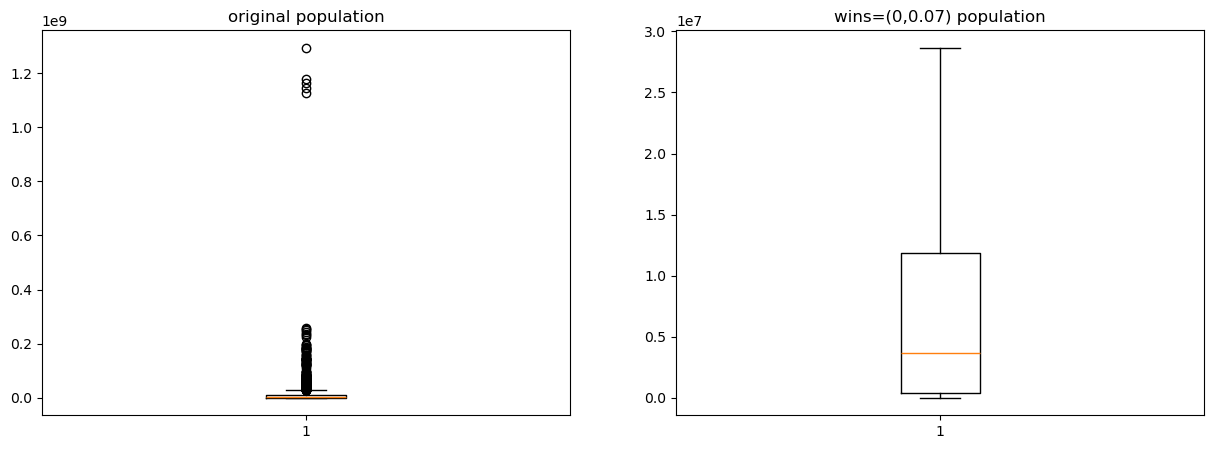

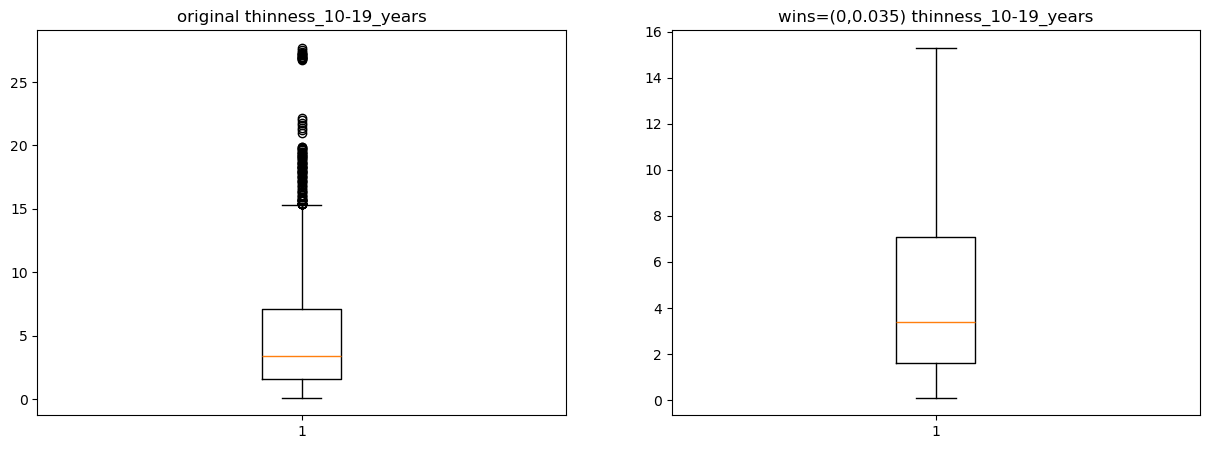

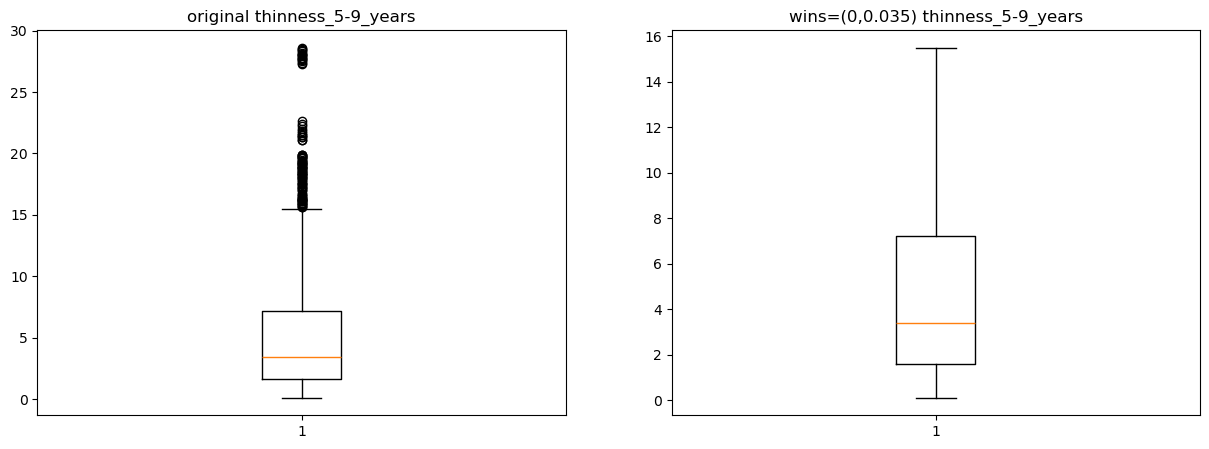

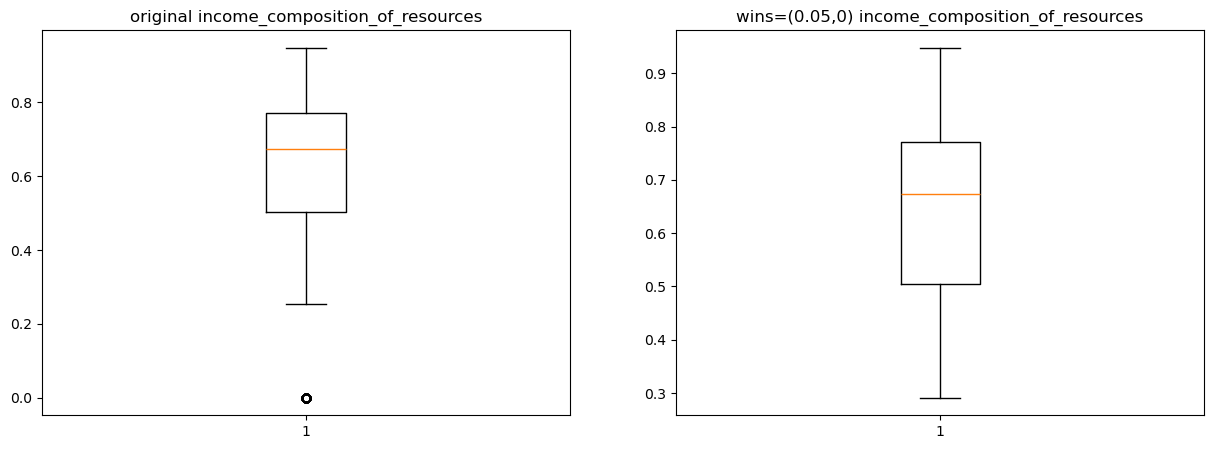

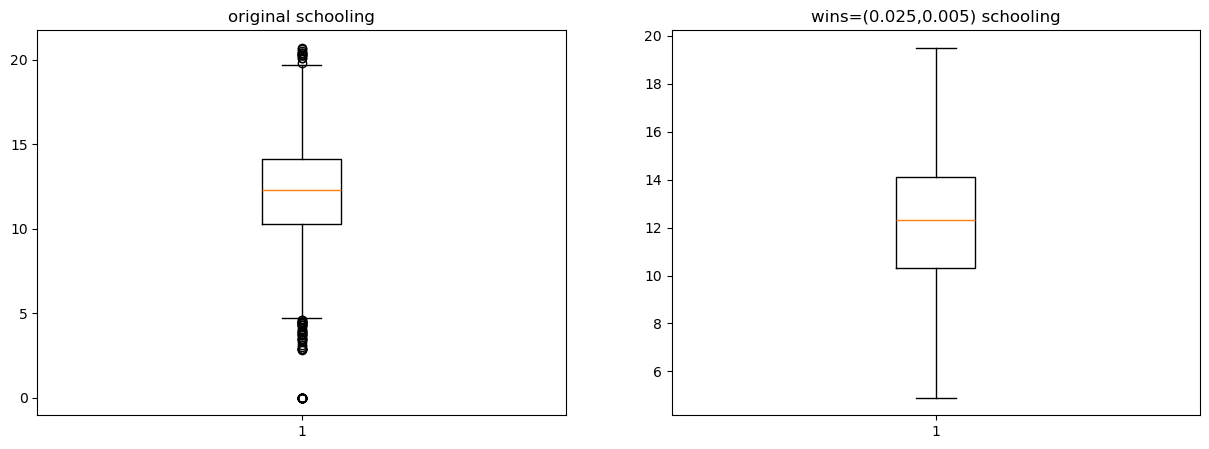

In [35]:
# Verificación de la winsorizing
wins_dict = {}
wins_dict = test_wins(cont_vars[0], df_non_nulls_mean, wins_dict, lower_limit=.01, show_plot=True)
wins_dict = test_wins(cont_vars[1], df_non_nulls_mean, wins_dict, upper_limit=.04, show_plot=True)
wins_dict = test_wins(cont_vars[2], df_non_nulls_mean, wins_dict, upper_limit=.05, show_plot=True)
wins_dict = test_wins(cont_vars[3], df_non_nulls_mean, wins_dict, upper_limit=.0025, show_plot=True)
wins_dict = test_wins(cont_vars[4], df_non_nulls_mean, wins_dict, upper_limit=.135, show_plot=True)
wins_dict = test_wins(cont_vars[5], df_non_nulls_mean, wins_dict, lower_limit=.1, show_plot=True)
wins_dict = test_wins(cont_vars[6], df_non_nulls_mean, wins_dict, upper_limit=.19, show_plot=True)
wins_dict = test_wins(cont_vars[7], df_non_nulls_mean, wins_dict, upper_limit=.05, show_plot=True)
wins_dict = test_wins(cont_vars[8], df_non_nulls_mean, wins_dict, lower_limit=.1, show_plot=True)
wins_dict = test_wins(cont_vars[9], df_non_nulls_mean, wins_dict, upper_limit=.02, show_plot=True)
wins_dict = test_wins(cont_vars[10], df_non_nulls_mean, wins_dict, lower_limit=.105, show_plot=True)
wins_dict = test_wins(cont_vars[11], df_non_nulls_mean, wins_dict, upper_limit=.185, show_plot=True)
wins_dict = test_wins(cont_vars[12], df_non_nulls_mean, wins_dict, upper_limit=.105, show_plot=True)
wins_dict = test_wins(cont_vars[13], df_non_nulls_mean, wins_dict, upper_limit=.07, show_plot=True)
wins_dict = test_wins(cont_vars[14], df_non_nulls_mean, wins_dict, upper_limit=.035, show_plot=True)
wins_dict = test_wins(cont_vars[15], df_non_nulls_mean, wins_dict, upper_limit=.035, show_plot=True)
wins_dict = test_wins(cont_vars[16], df_non_nulls_mean, wins_dict, lower_limit=.05, show_plot=True)
wins_dict = test_wins(cont_vars[17], df_non_nulls_mean, wins_dict, lower_limit=.025, upper_limit=.005, show_plot=True)



A través de los diagramas de cajas y bigotes se puede detallar como se logra mitigar el impacto de los outliers para cada una de las variables.

In [36]:
# Creamos un Transformer personalizado para limitar los outliers con el winsorizing
class Winsorizer(BaseEstimator, TransformerMixin):
    def __init__(self, wins, cont_vars):
        self.wins = wins
        self.cont_vars = cont_vars
        
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        wins_df =pd.DataFrame(index = X.index)
        for col in ['year','status','life_expectancy','country']:
            wins_df[col] = X[col]
        for col in self.cont_vars:
                wins_df[col] = self.wins[col]     
        return wins_df

In [37]:
df_wins_mean = Winsorizer(wins_dict,cont_vars).fit_transform(df_non_nulls_mean)
df_wins_mean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   year                             2938 non-null   int64  
 1   status                           2938 non-null   object 
 2   life_expectancy                  2938 non-null   float64
 3   country                          2938 non-null   object 
 4   adult_mortality                  2938 non-null   float64
 5   infant_deaths                    2938 non-null   float64
 6   alcohol                          2938 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   hepatitis_b                      2938 non-null   float64
 9   measles                          2938 non-null   int64  
 10  under-five_deaths                2938 non-null   float64
 11  polio                            2938 non-null   float64
 12  total_expenditure        

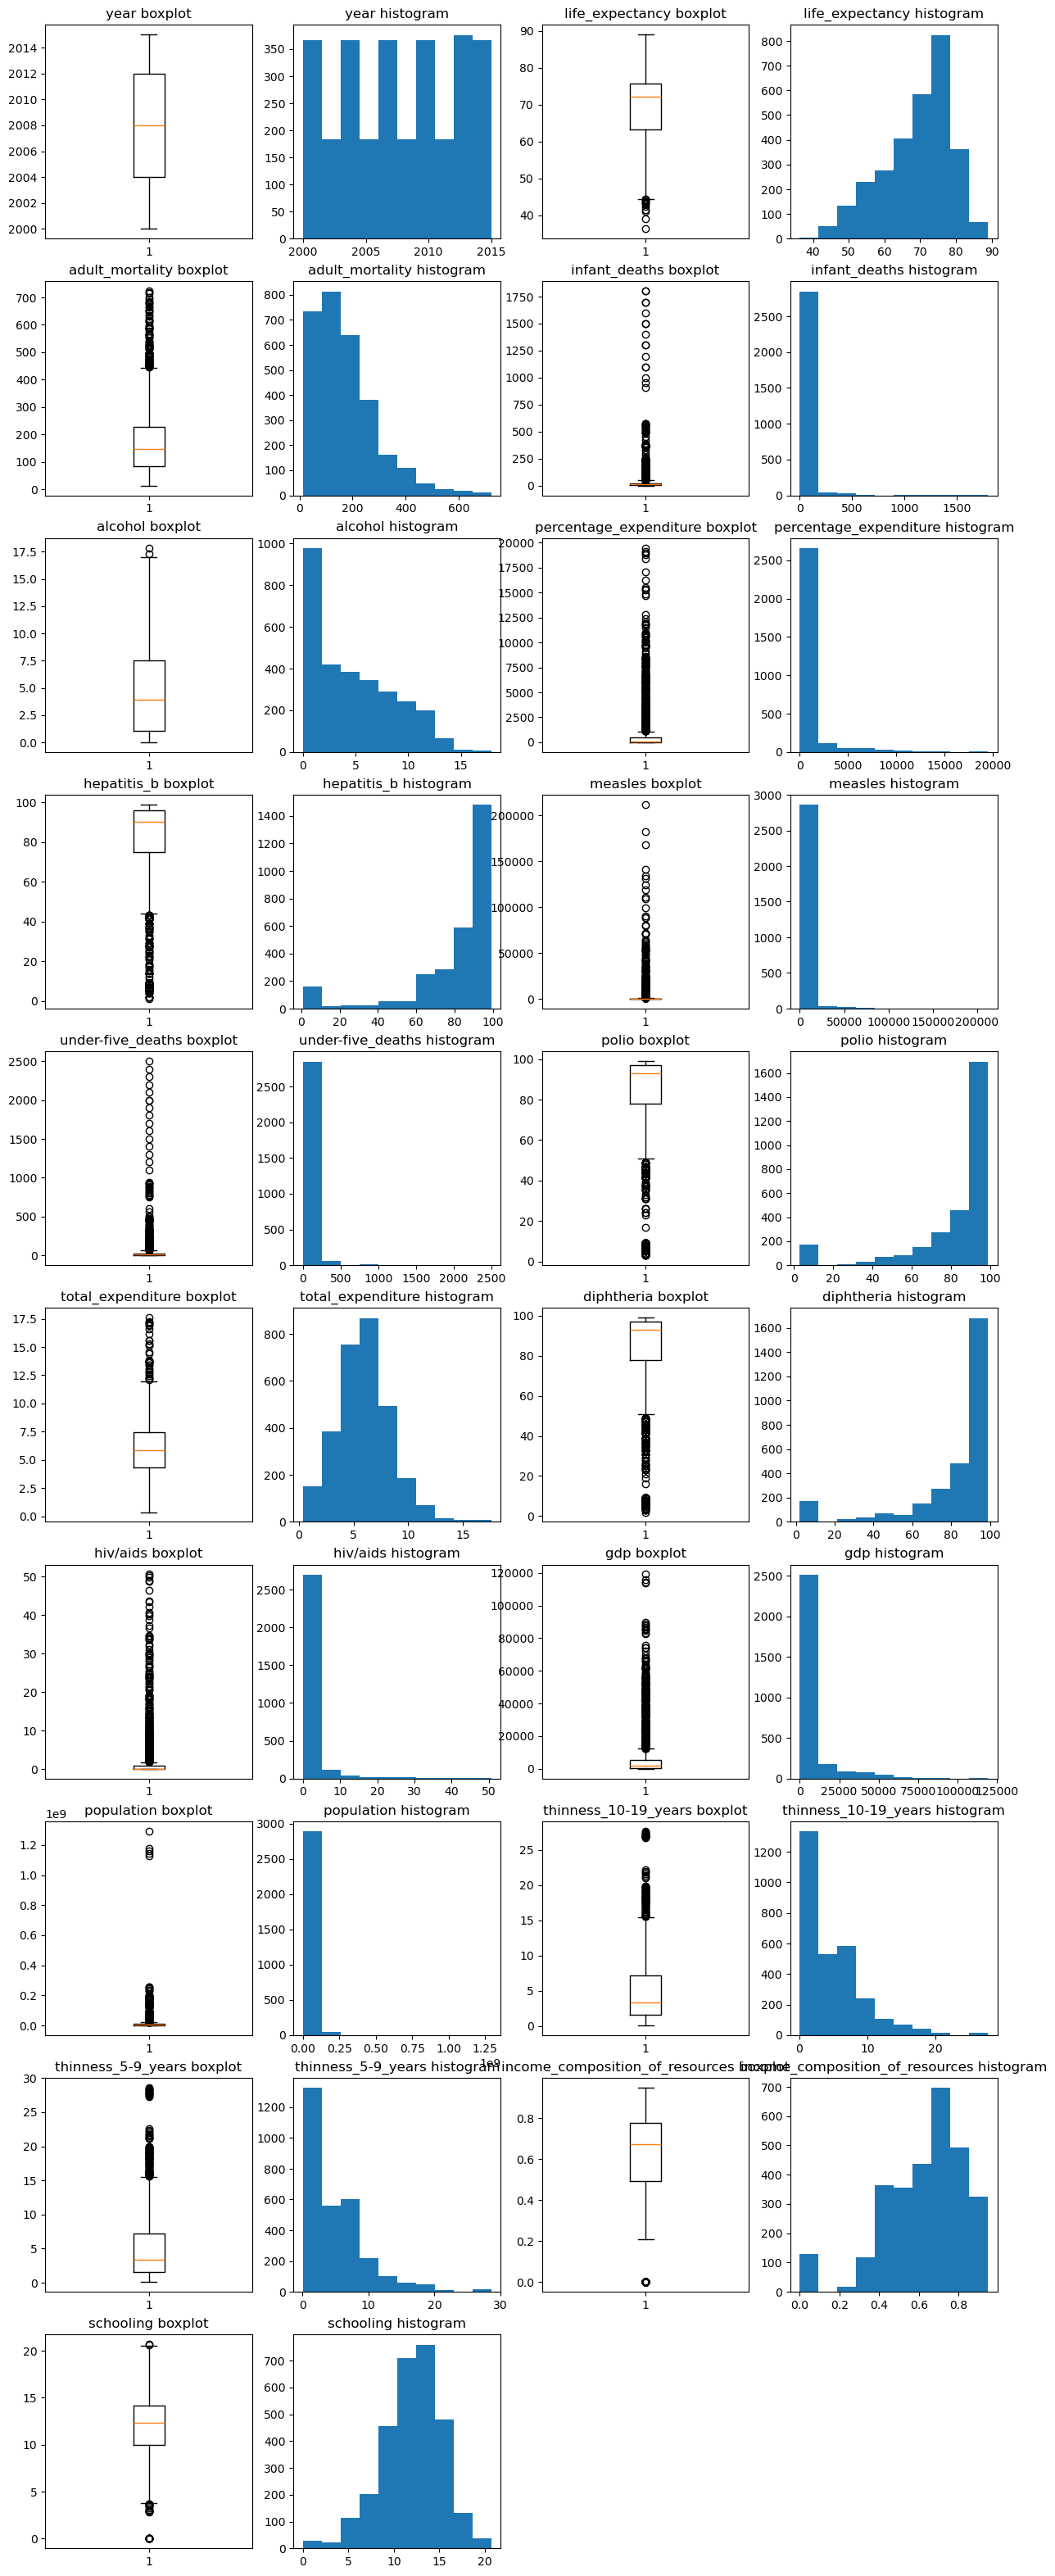

In [38]:
outliers_visual(df_imputed_knn)

In [39]:
# Guardar las columnas de tipo continuas con datos atípicos
cont_vars1 = []
for col in list(df_imputed_knn.select_dtypes('number').columns):
    if outlier_count(col, df_imputed_knn) > 0:
        cont_vars1.append(col)

---------------year---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------life_expectancy---------------
Number of outliers: 12
Percent of data that is outlier: 0.41%
---------------adult_mortality---------------
Number of outliers: 95
Percent of data that is outlier: 3.23%
---------------infant_deaths---------------
Number of outliers: 345
Percent of data that is outlier: 11.74%
---------------alcohol---------------
Number of outliers: 2
Percent of data that is outlier: 0.07%
---------------percentage_expenditure---------------
Number of outliers: 389
Percent of data that is outlier: 13.24%
---------------hepatitis_b---------------
Number of outliers: 238
Percent of data that is outlier: 8.1%
---------------measles---------------
Number of outliers: 542
Percent of data that is outlier: 18.45%
---------------under-five_deaths---------------
Number of outliers: 394
Percent of data that is outlier: 13.41%
---------------polio---------------
Number of o

In [40]:
cont_vars1

['life_expectancy',
 'adult_mortality',
 'infant_deaths',
 'alcohol',
 'percentage_expenditure',
 'hepatitis_b',
 'measles',
 'under-five_deaths',
 'polio',
 'total_expenditure',
 'diphtheria',
 'hiv/aids',
 'gdp',
 'population',
 'thinness_10-19_years',
 'thinness_5-9_years',
 'income_composition_of_resources',
 'schooling']

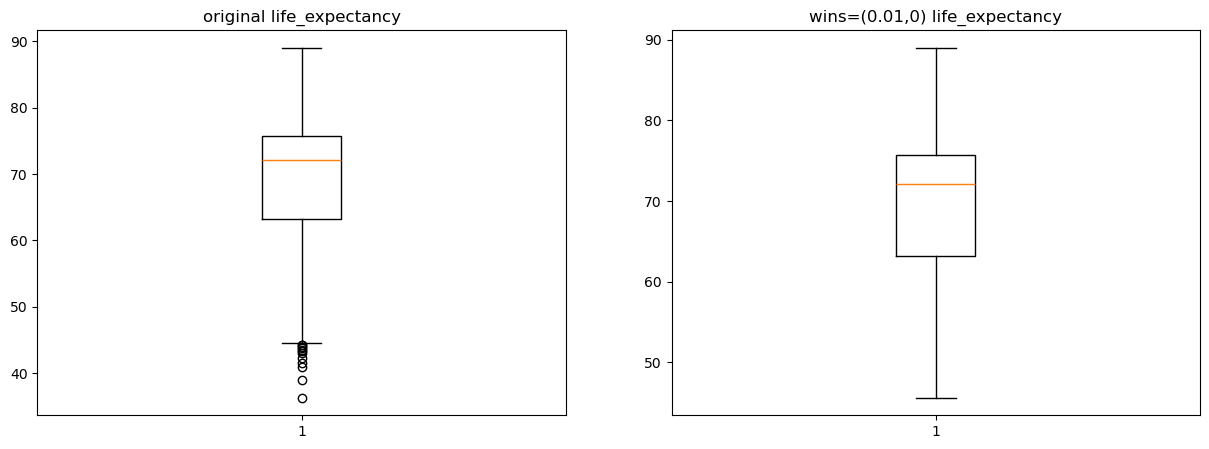

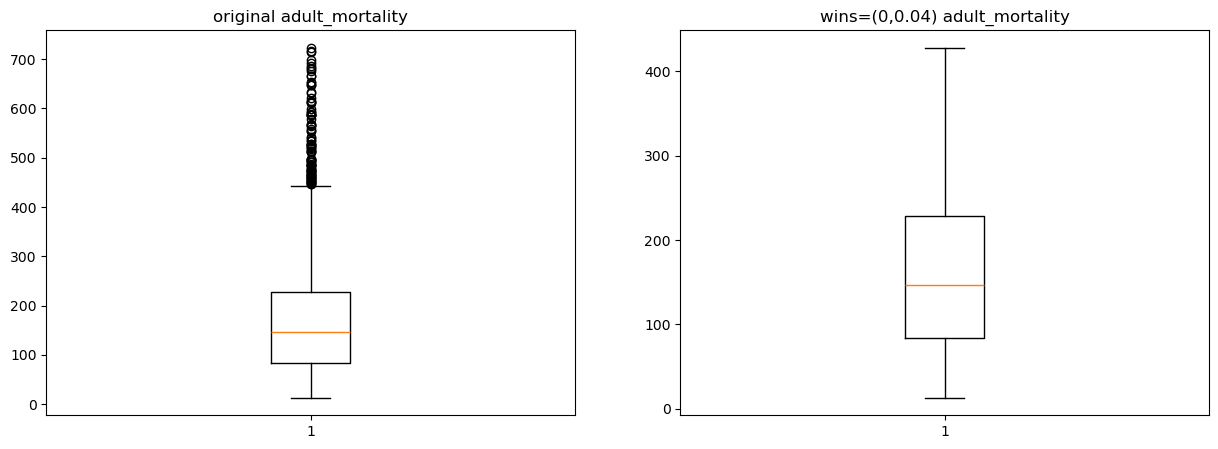

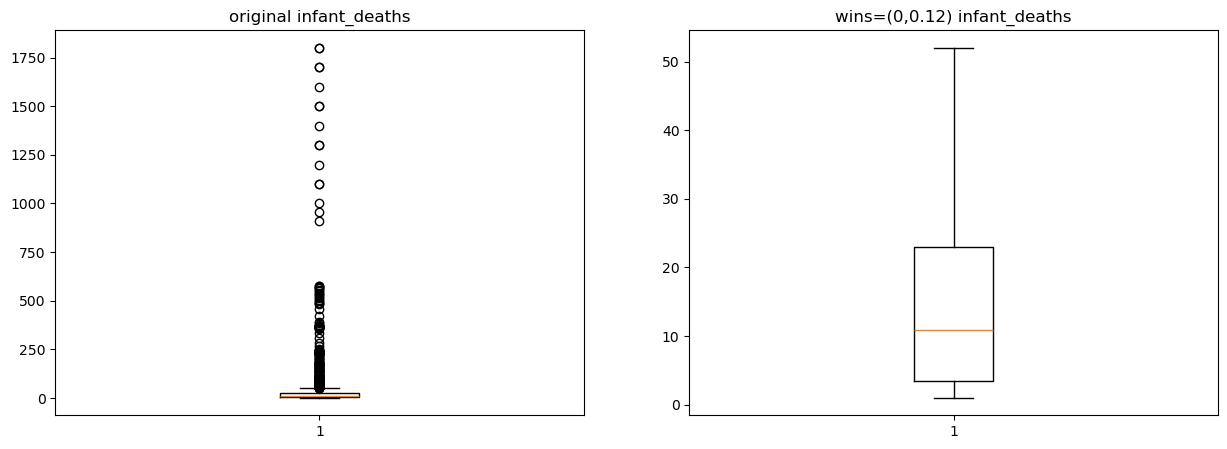

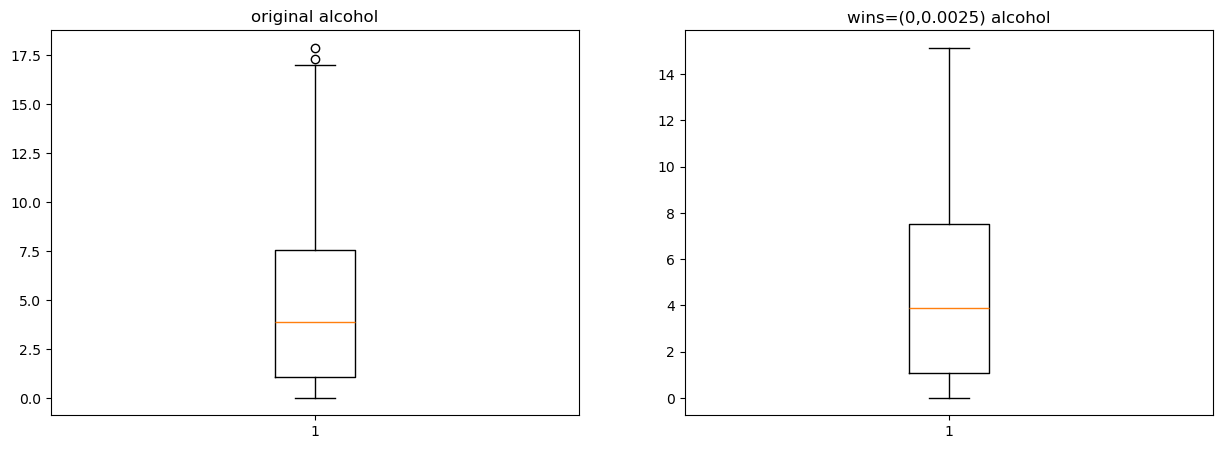

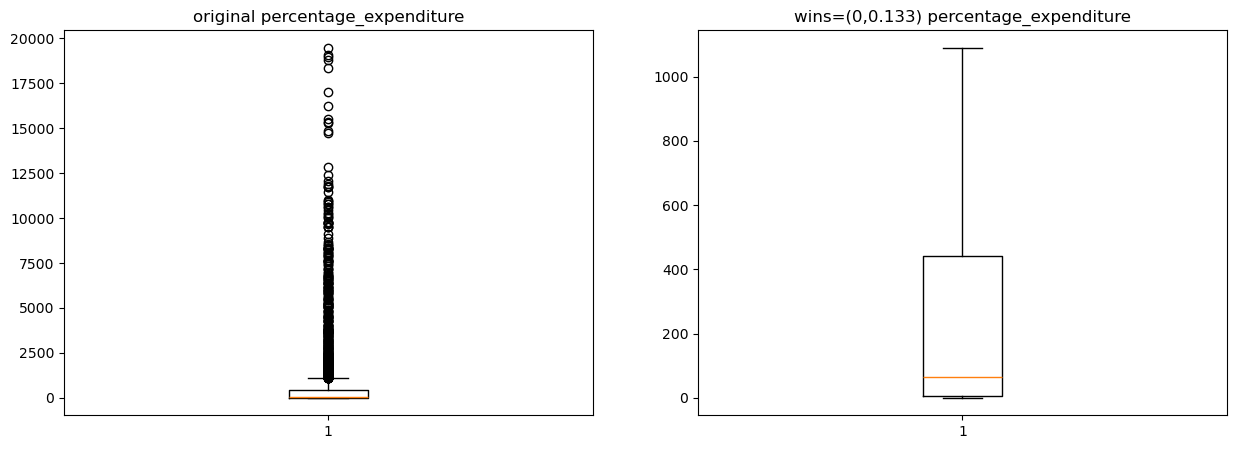

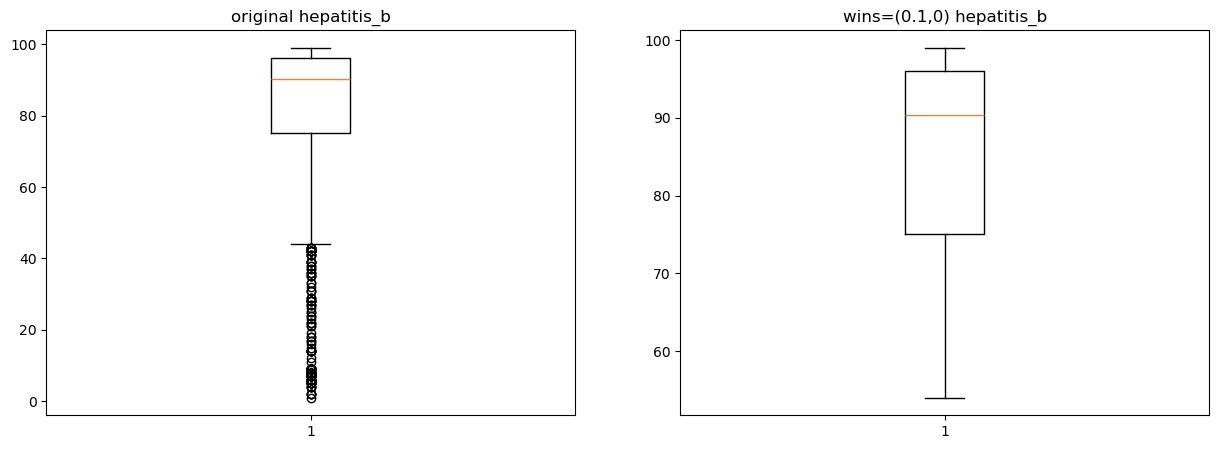

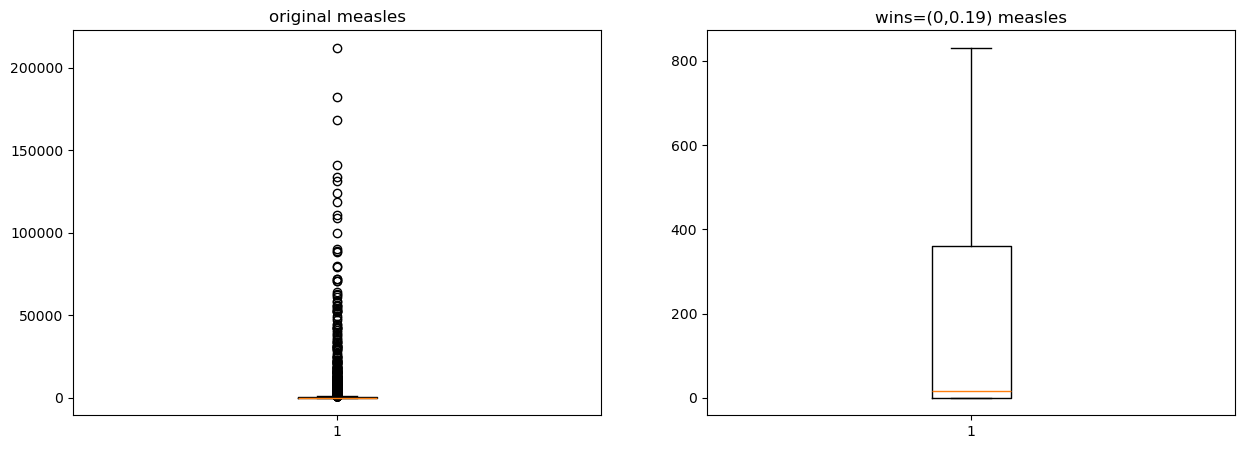

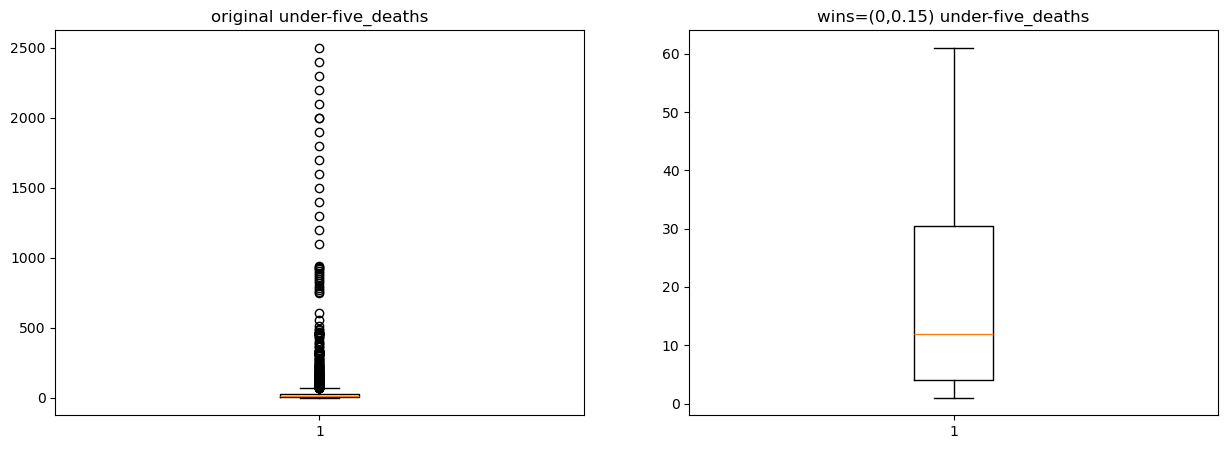

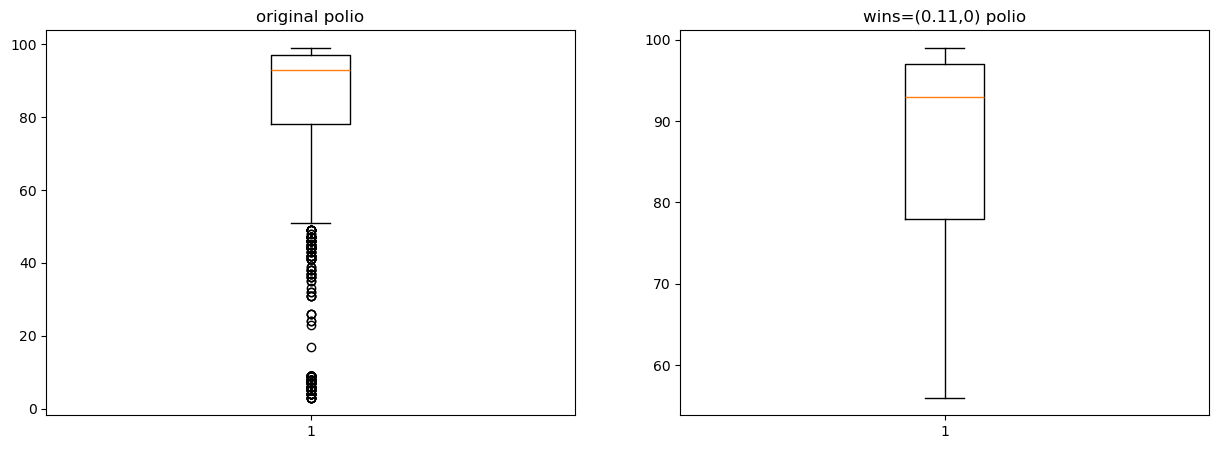

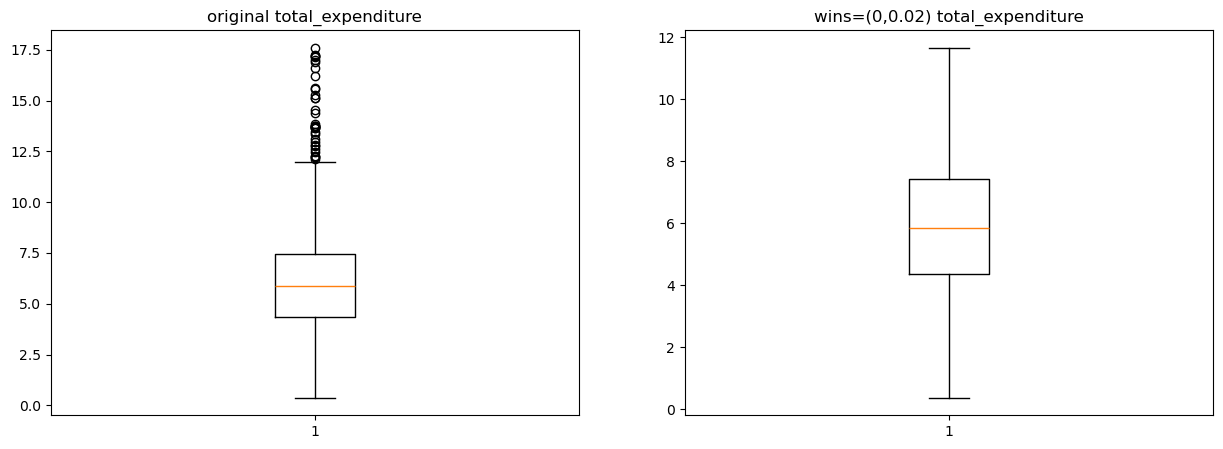

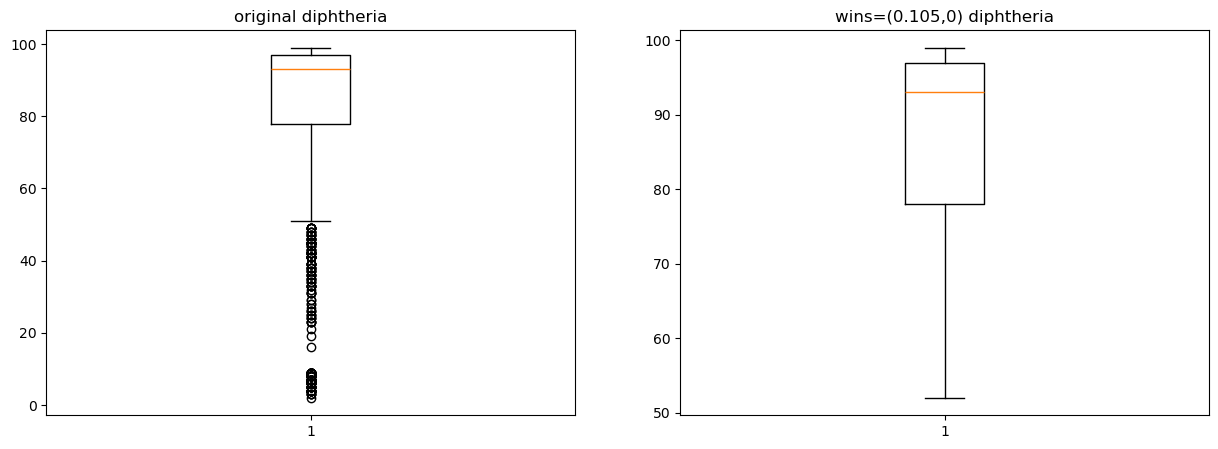

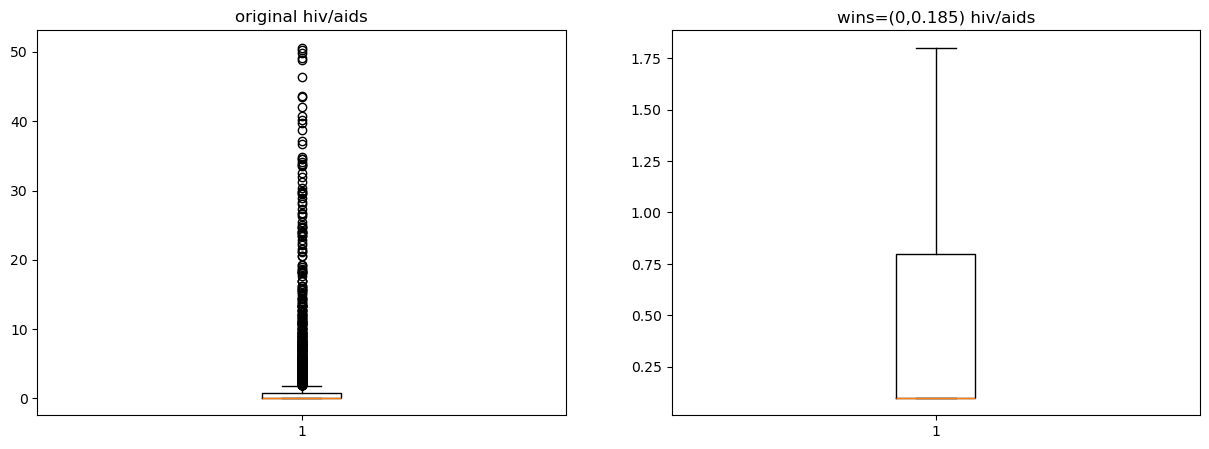

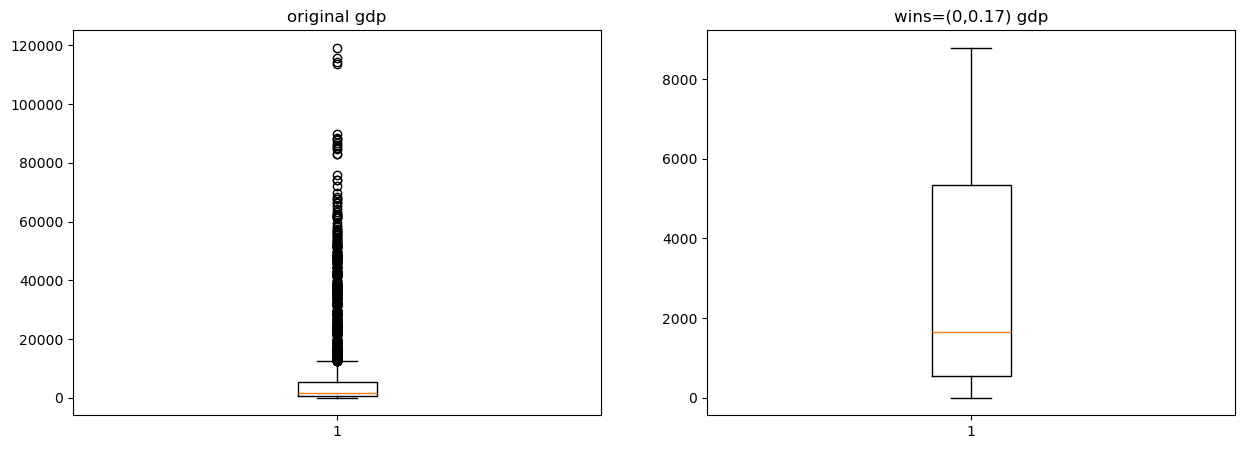

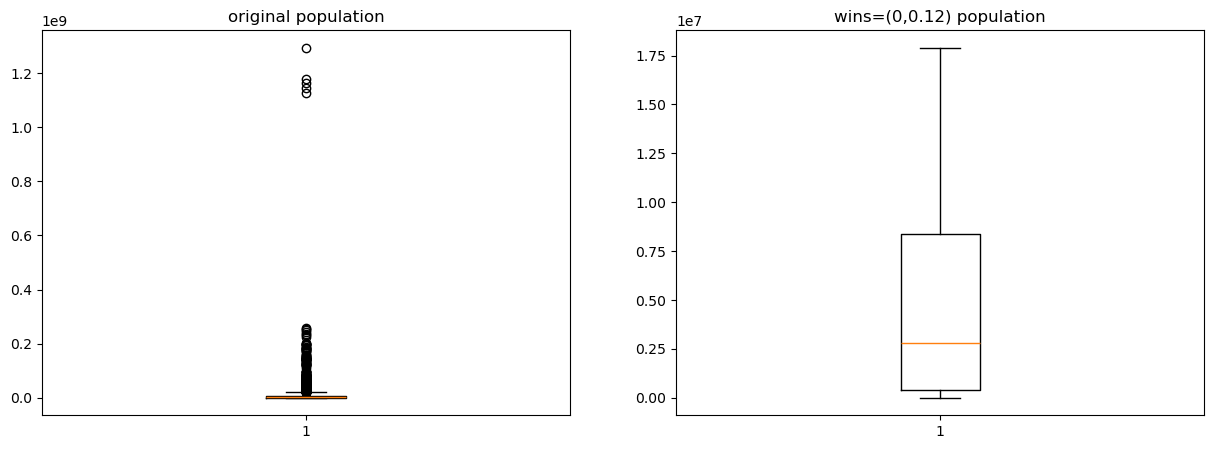

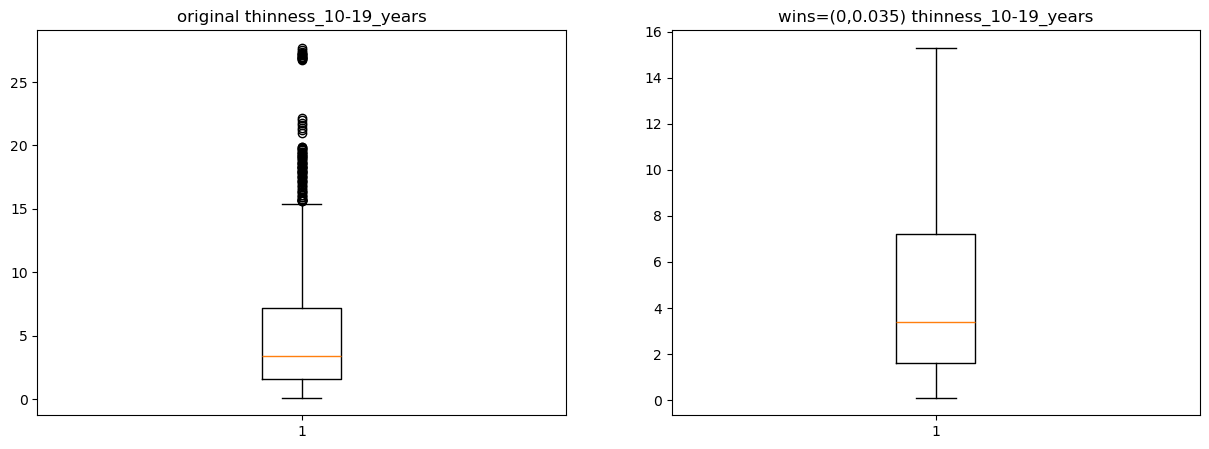

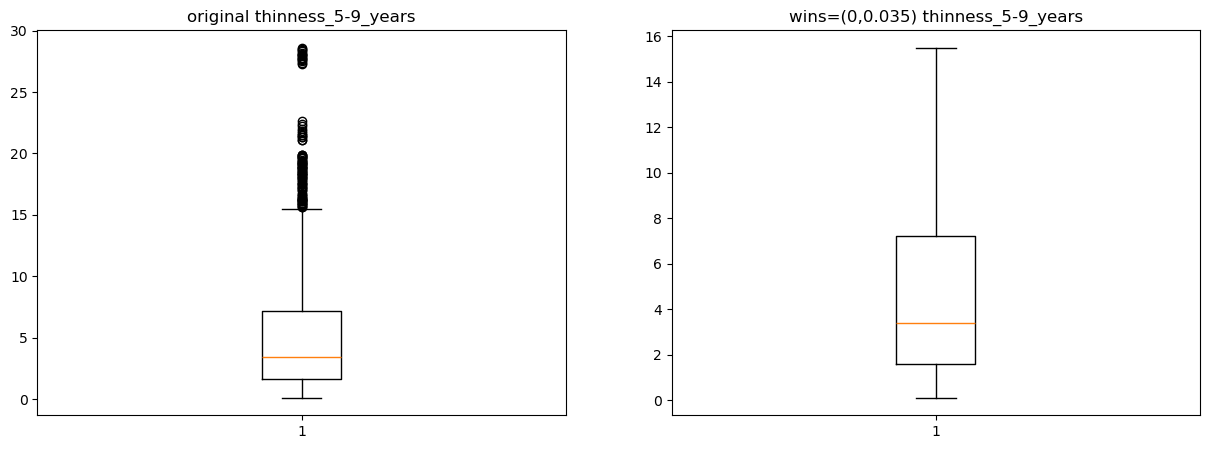

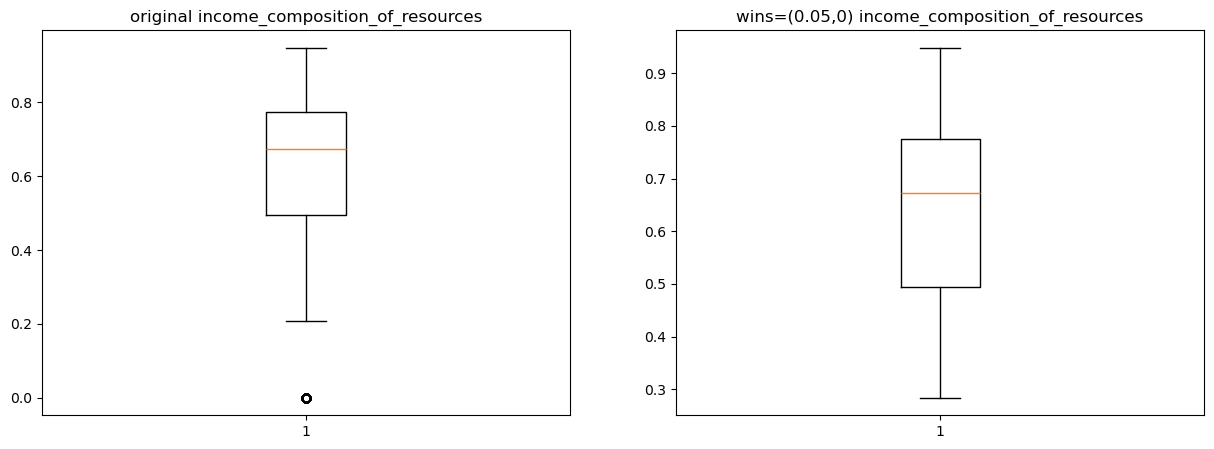

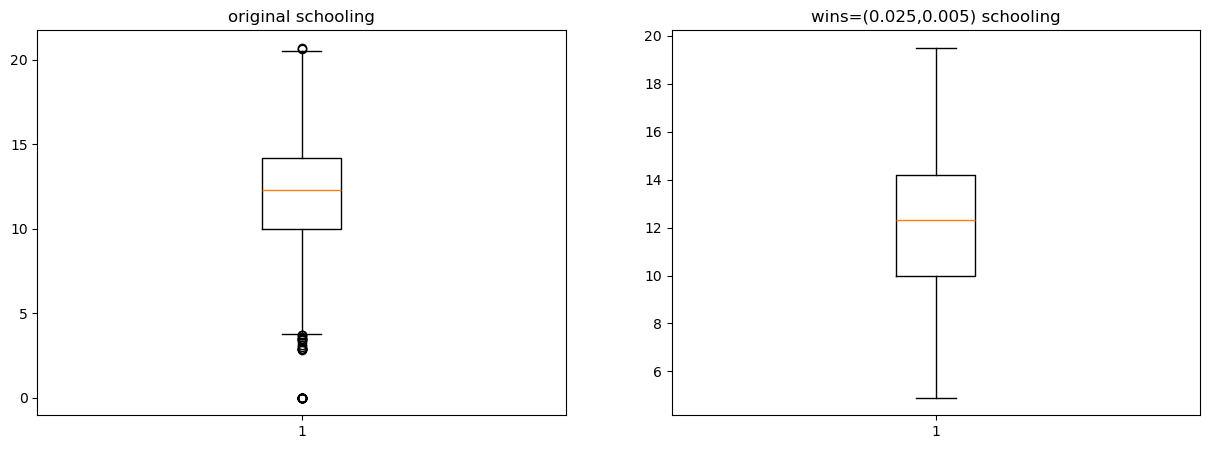

In [41]:
# Verificación de la winsorizing
wins_dict1 = {}
wins_dict1 = test_wins(cont_vars1[0], df_imputed_knn, wins_dict1, lower_limit=.01, show_plot=True)
wins_dict1 = test_wins(cont_vars1[1], df_imputed_knn, wins_dict1, upper_limit=.04, show_plot=True)
wins_dict1 = test_wins(cont_vars1[2], df_imputed_knn, wins_dict1, upper_limit=.12, show_plot=True)
wins_dict1 = test_wins(cont_vars1[3], df_imputed_knn, wins_dict1, upper_limit=.0025, show_plot=True)
wins_dict1 = test_wins(cont_vars1[4], df_imputed_knn, wins_dict1, upper_limit=.133, show_plot=True)
wins_dict1 = test_wins(cont_vars1[5], df_imputed_knn, wins_dict1, lower_limit=.1, show_plot=True)
wins_dict1 = test_wins(cont_vars1[6], df_imputed_knn, wins_dict1, upper_limit=.19, show_plot=True)
wins_dict1 = test_wins(cont_vars1[7], df_imputed_knn, wins_dict1, upper_limit=.15, show_plot=True)
wins_dict1 = test_wins(cont_vars1[8], df_imputed_knn, wins_dict1, lower_limit=.11, show_plot=True)
wins_dict1 = test_wins(cont_vars1[9], df_imputed_knn, wins_dict1, upper_limit=.02, show_plot=True)
wins_dict1 = test_wins(cont_vars1[10], df_imputed_knn, wins_dict1, lower_limit=.105, show_plot=True)
wins_dict1 = test_wins(cont_vars1[11], df_imputed_knn, wins_dict1, upper_limit=.185, show_plot=True)
wins_dict1 = test_wins(cont_vars1[12], df_imputed_knn, wins_dict1, upper_limit=.17, show_plot=True)
wins_dict1 = test_wins(cont_vars1[13], df_imputed_knn, wins_dict1, upper_limit=.12, show_plot=True)
wins_dict1 = test_wins(cont_vars1[14], df_imputed_knn, wins_dict1, upper_limit=.035, show_plot=True)
wins_dict1 = test_wins(cont_vars1[15], df_imputed_knn, wins_dict1, upper_limit=.035, show_plot=True)
wins_dict1 = test_wins(cont_vars1[16], df_imputed_knn, wins_dict1, lower_limit=.05, show_plot=True)
wins_dict1 = test_wins(cont_vars1[17], df_imputed_knn, wins_dict1, lower_limit=.025, upper_limit=.005, show_plot=True)



In [42]:
df_wins_knn = Winsorizer(wins_dict1,cont_vars1).fit_transform(df_imputed_knn)
df_wins_knn

year      status  life_expectancy      country  adult_mortality  \
0     2015.0  Developing             65.0  Afghanistan            263.0   
1     2014.0  Developing             59.9  Afghanistan            271.0   
2     2013.0  Developing             59.9  Afghanistan            268.0   
3     2012.0  Developing             59.5  Afghanistan            272.0   
4     2011.0  Developing             59.2  Afghanistan            275.0   
...      ...         ...              ...          ...              ...   
2933  2004.0  Developing             45.6     Zimbabwe            428.0   
2934  2003.0  Developing             45.6     Zimbabwe            428.0   
2935  2002.0  Developing             45.6     Zimbabwe             73.0   
2936  2001.0  Developing             45.6     Zimbabwe            428.0   
2937  2000.0  Developing             46.0     Zimbabwe            428.0   

      infant_deaths  alcohol  percentage_expenditure  hepatitis_b  measles  \
0              52.0     0.01               71.279624         65.0    831.0   
1              52.0     0.01               73.523582         62.0    492.0   
2              52.0     0.01               73.219243         64.0    430.0   
3              52.0     0.01               78.184215         67.0    831.0   
4              52.0     0.01                7.097109         68.0    831.0   
...             ...      ...                     ...          ...      ...   
2933           27.0     4.36                0.000000         68.0     31.0   
2934           26.0     4.06                0.000000         54.0    831.0   
2935           25.0     4.43                0.000000         73.0    304.0   
2936           25.0     1.72                0.000000         76.0    529.0   
2937           24.0     1.68                0.000000         79.0    831.0   

      ...  polio  total_expenditure  diphtheria  hiv/aids         gdp  \
0     ...   56.0               8.16        65.0       0.1  584.259210   
1     ...   58.0               8.18        62.0       0.1  612.696514   
2     ...   62.0               8.13        64.0       0.1  631.744976   
3     ...   67.0               8.52        67.0       0.1  669.959000   
4     ...   68.0               7.87        68.0       0.1   63.537231   
...   ...    ...                ...         ...       ...         ...   
2933  ...   67.0               7.13        65.0       1.8  454.366654   
2934  ...   56.0               6.52        68.0       1.8  453.351155   
2935  ...   73.0               6.53        71.0       1.8   57.348340   
2936  ...   76.0               6.16        75.0       1.8  548.587312   
2937  ...   78.0               7.10        78.0       1.8  547.358878   

      population  thinness_10-19_years  thinness_5-9_years  \
0     17899562.0                  15.3                15.5   
1       327582.0                  15.3                15.5   
2     17899562.0                  15.3                15.5   
3      3696958.0                  15.3                15.5   
4      2978599.0                  15.3                15.5   
...          ...                   ...                 ...   
2933  12777511.0                   9.4                 9.4   
2934  12633897.0                   9.8                 9.9   
2935    125525.0                   1.2                 1.3   
2936  12366165.0                   1.6                 1.7   
2937  12222251.0                  11.0                11.2   

      income_composition_of_resources  schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427       10.0  
2936                            0.427 

### 3.2. Exploración de datos
- Análisis univariado
    - Variables continuas
    - Variables categóricas
- Análisis Bivariado
    - Variables continuas comparadas con variable objetivo y entre sí
    - Variables categóricas con respecto a variable objetivo

### Análisis univariado

La idea con este este análisis es ver cada variable por sí sola. Generalmente se realiza con la ayuda de histogramas para variables continuas y countplots o barplot para datos categóricos. Además de incluir los reportes estadísticos que no deben faltar.

Vamos a revisar primero el dataframe con los datos imputados con la media

In [43]:
# Descriptores estadísticos para valores continuos
df_wins_mean.describe()

year  life_expectancy  adult_mortality  infant_deaths  \
count  2938.000000      2938.000000      2938.000000    2938.000000   
mean   2007.518720        69.248795       169.191269      28.607323   
std       4.613841         9.462136       107.646049      25.699534   
min    2000.000000        45.600000        13.000000       1.000000   
25%    2004.000000        63.200000        84.000000       4.000000   
50%    2008.000000        72.000000       157.000000      28.000000   
75%    2012.000000        75.600000       227.000000      43.766917   
max    2015.000000        89.000000       428.000000      95.000000   

           alcohol  percentage_expenditure  hepatitis_b      measles  \
count  2938.000000             2938.000000  2938.000000  2938.000000   
mean      4.640667              281.501093    83.671293   220.691287   
std       3.910036              384.161450    13.848933   329.192321   
min       0.010000                0.000000    55.000000     0.000000   
25%       1.092500                4.685343    74.099237     0.000000   
50%       4.140000               64.912906    87.000000    17.000000   
75%       7.390000              441.534144    96.000000   360.250000   
max      15.140000             1077.712092    99.000000   831.000000   

       under-five_deaths        polio  total_expenditure   diphtheria  \
count        2938.000000  2938.000000        2938.000000  2938.000000   
mean           38.640545    85.514684           5.972192    85.469564   
std            37.732345    15.270927           2.302224    15.217611   
min             1.000000    52.000000           0.370000    52.000000   
25%             4.000000    78.000000           4.370000    78.000000   
50%            34.000000    93.000000           5.910000    93.000000   
75%            60.014815    97.000000           7.330000    97.000000   
max           138.000000    99.000000          11.660000    99.000000   

          hiv/aids           gdp    population  thinness_10-19_years  \
count  2938.000000   2938.000000  2.938000e+03           2938.000000   
mean      0.526991   5033.943592  7.508368e+06              4.703351   
std       0.675962   5408.511820  8.646842e+06              3.925702   
min       0.100000      1.681350  3.400000e+01              0.100000   
25%       0.100000    580.486996  4.189172e+05              1.600000   
50%       0.100000   3116.561755  3.675929e+06              3.400000   
75%       0.800000   7464.487887  1.181332e+07              7.100000   
max       1.800000  16784.346160  2.865628e+07             15.300000   

       thinness_5-9_years  income_composition_of_resources    schooling  
count         2938.000000                      2938.000000  2938.000000  
mean             4.720470                         0.640659    12.049874  
std              3.964268                         0.171622     3.085673  
min              0.100000                         0.291000     4.900000  
25%              1.600000                         0.504250    10.300000  
50%              3.400000                         0.673000    12.300000  
75%              7.200000                         0.772000    14.100000  
max             15.500000                         0.948000    19.500000

In [44]:
# Descriptores estadísticos para valores categóricos
df_wins_mean.describe(include='O')

status      country
count         2938         2938
unique           2          193
top     Developing  Afghanistan
freq          2426           16

In [45]:
# Función para visualizar las distribuciones de las variables continuas
def visualize_distributions(df):
    cols = df.select_dtypes('number').columns
    val = int(len(cols)/2)+1
    plt.figure(figsize=(15, 40))
    for i, col in enumerate(cols, 1):
        plt.subplot(val, 4, i)
        plt.hist(df[col])
        plt.title(col)

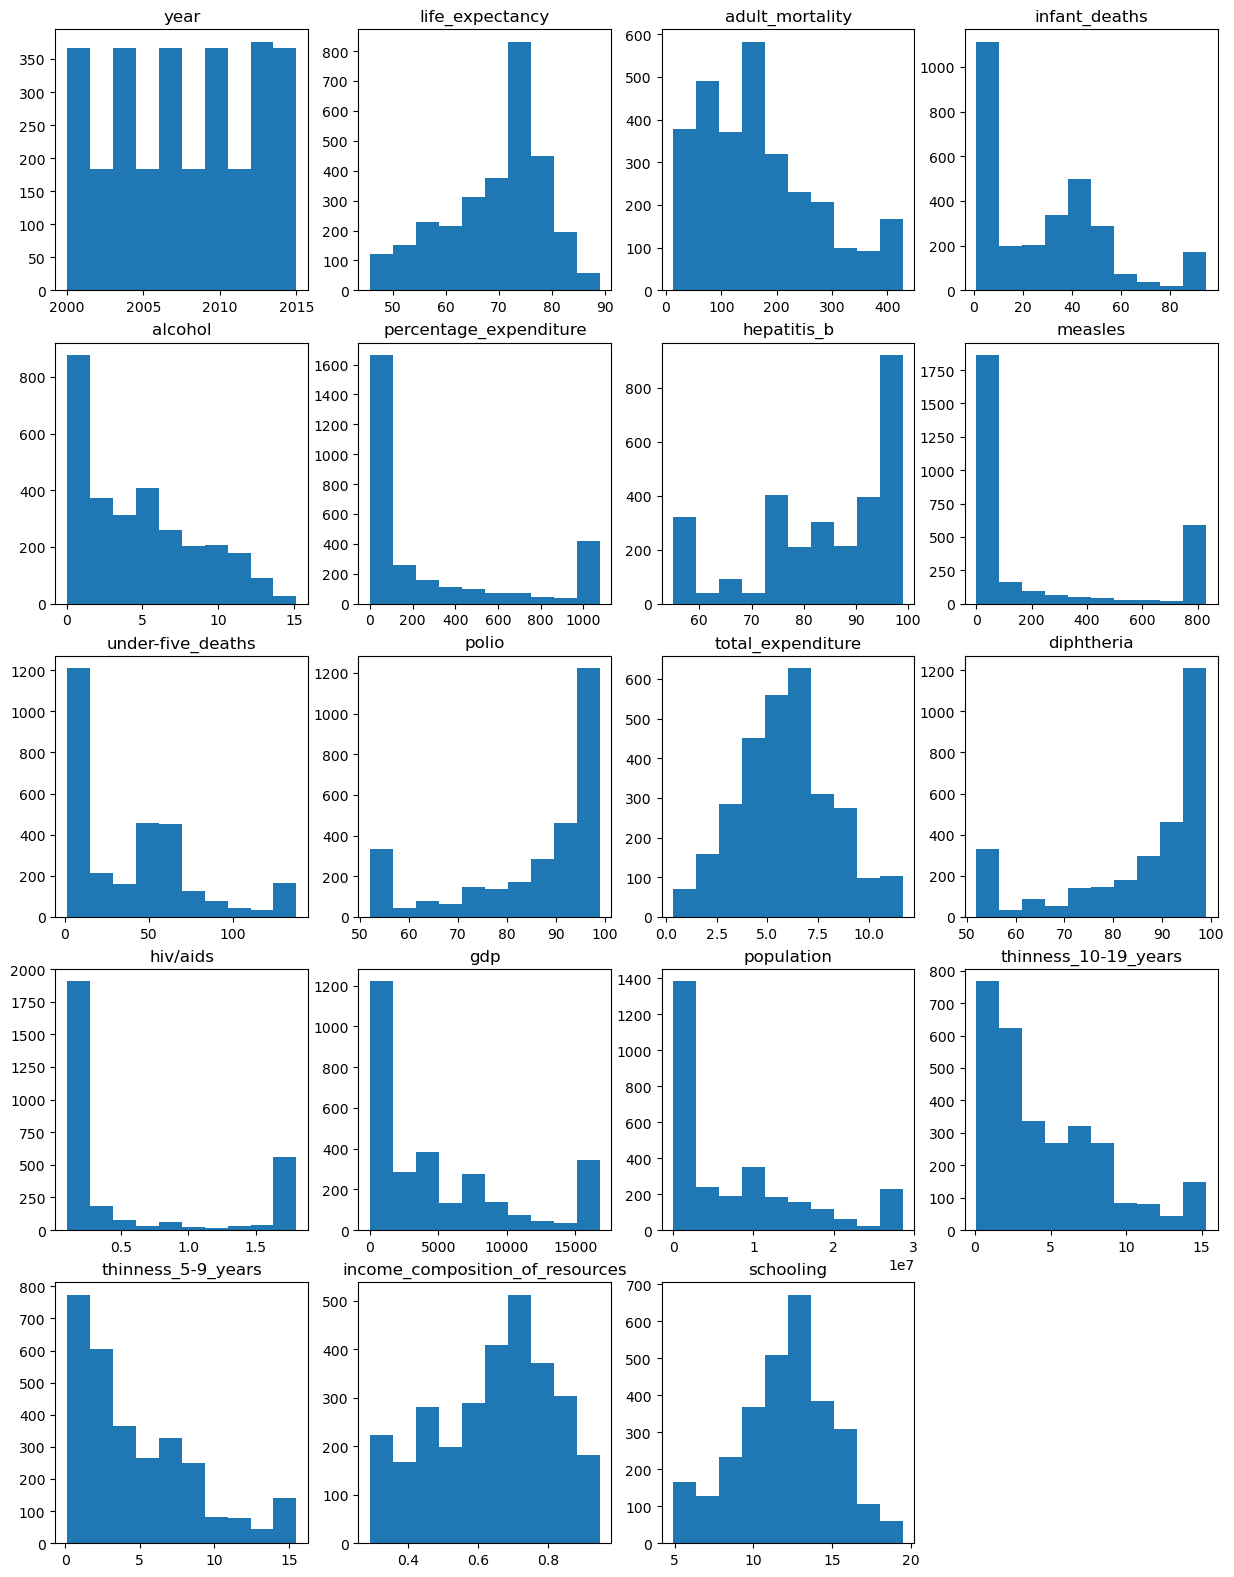

In [46]:
# Visualizamos la distribución de las variables continuas
visualize_distributions(df_wins_mean)

A partir de los descriptores estadísticos y la visualización de las distribuciones se nota que el winsorizing tuvo un efecto considerable en algunas variables (distribuciones no tan sesgadas, como por ejemplo income_composition_of_resources, schooling), aunque no tanto en otras (e.g. population, gdp). 

In [47]:
# Función para visualizar registros por país
def visualize_rows_by_country(df):
    plt.figure(figsize=(15, 25))
    df.country.value_counts(ascending=True).plot(kind='barh')
    plt.title('Count of Rows by Country')
    plt.xlabel('Count of Rows')
    plt.ylabel('Country')
    plt.tight_layout()
    plt.show()

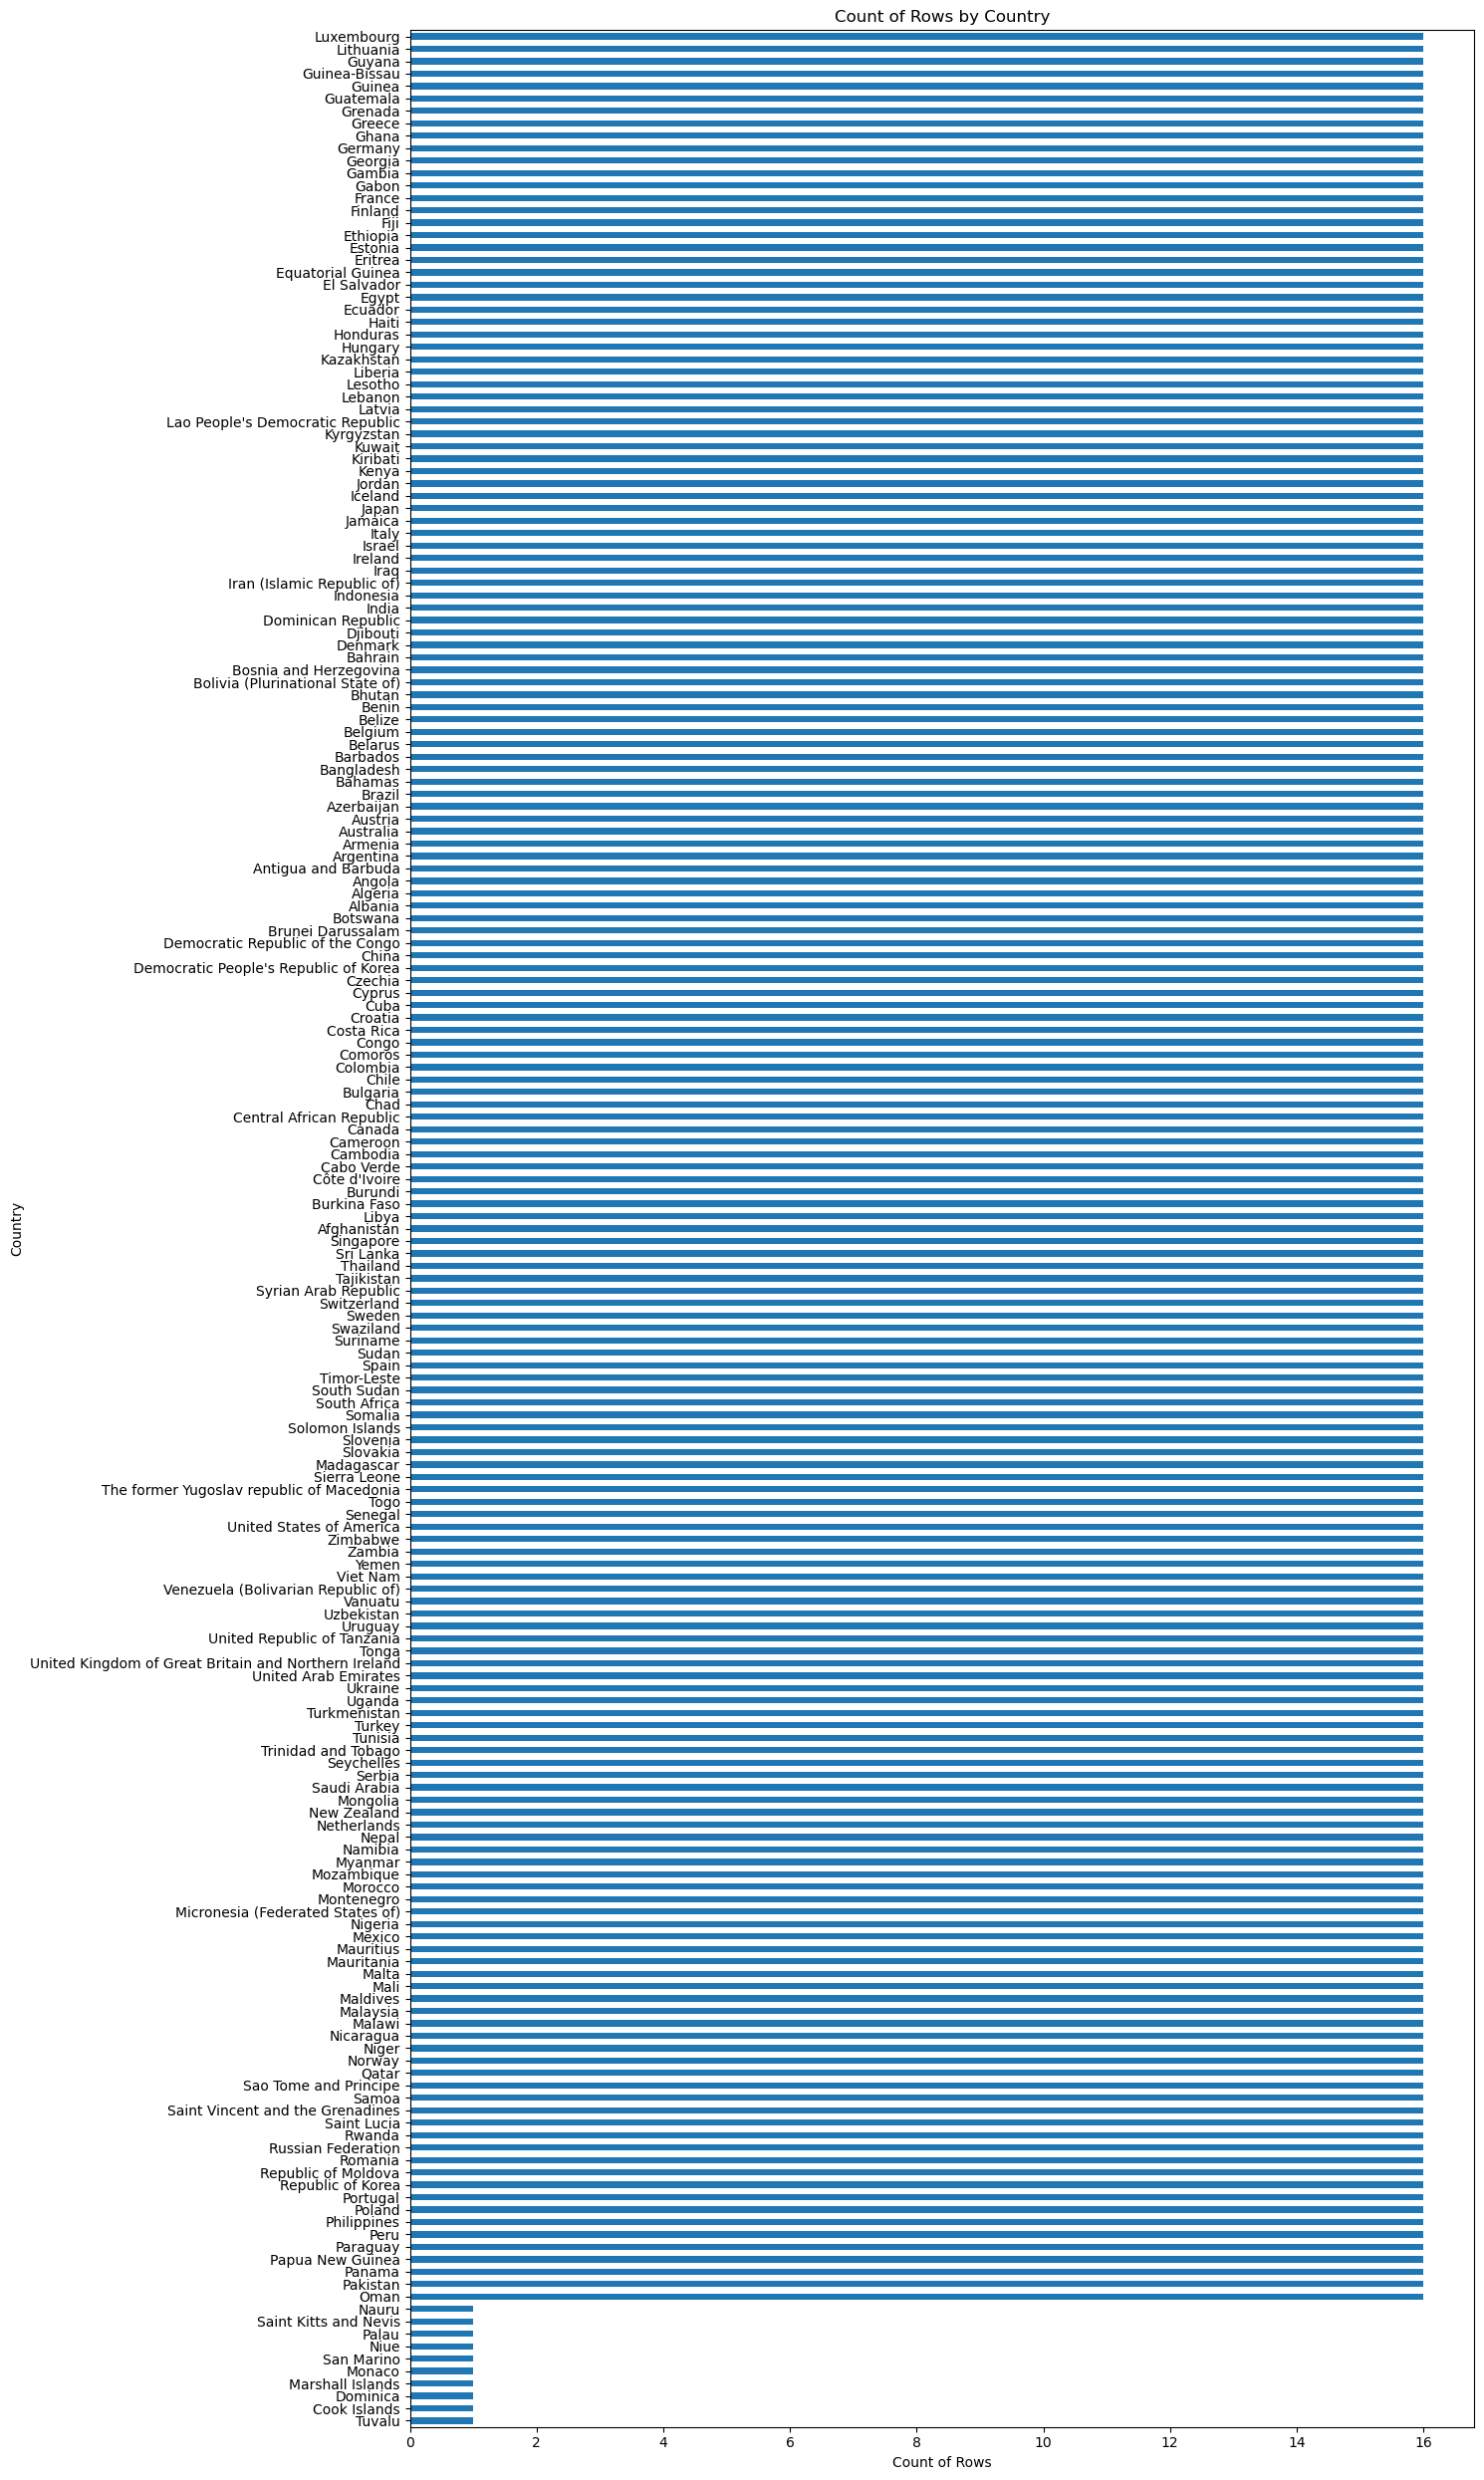

In [48]:
visualize_rows_by_country(df_wins_mean)

Aunque no resulta una gráfica muy amigable, se puede observar que la gran mayoría de países tienen 16 registros (16 años). Podemos notar que los países no están sobrerepresentados.

In [49]:
# Función para visualizar registros por año
def visualize_rows_by_year(df):
    df.year.value_counts().sort_index().plot(kind='barh')
    plt.title('Count of Rows by Year')
    plt.xlabel('Count of Rows')
    plt.ylabel('Year')
    plt.show()

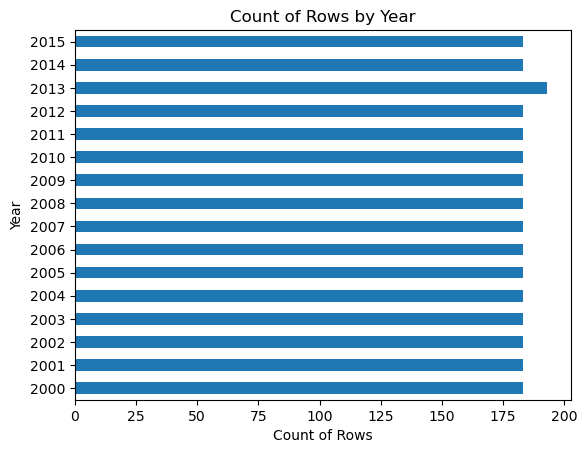

In [50]:
visualize_rows_by_year(df_wins_mean)

Observamos que todos los años tienen la misma cantidad de registros, con excepción del 2013. Tal vez en dicho año aparecieron los registros de aquellos países que tan solamente tuvieron 1 registro.

No pareciese significativo para los efectos resultantes de este análisis

In [51]:
def visualize_country_status(df):
    plt.figure(figsize=(10, 5))
    plt.subplot(121)
    df.status.value_counts().plot(kind='bar')
    plt.title('Count of Rows by Country Status')
    plt.xlabel('Country Status')
    plt.ylabel('Count of Rows')
    plt.xticks(rotation=0)

    plt.subplot(122)
    df.status.value_counts().plot(kind='pie', autopct='%.2f')
    plt.ylabel('')
    plt.title('Country Status Pie Chart')

    plt.show()

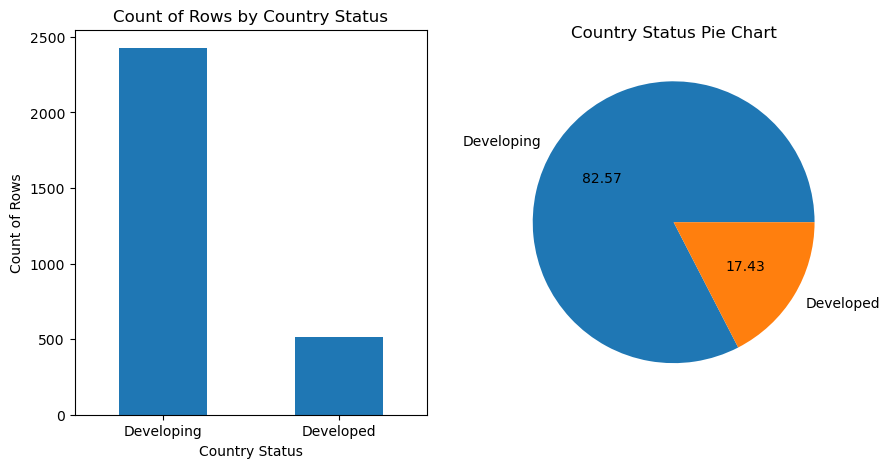

In [52]:
visualize_country_status(df_wins_mean)

A través de estos dos gráficos podemos observar que la gran mayoría de los datos provienen de países en vía de desarrollo. Claramente cualquier modelo que podamos llegar a implementar haciendo uso de estos datos arrojará datos más exactos para aquellos países en desarrollo.

In [53]:
# Descriptores estadísticos para valores continuos
df_wins_knn.describe()

year  life_expectancy  adult_mortality  infant_deaths  \
count  2938.000000      2938.000000      2938.000000    2938.000000   
mean   2007.518720        69.250113       167.875013      16.664326   
std       4.613841         9.465658       108.146848      16.805551   
min    2000.000000        45.600000        13.000000       1.000000   
25%    2004.000000        63.200000        84.000000       3.486842   
50%    2008.000000        72.100000       147.000000      10.842105   
75%    2012.000000        75.675000       228.000000      23.000000   
max    2015.000000        89.000000       428.000000      52.000000   

           alcohol  percentage_expenditure  hepatitis_b      measles  \
count  2938.000000             2938.000000  2938.000000  2938.000000   
mean      4.620931              283.137755    84.334259   220.691287   
std       3.937018              387.562247    14.528895   329.192321   
min       0.010000                0.000000    54.000000     0.000000   
25%       1.080000                4.685343    75.000000     0.000000   
50%       3.890000               64.912906    90.315789    17.000000   
75%       7.535526              441.534144    96.000000   360.250000   
max      15.140000             1089.954838    99.000000   831.000000   

       under-five_deaths        polio  total_expenditure   diphtheria  \
count        2938.000000  2938.000000        2938.000000  2938.000000   
mean           20.307800    85.993873           5.938088    85.538874   
std            20.925394    14.379122           2.304842    15.218578   
min             1.000000    56.000000           0.370000    52.000000   
25%             4.000000    78.000000           4.362500    78.000000   
50%            12.000000    93.000000           5.860000    93.000000   
75%            30.434211    97.000000           7.430000    97.000000   
max            61.000000    99.000000          11.660000    99.000000   

          hiv/aids          gdp    population  thinness_10-19_years  \
count  2938.000000  2938.000000  2.938000e+03           2938.000000   
mean      0.526991  3164.492115  5.426481e+06              4.716178   
std       0.675962  3178.791479  6.163806e+06              3.933769   
min       0.100000     1.681350  3.400000e+01              0.100000   
25%       0.100000   539.219186  4.189172e+05              1.600000   
50%       0.100000  1656.459530  2.815690e+06              3.400000   
75%       0.800000  5340.846475  8.357890e+06              7.200000   
max       1.800000  8787.613750  1.789956e+07             15.300000   

       thinness_5-9_years  income_composition_of_resources    schooling  
count         2938.000000                      2938.000000  2938.000000  
mean             4.732593                         0.637608    12.009792  
std              3.972211                         0.174914     3.131028  
min              0.100000                         0.284000     4.900000  
25%              1.600000                         0.494000    10.000000  
50%              3.400000                         0.673000    12.300000  
75%              7.200000                         0.774000    14.200000  
max             15.500000                         0.948000    19.500000

In [54]:
# Descriptores estadísticos para valores categóricos
df_wins_knn.describe(include='O')

status      country
count         2938         2938
unique           2          193
top     Developing  Afghanistan
freq          2426           16

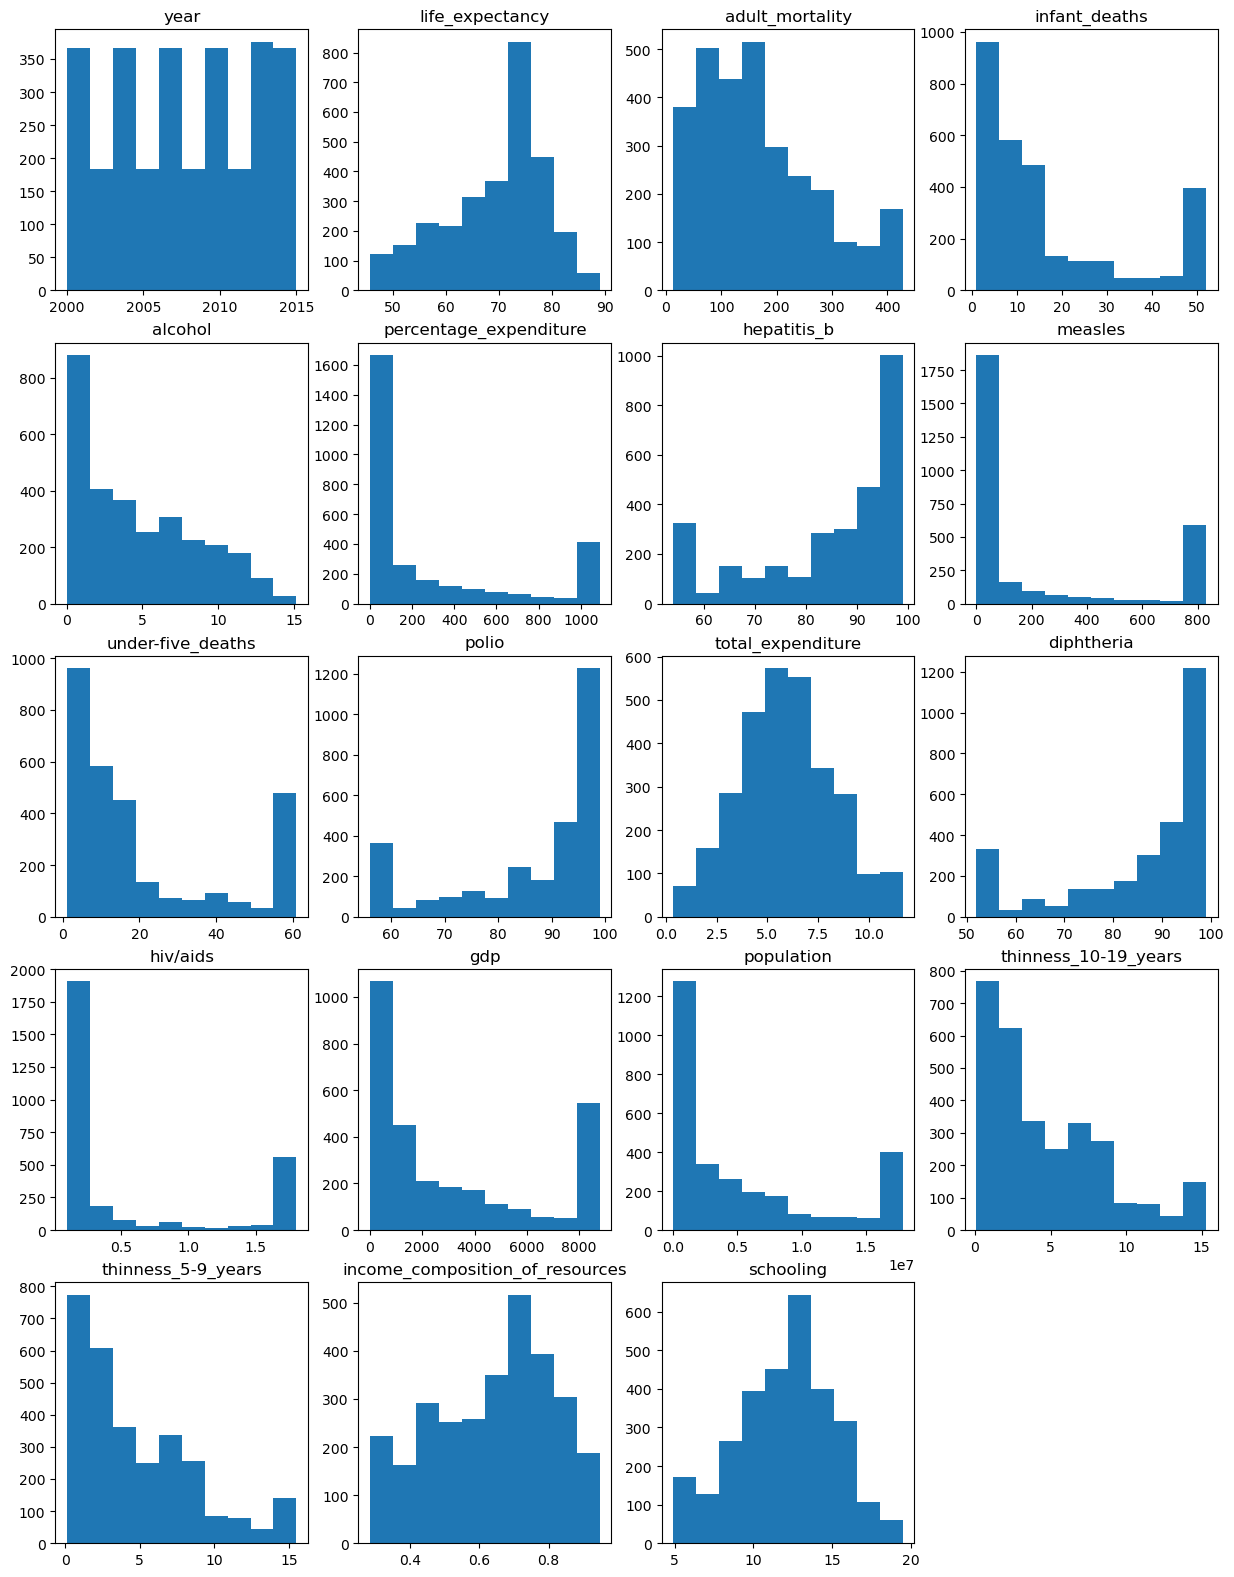

In [55]:
# Visualizamos la distribución de las variables continuas
visualize_distributions(df_wins_knn)

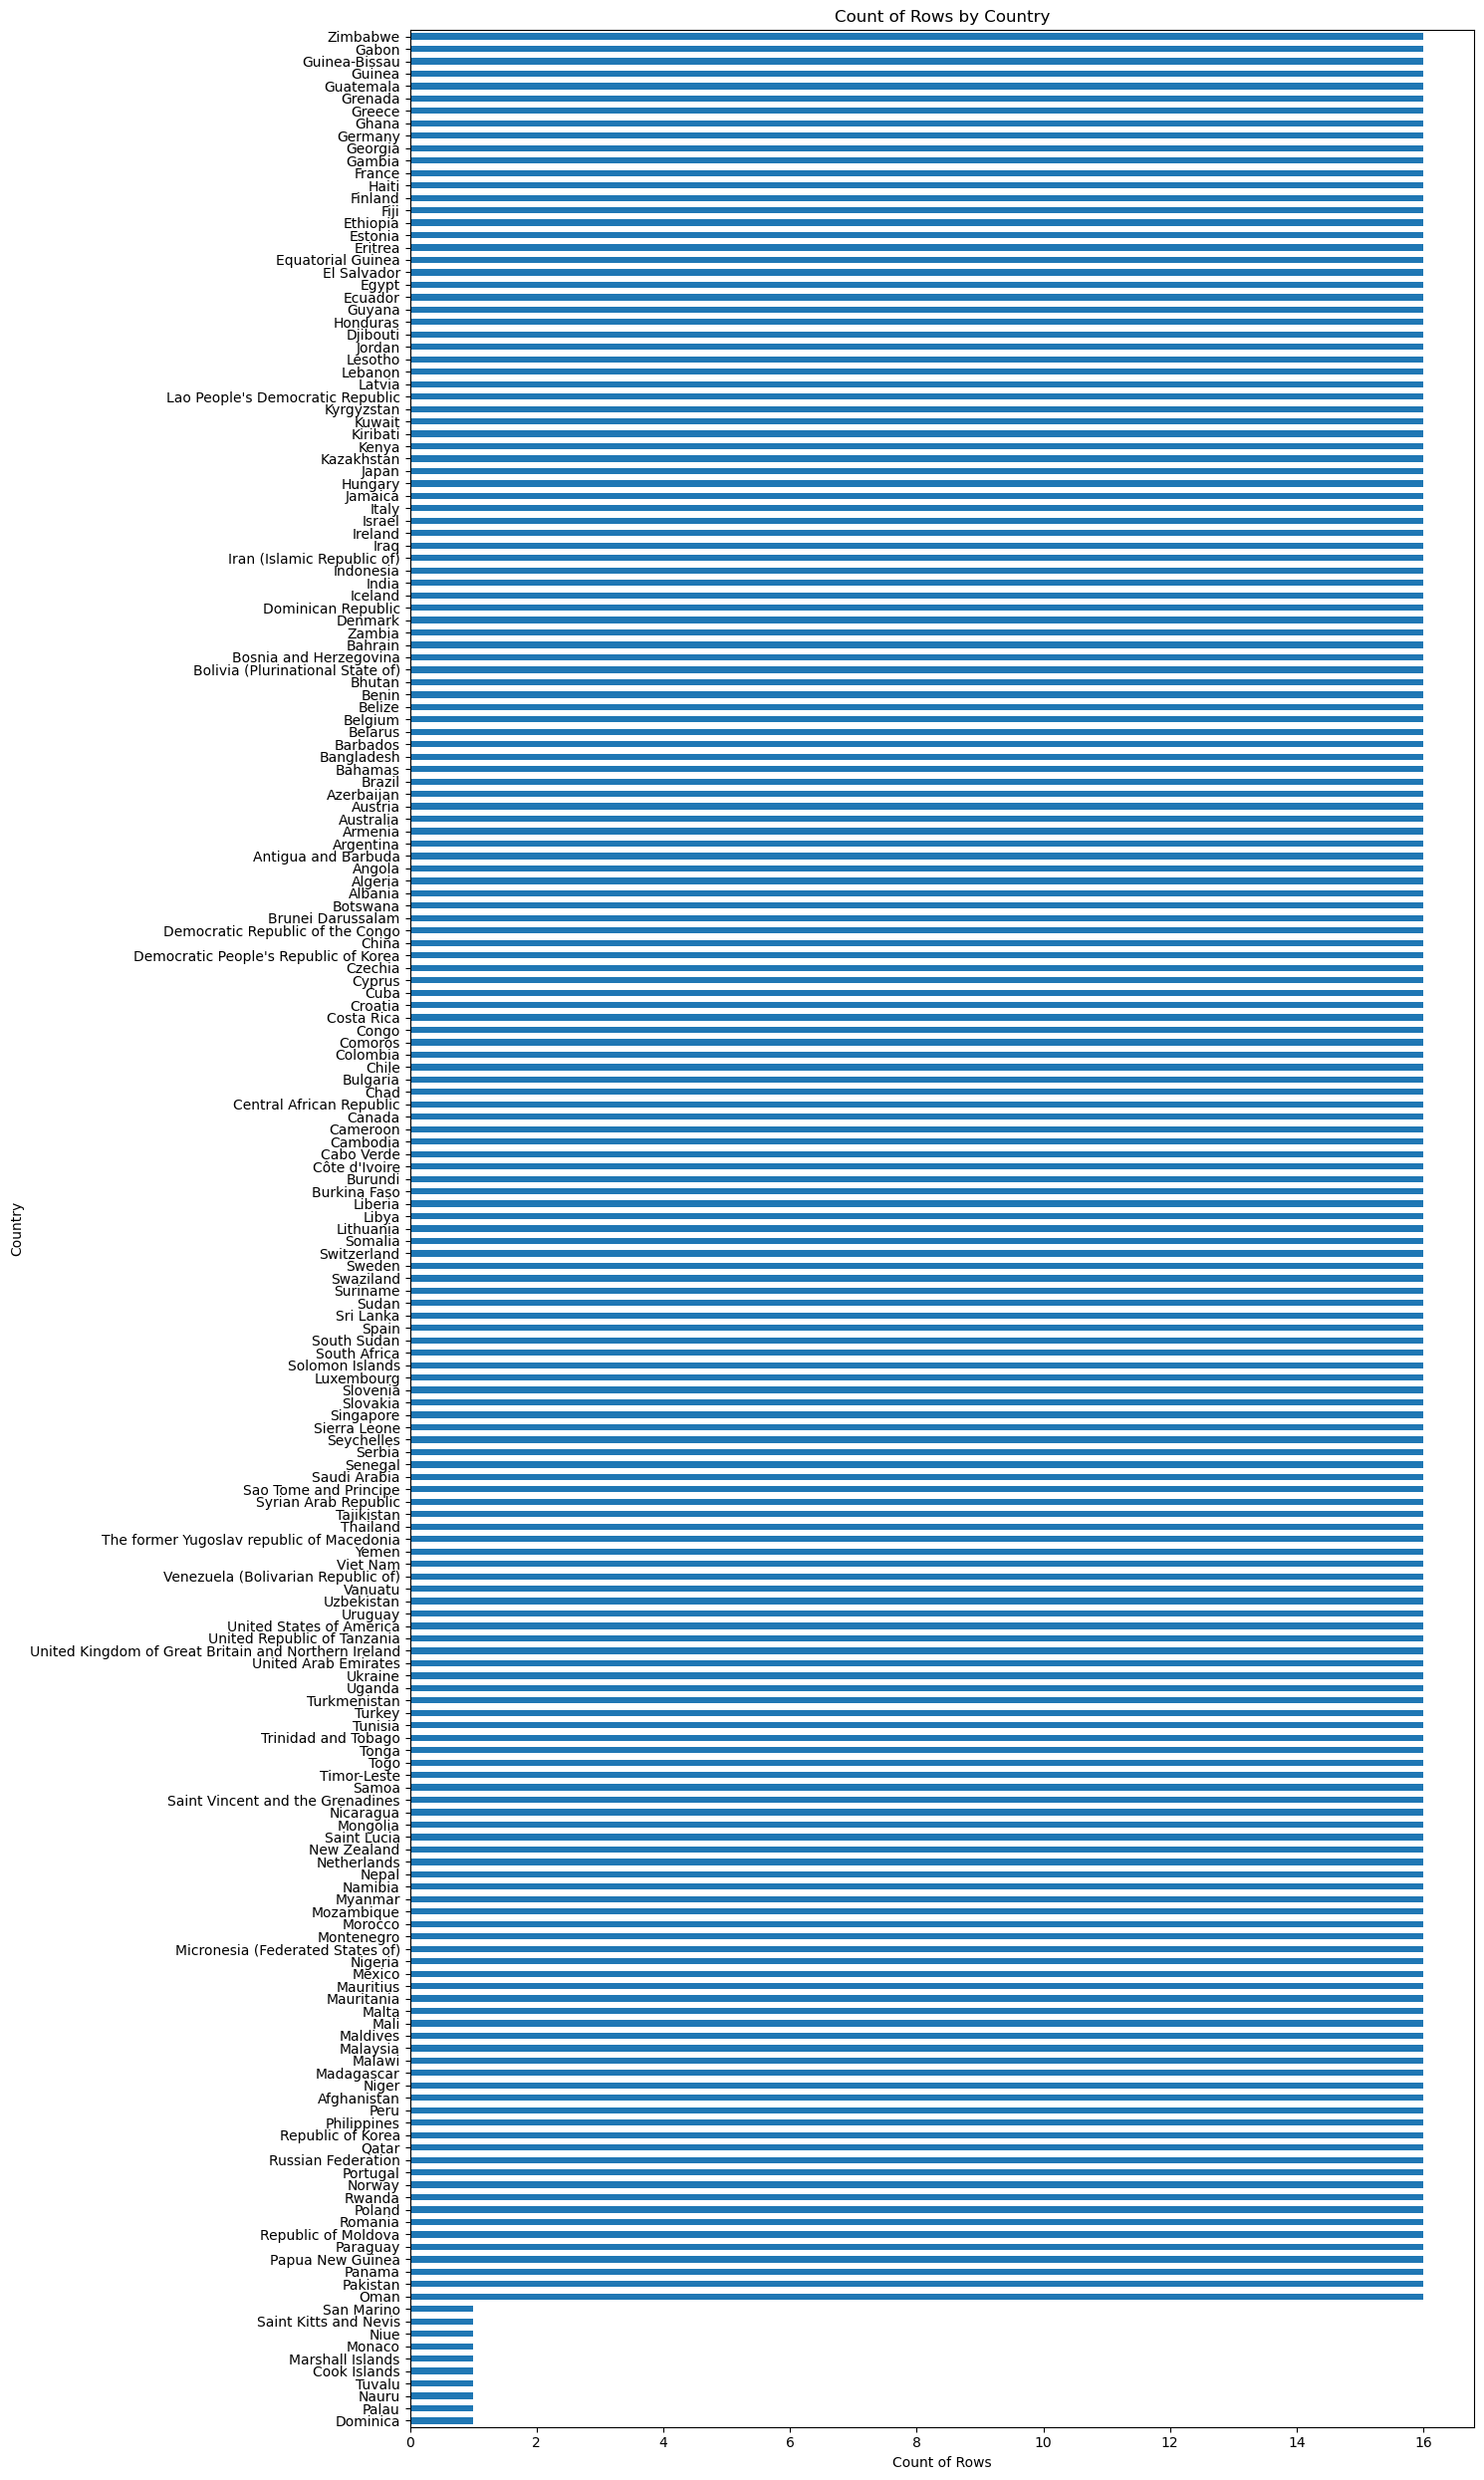

In [56]:
visualize_rows_by_country(df_wins_knn)

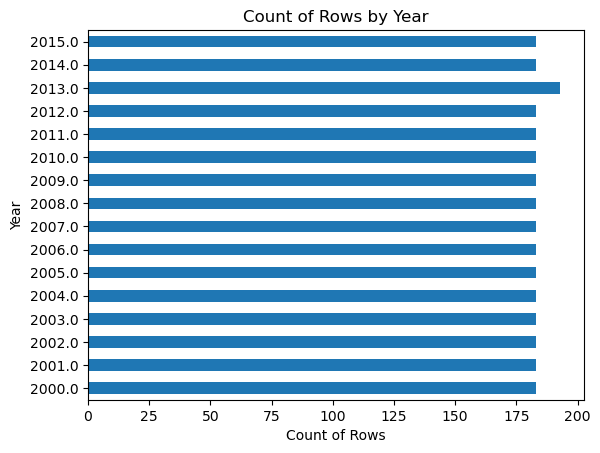

In [57]:
visualize_rows_by_year(df_wins_knn)

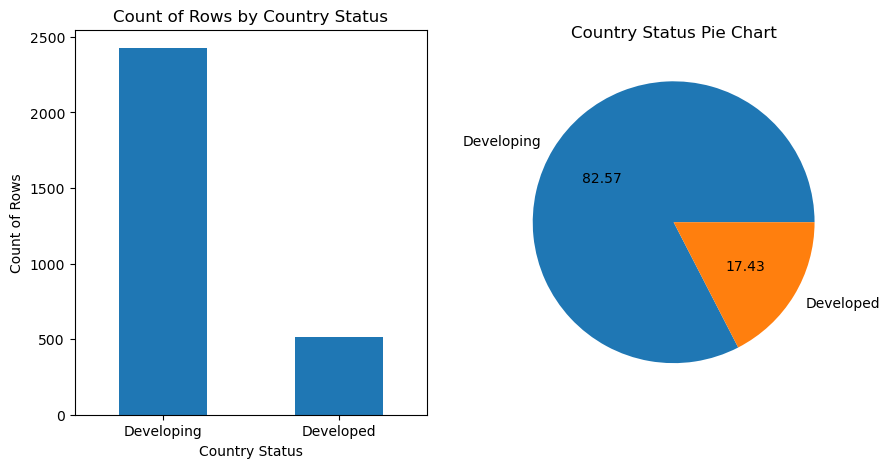

In [58]:
visualize_country_status(df_wins_knn)

### Análisis Bivariado
Aspectos de relevancia a tener en cuenta:
- Variables continuas con respecto a esperanza de vida (independientes vs dependiente) y entre ellas
- Variables categóricas con respecto a esperanza de vida (independientes vs dependiente)
- Variables categóricas con respecto a continuas (Caso de año y país vs las demás)

In [59]:
# Matriz de correlación entre variables continuas
df_wins_mean[df_wins_mean.select_dtypes('number').columns].corr()

year  life_expectancy  adult_mortality  \
year                             1.000000         0.169796        -0.074960   
life_expectancy                  0.169796         1.000000        -0.677680   
adult_mortality                 -0.074960        -0.677680         1.000000   
infant_deaths                   -0.077173        -0.222292         0.119906   
alcohol                         -0.031642         0.395089        -0.187971   
percentage_expenditure           0.032807         0.488440        -0.293870   
hepatitis_b                      0.203759         0.315120        -0.214673   
measles                         -0.118772        -0.337887         0.216200   
under-five_deaths               -0.097158        -0.298626         0.168908   
polio                            0.118122         0.573291        -0.348198   
total_expenditure                0.131170         0.222306        -0.121052   
diphtheria                       0.150044         0.578952        -0.351136   
hiv/aids                        -0.088913        -0.796939         0.596271   
gdp                              0.148771         0.501011        -0.297774   
population                       0.067801         0.011363        -0.000562   
thinness_10-19_years            -0.049728        -0.514966         0.332904   
thinness_5-9_years              -0.050187        -0.512694         0.339266   
income_composition_of_resources  0.224731         0.792878        -0.511340   
schooling                        0.210745         0.742306        -0.450785   

                                 infant_deaths   alcohol  \
year                                 -0.077173 -0.031642   
life_expectancy                      -0.222292  0.395089   
adult_mortality                       0.119906 -0.187971   
infant_deaths                         1.000000 -0.062119   
alcohol                              -0.062119  1.000000   
percentage_expenditure               -0.094053  0.378069   
hepatitis_b                          -0.196145  0.106352   
measles                               0.323610 -0.197193   
under-five_deaths                     0.966996 -0.104954   
polio                                -0.217511  0.265830   
total_expenditure                    -0.086289  0.308434   
diphtheria                           -0.225997  0.272948   
hiv/aids                              0.124310 -0.193443   
gdp                                  -0.059337  0.389598   
population                            0.176352 -0.036283   
thinness_10-19_years                  0.196669 -0.436755   
thinness_5-9_years                    0.202573 -0.427166   
income_composition_of_resources      -0.178389  0.475112   
schooling                            -0.191062  0.519757   

                                 percentage_expenditure  hepatitis_b  \
year                                           0.032807     0.203759   
life_expectancy                                0.488440     0.315120   
adult_mortality                               -0.293870    -0.214673   
infant_deaths                                 -0.094053    -0.196145   
alcohol                                        0.378069     0.106352   
percentage_expenditure                         1.000000     0.122870   
hepatitis_b                                    0.122870     1.000000   
measles                                       -0.194687    -0.266487   
under-five_deaths                             -0.131361    -0.239049   
polio                                          0.268385     0.608008   
total_expenditure                              0.159830     0.071100   
diphtheria                                     0.268411     0.647198   
hiv/aids                                      -0.295791    -0.278977   
gdp                                            0.712940     0.172066   
population                                    -0.070366    -0.004936   
thinness_10-19_years                          -0.331693    -0.134103   
thinness_5-9_years             

In [60]:
def correlation_matrix(df,y=True):
    if y:
        cont_vars = list(df.drop(['year'],axis=1).select_dtypes('number').columns)
    else:
        cont_vars = list(df.select_dtypes('number').columns)
    mask = np.triu(df[cont_vars].corr())
    plt.figure(figsize=(15,15))
    sns.heatmap(df[cont_vars].corr(), annot=True, fmt='.2g', vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=mask)
    plt.ylim(18, 0)
    plt.title('Correlation Matrix Heatmap')
    plt.show()

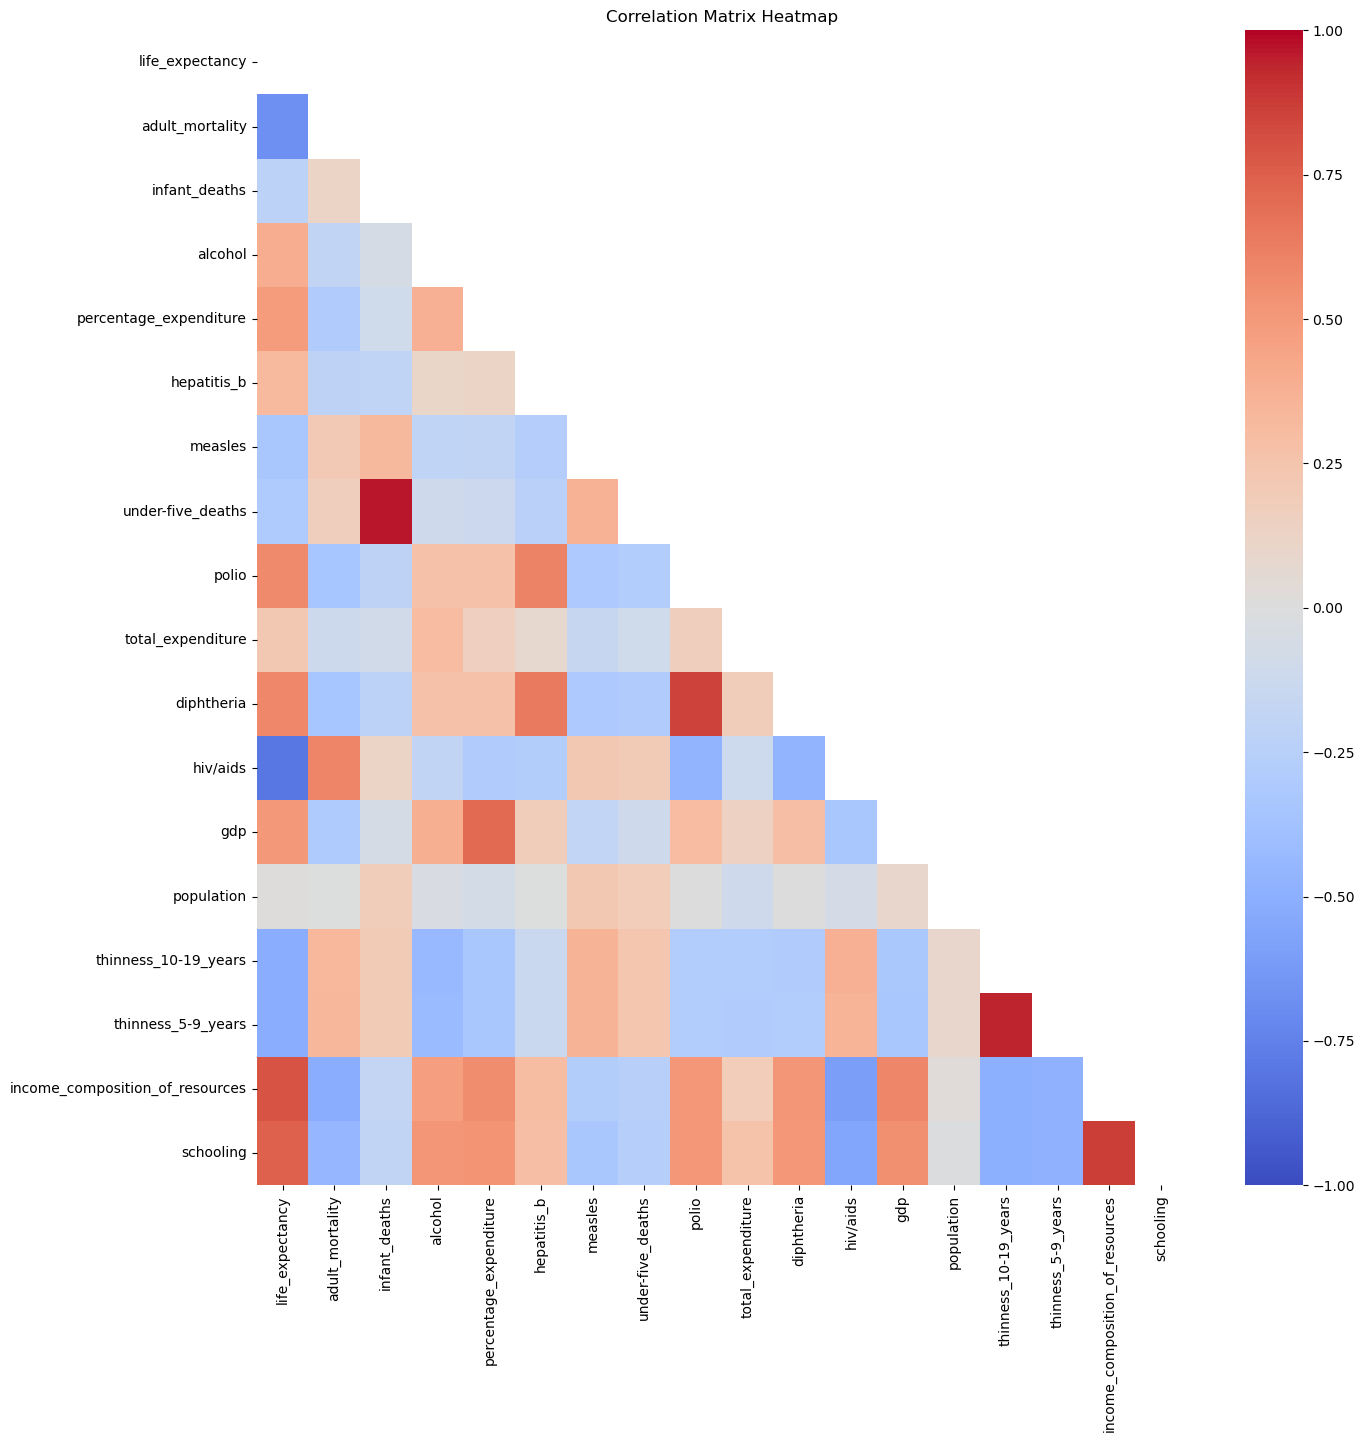

In [61]:
correlation_matrix(df_wins_mean)

Utilizando la matriz podemos observar importantes correlaciones entre variables
- Esperanza de vida está altamente correlacionada con:
    - Mortalidad adulta (negativa)
    - HIV/AIDS (negativa)
    - income_composition_of_resources (positiva)
    - schooling (positiva)
- La variable objetivo se encuentra bajamente correlacionada con la población
- infant_deaths y under_five_deaths evidentemente están altamente correlacionadas
- perecentage_expenditure se encuentra altamente correlacionada con gdp
- hepatitis_b está altamente correlacionada con polio y diphteria
- polio y diphteria están altamente correlacionadas
- HIV/AIDS se encuentra negativamente correlacionada con with income_composition_of_resources
- thinness_5-9_years está altamente correlacionada con thinness_10-15_years
- income_composition_of_resources está altamente relacionada con schooling

Se debe evitar variables independientes altamente correlacionadas entre sí. Igualmente, las variables independientes altamente correlacionadas con la variable dependiente pueden resultar más importante a la hora de implementar los modelos



In [62]:
def visualize_year_life_expectancy(df):
    sns.lineplot(data=df, x='year', y='life_expectancy', marker='o')
    plt.title('Life Expectancy by Year')
    plt.show()

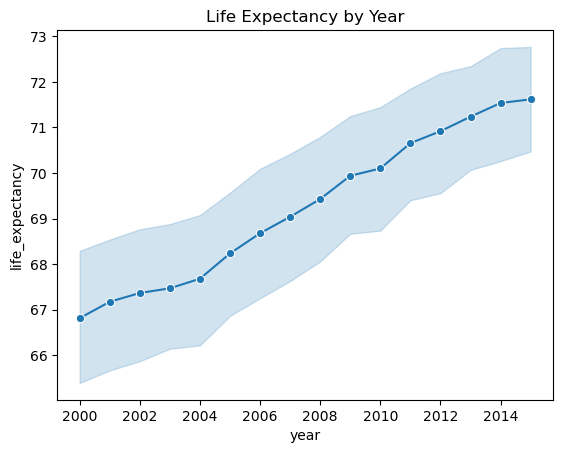

In [63]:
visualize_year_life_expectancy(df_wins_mean)

A partir del gráfico anterior podemos observar una tendencia, hay que corroborar si resulta significativa para incluirla dentro del modelo

In [64]:
df_wins_mean.year.corr(df_wins_mean.life_expectancy)

0.16979644964459023

Existe una correlación débil, se debe indagar a más profundidad si las diferencias entre años resultan considerables para considerarlos distintos.

Un A-test resultaría útil para verificar.

In [65]:
from scipy import stats

def t_testing_years(df):
    years = list(df.year.unique())
    years.sort()
    yearly_le = {}
    for year in years:
        year_data = df[df.year == year].life_expectancy
        yearly_le[year] = year_data
    for year in years[:-1]:
        print(10*'-' + str(year) + ' to ' + str(year+1) + 10*'-')
        print(stats.ttest_ind(yearly_le[year], yearly_le[year+1], equal_var=False))

In [66]:
t_testing_years(df_wins_mean)

----------2000 to 2001----------
TtestResult(statistic=-0.339874273786677, pvalue=0.734147249286317, df=363.98663436040533)
----------2001 to 2002----------
TtestResult(statistic=-0.18288775743069652, pvalue=0.8549879128960569, df=363.9882604620108)
----------2002 to 2003----------
TtestResult(statistic=-0.09788073999943862, pvalue=0.922080868750695, df=363.9991126846104)
----------2003 to 2004----------
TtestResult(statistic=-0.20076791323205204, pvalue=0.8409921852108723, df=363.99993236234945)
----------2004 to 2005----------
TtestResult(statistic=-0.5360239830703207, pvalue=0.5922696887371386, df=363.6424169927271)
----------2005 to 2006----------
TtestResult(statistic=-0.43512464639644277, pvalue=0.6637298353979988, df=363.9904788724197)
----------2006 to 2007----------
TtestResult(statistic=-0.35499521065847695, pvalue=0.7227988446996725, df=363.8791483489816)
----------2007 to 2008----------
TtestResult(statistic=-0.39657900568183463, pvalue=0.6919107746155075, df=363.3042534056

Teniendo en cuenta que para un t-test si el valor del p-value no es menor que 0.05 no es considerado como estadísticamente significativo, podemos observar que la diferencia entre años para la esperanza de vida no resulta significativa. 

Ahora revisamos para el caso de status. Observando la diferencia entre develping y developed con respecto de la esperanza de vida.

In [67]:
df_wins_mean.groupby('status').life_expectancy.agg(['mean'])

mean
status               
Developed   79.197852
Developing  67.149077

Se observa que los países desarrollados parecen tener una esperanza de vida más alta. Para corroborar podemos utilizar un t-test.

In [68]:
def t_testing_status(df):
    developed_le = df[df.status == 'Developed'].life_expectancy
    developing_le = df[df.status == 'Developing'].life_expectancy
    print(stats.ttest_ind(developed_le, developing_le, equal_var=False)) 

In [69]:
t_testing_status(df_wins_mean)

TtestResult(statistic=47.96440581661328, pvalue=2e-323, df=1786.0691515042445)


A partir del p-value se puede corroborar que las diferencias son muy significativas. Lo cual nos indica que status puede resultar importante para la implementación de futuros modelos.

### 3.3. Ingeniería de características

Vamos a eliminar y/o crear nuevas características que nos resulten útiles para la futura implementación de nuestros modelos

In [70]:
# Creamos un Transformer personalizado para dummificar la variable status y eliminar
# las variables year y country
class Dummify(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        result = X.copy()
        result = result.drop(columns=['year','country'])
        result = pd.get_dummies(result,columns=['status'],dtype=float)
        return result

In [71]:
df_wins_mean_dummified = Dummify().fit_transform(df_wins_mean)
df_wins_mean_dummified

life_expectancy  adult_mortality  infant_deaths   alcohol  \
0                65.0            263.0      62.000000  0.010000   
16               77.8             74.0      35.129032  4.600000   
32               75.6             19.0      21.000000  5.288333   
48               52.4            335.0      66.000000  5.288333   
64               76.4             13.0      35.129032  5.288333   
...               ...              ...            ...       ...   
2873             72.5            168.0      11.000000  8.010000   
2889             73.4            139.0      33.000000  1.600000   
2905             68.0            252.0      48.000000  0.070000   
2921             45.6            428.0      44.000000  2.620000   
2937             46.0            428.0      24.000000  1.680000   

      percentage_expenditure  hepatitis_b  measles  under-five_deaths  polio  \
0                  71.279624    65.000000      831          83.000000   52.0   
16                364.975229    99.000000        0          44.844961   99.0   
32                  0.000000    95.000000       63          24.000000   95.0   
48                  0.000000    64.000000      118          98.000000   52.0   
64                  0.000000    99.000000        0          44.844961   86.0   
...                      ...          ...      ...                ...    ...   
2873                0.000000    55.000000       22          13.000000   86.0   
2889                0.000000    74.035294      831          43.000000   96.0   
2905                0.000000    55.000000        0          66.000000   74.0   
2921               45.616880    74.035294      831          72.000000   85.0   
2937                0.000000    79.000000      831          39.000000   78.0   

      total_expenditure  diphtheria  hiv/aids           gdp    population  \
0                  8.16        65.0       0.1    584.259210  2.865628e+07   
16                 6.00        99.0       0.1   3954.227830  2.887300e+04   
32                 7.08        95.0       0.1   4132.762920  2.865628e+07   
48                 7.08        64.0       1.8   3695.793748  2.785935e+06   
64                 7.08        99.0       0.2  13566.954100  1.109741e+07   
...                 ...         ...       ...           ...           ...   
2873               4.91        77.0       0.1   4708.515191  9.440444e+06   
2889               4.89        96.0       0.1   4708.515191  9.440444e+06   
2905               4.14        74.0       0.1   4708.515191  9.440444e+06   
2921               7.16        85.0       1.8    341.955625  1.531221e+06   
2937               7.10        78.0       1.8    547.358878  1.222225e+07   

      thinness_10-19_years  thinness_5-9_years  \
0                     15.3                15.5   
16                     1.2                 1.3   
32                     6.0                 5.8   
48                     8.3                 8.2   
64                     3.3                 3.3   
...                    ...                 ...   
2873                   1.8                 1.7   
2889                  15.3                15.5   
2905                  14.1                14.1   
2921                   7.5                 7.5   
2937                  11.0                11.2   

      income_composition_of_resources  schooling  status_Developed  \
0                               0.479       10.1               0.0   
16                              0.762       14.2               0.0   
32                              0.743       14.4               0.0   
48                              0.531       11.4               0.0   
64                              0.784       13.9               0.0   
...                               ...        ...               ...   
2873                            0.670       10.6               0.0   
2889                            0.569       10.4               0.0   
2905                            0.436        7.7               0.0   
2921          

In [72]:
df_wins_knn_dummified = Dummify().fit_transform(df_wins_knn)
df_wins_knn_dummified

life_expectancy  adult_mortality  infant_deaths  alcohol  \
0                65.0            263.0           52.0     0.01   
1                59.9            271.0           52.0     0.01   
2                59.9            268.0           52.0     0.01   
3                59.5            272.0           52.0     0.01   
4                59.2            275.0           52.0     0.01   
...               ...              ...            ...      ...   
2933             45.6            428.0           27.0     4.36   
2934             45.6            428.0           26.0     4.06   
2935             45.6             73.0           25.0     4.43   
2936             45.6            428.0           25.0     1.72   
2937             46.0            428.0           24.0     1.68   

      percentage_expenditure  hepatitis_b  measles  under-five_deaths  polio  \
0                  71.279624         65.0    831.0               61.0   56.0   
1                  73.523582         62.0    492.0               61.0   58.0   
2                  73.219243         64.0    430.0               61.0   62.0   
3                  78.184215         67.0    831.0               61.0   67.0   
4                   7.097109         68.0    831.0               61.0   68.0   
...                      ...          ...      ...                ...    ...   
2933                0.000000         68.0     31.0               42.0   67.0   
2934                0.000000         54.0    831.0               41.0   56.0   
2935                0.000000         73.0    304.0               40.0   73.0   
2936                0.000000         76.0    529.0               39.0   76.0   
2937                0.000000         79.0    831.0               39.0   78.0   

      total_expenditure  diphtheria  hiv/aids         gdp  population  \
0                  8.16        65.0       0.1  584.259210  17899562.0   
1                  8.18        62.0       0.1  612.696514    327582.0   
2                  8.13        64.0       0.1  631.744976  17899562.0   
3                  8.52        67.0       0.1  669.959000   3696958.0   
4                  7.87        68.0       0.1   63.537231   2978599.0   
...                 ...         ...       ...         ...         ...   
2933               7.13        65.0       1.8  454.366654  12777511.0   
2934               6.52        68.0       1.8  453.351155  12633897.0   
2935               6.53        71.0       1.8   57.348340    125525.0   
2936               6.16        75.0       1.8  548.587312  12366165.0   
2937               7.10        78.0       1.8  547.358878  12222251.0   

      thinness_10-19_years  thinness_5-9_years  \
0                     15.3                15.5   
1                     15.3                15.5   
2                     15.3                15.5   
3                     15.3                15.5   
4                     15.3                15.5   
...                    ...                 ...   
2933                   9.4                 9.4   
2934                   9.8                 9.9   
2935                   1.2                 1.3   
2936                   1.6                 1.7   
2937                  11.0                11.2   

      income_composition_of_resources  schooling  status_Developed  \
0                               0.479       10.1               0.0   
1                               0.476       10.0               0.0   
2                               0.470        9.9               0.0   
3                               0.463        9.8               0.0   
4                               0.454        9.5               0.0   
...                               ...        ...               ...   
2933                            0.407        9.2               0.0   
2934                            0.418        9.5               0.0   
2935                            0.427       10.0               0.0   
2936                            0.427        9.8               0.0   
2937

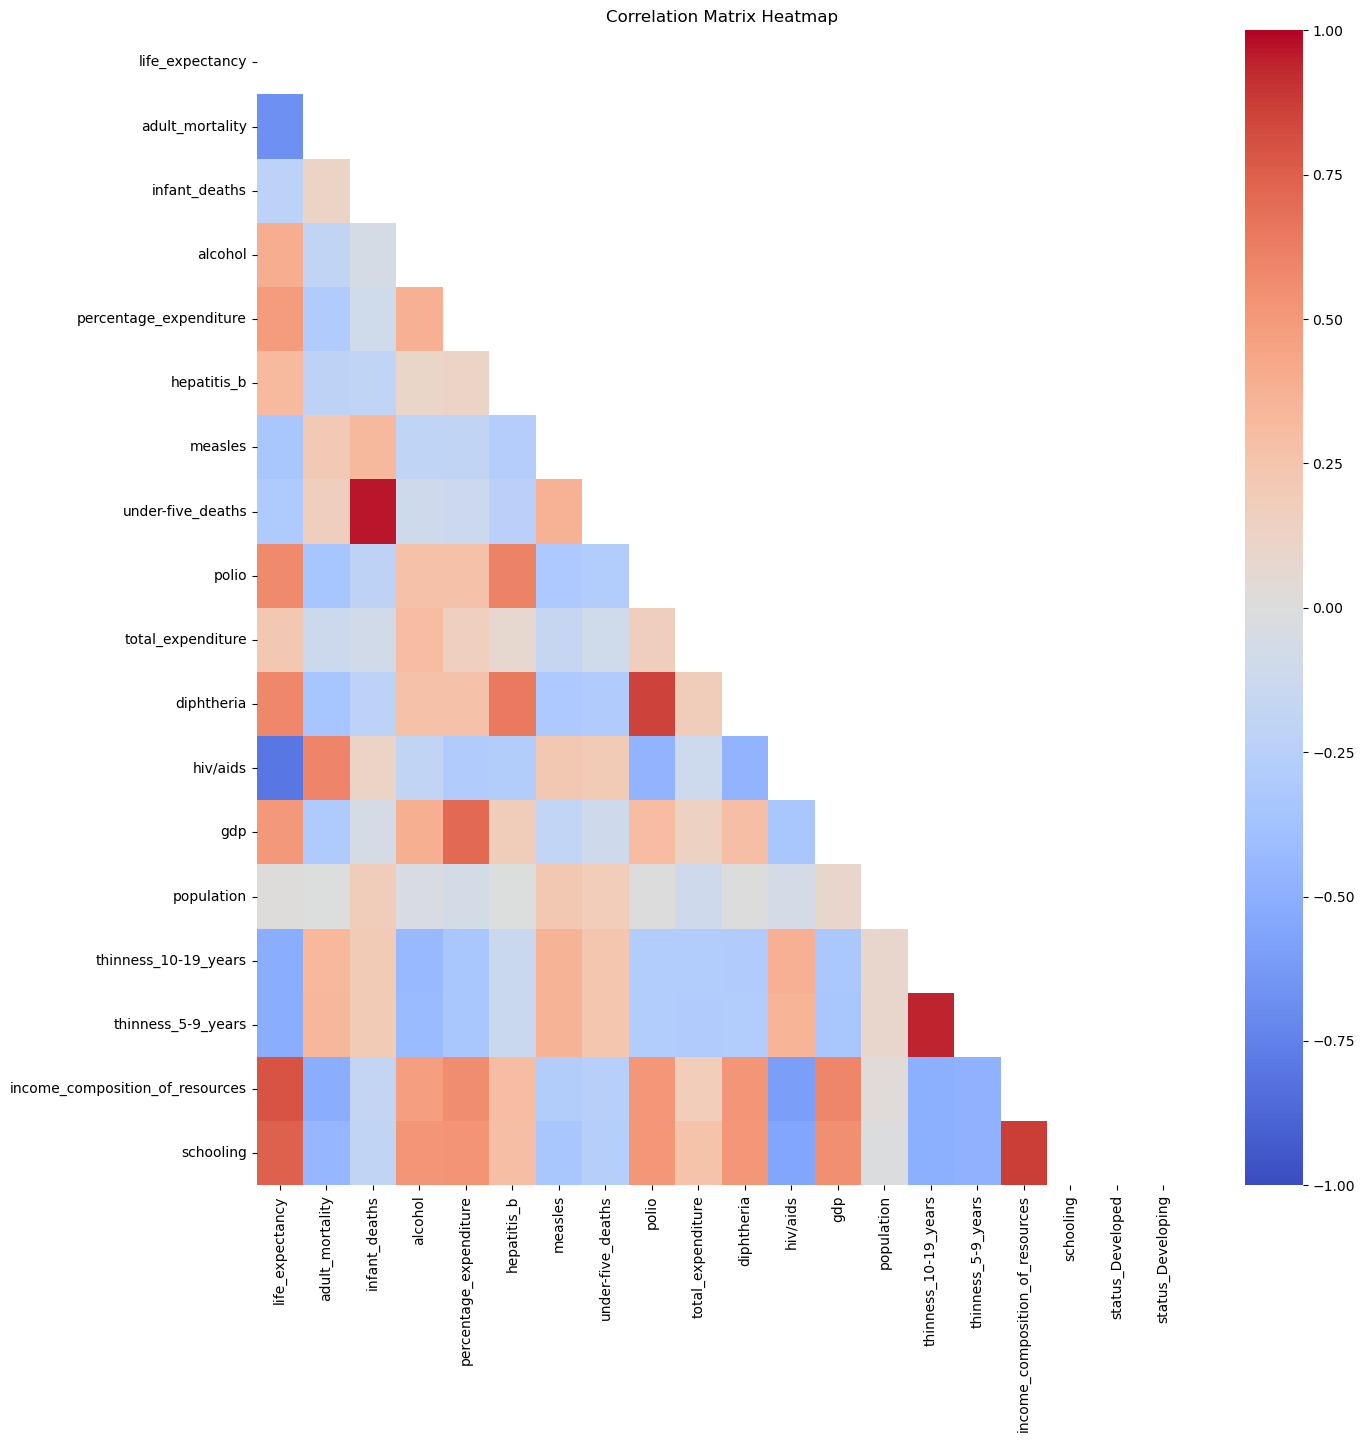

In [73]:
correlation_matrix(df_wins_mean_dummified,False)

Las siguientes variables podemos considerarlas como altamente correlacionadas entre sí (correlación > .7 o correlación < -.7):

- infant_deaths/under_five_deaths: 0.97 (hacer drop de infant_deaths ya que under_five_deaths está más altamente correlacionados con la esperanza de vida)
- gdp/percentage_expenditure: 0.71 (hacer drop de percentage_expenditure ya que gdp está más altamente correlacionados con la esperanza de vida)
- polio/diphtheria: 0.86 (hacer drop de polio ya que diphteria está más altamente correlacionados con la esperanza de vida)
- thinness_5-9_years/thinness_10-19_years: 0.94 (hacer drop de thinness_10-19_years ya que thinness_5-9_years está ligeramente más altamente correlacionados con la esperanza de vida)
- income_composition_of_resources/schooling (hacer drop de schooling ya que income_composition_of_resource está más altamente correlacionados con la esperanza de vidad)
- status_Developed/status_Developing (hacer drop de status_Developing ya que uno es el opuesto del otro)

Puede resultar útil eliminar las variables que no se encuentren muy correlacionadas con la esperanza de vida.
- population

In [74]:
# Creamos un Transformer personalizado para realizar la eliminación de variables
# a partir de sus correlaciones
#Se eliminan las variables que no están altamente correlacionadas con la variable objetivo
#Se eliminan las variables dependientes con alta correlación -> multicolinealidad
class Remove_highly_correlated_features(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        result = X.copy()
        result = result.drop(columns=['infant_deaths', 'percentage_expenditure','polio',
                                      'thinness_10-19_years','schooling','status_Developing',
                                      'population'])
        return result

In [75]:
df_wins_mean_dummified_removed = Remove_highly_correlated_features().fit_transform(df_wins_mean_dummified)
df_wins_knn_dummified

life_expectancy  adult_mortality  infant_deaths  alcohol  \
0                65.0            263.0           52.0     0.01   
1                59.9            271.0           52.0     0.01   
2                59.9            268.0           52.0     0.01   
3                59.5            272.0           52.0     0.01   
4                59.2            275.0           52.0     0.01   
...               ...              ...            ...      ...   
2933             45.6            428.0           27.0     4.36   
2934             45.6            428.0           26.0     4.06   
2935             45.6             73.0           25.0     4.43   
2936             45.6            428.0           25.0     1.72   
2937             46.0            428.0           24.0     1.68   

      percentage_expenditure  hepatitis_b  measles  under-five_deaths  polio  \
0                  71.279624         65.0    831.0               61.0   56.0   
1                  73.523582         62.0    492.0               61.0   58.0   
2                  73.219243         64.0    430.0               61.0   62.0   
3                  78.184215         67.0    831.0               61.0   67.0   
4                   7.097109         68.0    831.0               61.0   68.0   
...                      ...          ...      ...                ...    ...   
2933                0.000000         68.0     31.0               42.0   67.0   
2934                0.000000         54.0    831.0               41.0   56.0   
2935                0.000000         73.0    304.0               40.0   73.0   
2936                0.000000         76.0    529.0               39.0   76.0   
2937                0.000000         79.0    831.0               39.0   78.0   

      total_expenditure  diphtheria  hiv/aids         gdp  population  \
0                  8.16        65.0       0.1  584.259210  17899562.0   
1                  8.18        62.0       0.1  612.696514    327582.0   
2                  8.13        64.0       0.1  631.744976  17899562.0   
3                  8.52        67.0       0.1  669.959000   3696958.0   
4                  7.87        68.0       0.1   63.537231   2978599.0   
...                 ...         ...       ...         ...         ...   
2933               7.13        65.0       1.8  454.366654  12777511.0   
2934               6.52        68.0       1.8  453.351155  12633897.0   
2935               6.53        71.0       1.8   57.348340    125525.0   
2936               6.16        75.0       1.8  548.587312  12366165.0   
2937               7.10        78.0       1.8  547.358878  12222251.0   

      thinness_10-19_years  thinness_5-9_years  \
0                     15.3                15.5   
1                     15.3                15.5   
2                     15.3                15.5   
3                     15.3                15.5   
4                     15.3                15.5   
...                    ...                 ...   
2933                   9.4                 9.4   
2934                   9.8                 9.9   
2935                   1.2                 1.3   
2936                   1.6                 1.7   
2937                  11.0                11.2   

      income_composition_of_resources  schooling  status_Developed  \
0                               0.479       10.1               0.0   
1                               0.476       10.0               0.0   
2                               0.470        9.9               0.0   
3                               0.463        9.8               0.0   
4                               0.454        9.5               0.0   
...                               ...        ...               ...   
2933                            0.407        9.2               0.0   
2934                            0.418        9.5               0.0   
2935                            0.427       10.0               0.0   
2936                            0.427        9.8               0.0   
2937

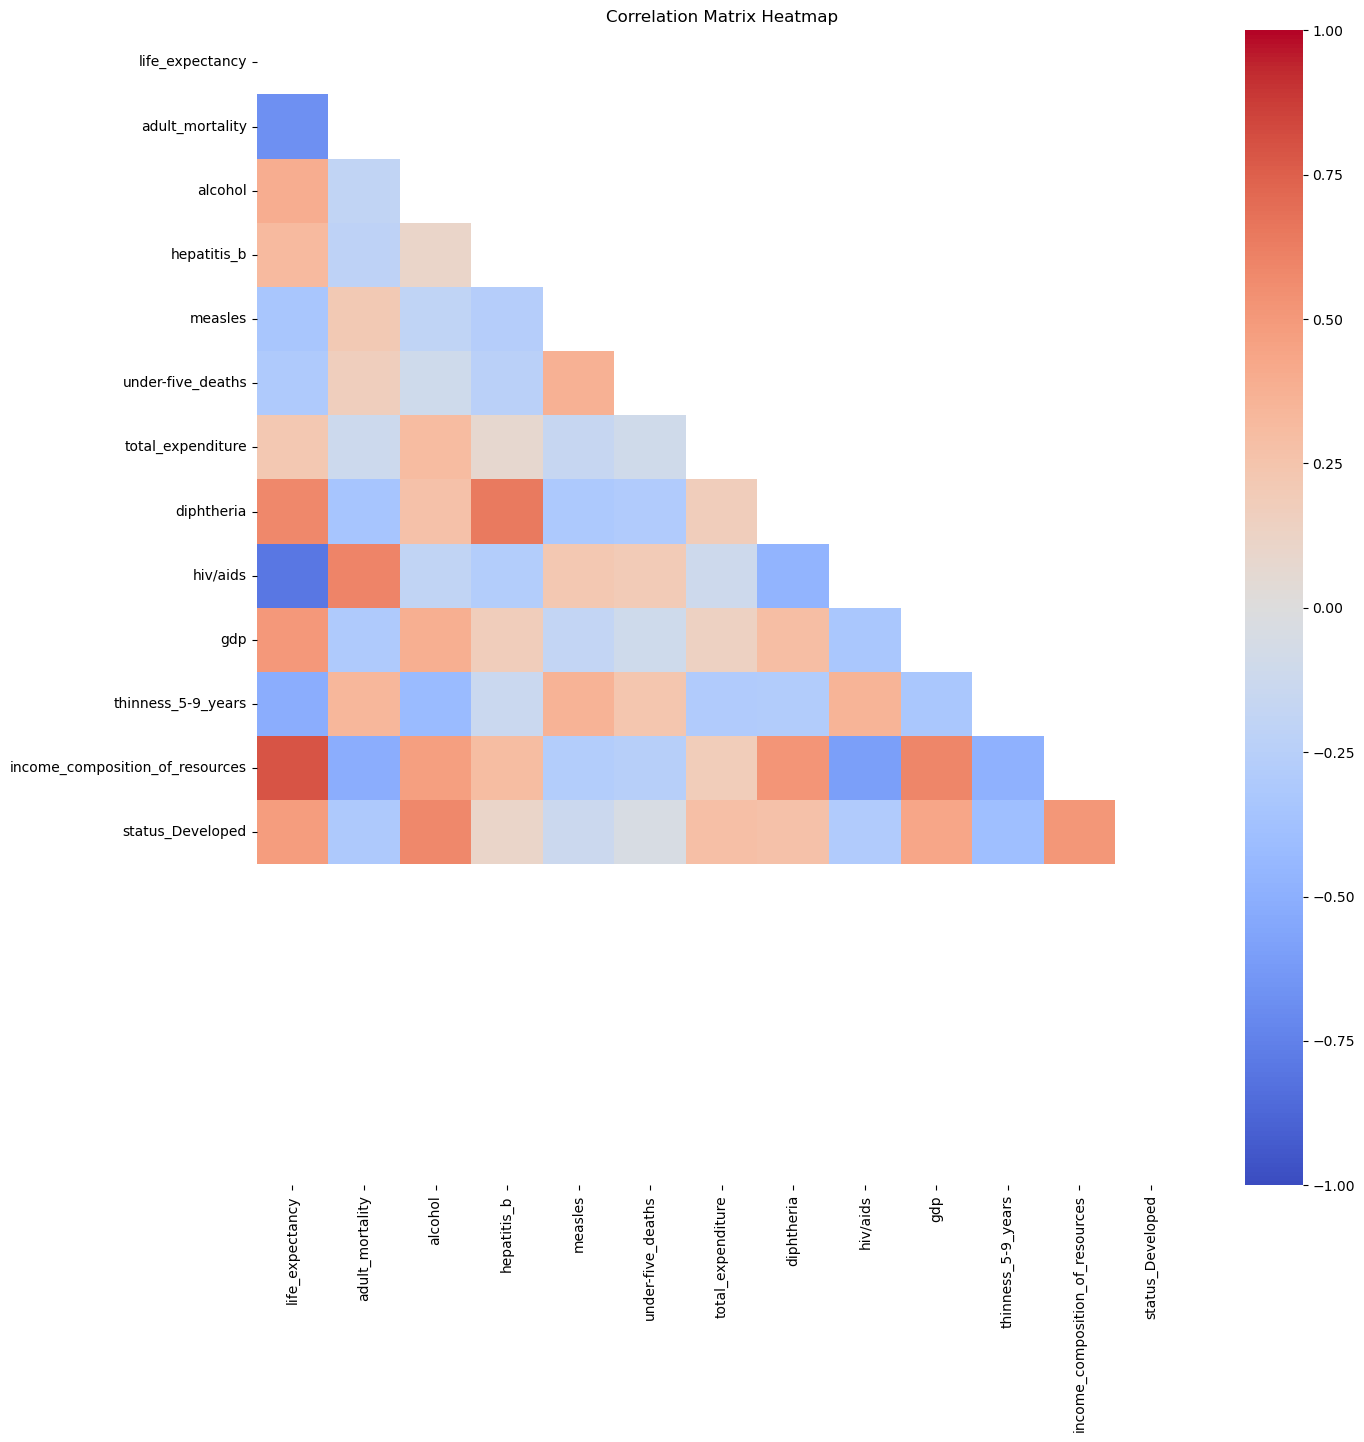

In [76]:
correlation_matrix(df_wins_mean_dummified_removed,False)

Hacemos uso de un pipeline para dejar listos nuestros dataframes que posteriormente utilizaremos para entrenar nuestros modelos

In [77]:
#Hay dos pipelines: imputación con la media e imputación con KNN

from sklearn.pipeline import Pipeline

pipe_mean_rem = Pipeline(steps = [('rename columns',Rename_columns()),
                   ('nullify values',Nullify_variables()),
                   ('remove null values mean',Remove_null_values_mean()),
                   ('winsorize values',Winsorizer(wins_dict,cont_vars)),
                   ('Dummify categorical variables',Dummify()),
                   ('Remove highly correlated features',Remove_highly_correlated_features())])

pipe_knn_rem = Pipeline(steps = [('rename columns',Rename_columns()),
                   ('nullify values',Nullify_variables()),
                   ('remove null values mean',KnnImputer(19)),
                   ('winsorize values',Winsorizer(wins_dict,cont_vars)),
                   ('Dummify categorical variables',Dummify()),
                   ('Remove highly correlated features',Remove_highly_correlated_features())])


df_pipeline_mean_rem = pipe_mean_rem.fit_transform(df)
df_pipeline_knn_rem = pipe_knn_rem.fit_transform(df)


### 4. Protocolos de evaluación

In [78]:
# Con nuestra primera aproximación (imputación con la media)
# Eliminación de variables altamente correlacionadas
# Utilizamos el holdout con un 30% para la prueba y 70% para el entrenamiento
#Tenemos datos imputados por la media, datos imputados por KNN y los de Feature Selection

from sklearn.model_selection import train_test_split

X = dict()
y = dict()
X_train = dict()
y_train = dict()
X_test = dict()
y_test = dict()


X['mean_rem'], y['mean_rem'] = obtain_X_y(df_pipeline_mean_rem)

X_train['mean_rem'], X_test['mean_rem'], y_train['mean_rem'], y_test['mean_rem'] = train_test_split(X['mean_rem'],y['mean_rem'],random_state=1234,test_size=0.3)
print(X_train['mean_rem'].shape)
print(X_test['mean_rem'].shape)
print(y_train['mean_rem'].shape)
print(y_test['mean_rem'].shape)

(2056, 12)
(882, 12)
(2056, 1)
(882, 1)


In [79]:
# Con nuestra segunda aproximación (imputación con knn con k=19)
# Eliminando variables altamente correlacionadas

X['knn_rem'], y['knn_rem'] = obtain_X_y(df_pipeline_knn_rem)

X_train['knn_rem'], X_test['knn_rem'], y_train['knn_rem'], y_test['knn_rem'] = train_test_split(X['knn_rem'],y['knn_rem'],random_state=1234,test_size=0.3)

### 5. Métricas de evaluación

In [80]:
#Este método cálcula las métricas tanto para entrenamiento como para prueba. 


# Implementamos una función que nos permita calcular las métricas de regresión para el conjunto 
# de entrenamiento y de prueba
# R2, R2 Ajustado MAE, MAPE, MSE, RMSE
# El coeficiente de determinación se puede ver como la varianza total explicada por el modelo, 
# es decir la proporción de la varianza en la variable dependiente que se puede predecir a partir de 
# las variables independientes
# Nos retorna el modelo entrenado y un diccionario con las principales métricas sobre el conjunto de
# entrenamiento y el de prueba

from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

def regression_metrics(model,X_train,X_test,y_train,y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    k_train = X_train.shape[1]
    n_train = len(X_train)
    k_test = X_test.shape[1]
    n_test = len(X_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    adj_r2_train = 1-(1-r2_train)*(n_train-1)/(n_train-k_train-1)
    adj_r2_test = 1-(1-r2_test)*(n_test-1)/(n_test-k_test-1)
    metrics = {"Training R^2": r2_train,
               "Test R^2": r2_test,
               "Training Adj R^2": adj_r2_train,
               "Test Adj R^2": adj_r2_test,
               "Training MAE": mean_absolute_error(y_train,y_pred_train),
               "Test MAE": mean_absolute_error(y_test,y_pred_test),
               "Training MAPE": mean_absolute_percentage_error(y_train,y_pred_train),
               "Test MAPE": mean_absolute_percentage_error(y_test,y_pred_test),
               "Training RMSE": np.sqrt(mean_squared_error(y_train, y_pred_train)),
               "Test RMSE": np.sqrt(mean_squared_error(y_test, y_pred_test))    
               }
    for item in metrics.items():
        print(item[0],"=",item[1])
    return model,metrics
    
def r2_metrics(model,X_train,X_test,y_train,y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    k_train = X_train.shape[1]
    n_train = len(X_train)
    k_test = X_test.shape[1]
    n_test = len(X_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    adj_r2_train = 1-(1-r2_train)*(n_train-1)/(n_train-k_train-1)
    adj_r2_test = 1-(1-r2_test)*(n_test-1)/(n_test-k_test-1)
    return r2_train, r2_test, adj_r2_train, adj_r2_test


## 6. Implementación de modelos

### 6.1. Baseline
Como punto de partida para poder comparar cualquier modelo de regresión que pensemos implementar, debemos establecer un baseline. Al estar tratando con una tarea de regresión, hacemos uso de un Dummy regressor con estrategía de la media.

In [81]:
# Establecemos el baseline a partir de un dummy regressor.
#El baseline es el punto de referencia para saber con la implementación de los modelos cómo vamos mejorando.

from sklearn.dummy import DummyRegressor

print('Using a dataframe imputed with the mean and with highly correlated variables removed')
regression_metrics(DummyRegressor(strategy='mean'),X_train['mean_rem'],X_test['mean_rem'],y_train['mean_rem'],y_test['mean_rem'])
print()
print('Using a dataframe imputed with knn and with highly correlated variables removed')
regression_metrics(DummyRegressor(strategy='mean'),X_train['knn_rem'],X_test['knn_rem'],y_train['knn_rem'],y_test['knn_rem'])


Using a dataframe imputed with the mean and with highly correlated variables removed
Training R^2 = 0.0
Test R^2 = -0.002546626945723496
Training Adj R^2 = -0.005873715124816492
Test Adj R^2 = -0.016390769089968282
Training MAE = 7.686621904403313
Test MAE = 7.825350843277924
Training MAPE = 0.11949344614379402
Test MAPE = 0.12330561323780447
Training RMSE = 9.425571212135651
Test RMSE = 9.545149660056946

Using a dataframe imputed with knn and with highly correlated variables removed
Training R^2 = 0.0
Test R^2 = -0.002546626945723496
Training Adj R^2 = -0.005873715124816492
Test Adj R^2 = -0.016390769089968282
Training MAE = 7.686621904403313
Test MAE = 7.825350843277924
Training MAPE = 0.11949344614379402
Test MAPE = 0.12330561323780447
Training RMSE = 9.425571212135651
Test RMSE = 9.545149660056946


(DummyRegressor(),
 {'Training R^2': 0.0,
  'Test R^2': -0.002546626945723496,
  'Training Adj R^2': -0.005873715124816492,
  'Test Adj R^2': -0.016390769089968282,
  'Training MAE': 7.686621904403313,
  'Test MAE': 7.825350843277924,
  'Training MAPE': 0.11949344614379402,
  'Test MAPE': 0.12330561323780447,
  'Training RMSE': 9.425571212135651,
  'Test RMSE': 9.545149660056946})

Por supuesto podemos observar que los resultados no son buenos con este regresor.

### 6.2. Modelo de K vecinos más cercanos
Un algoritmo simple pero bastante útil que nos sirve para resolver tanto tareas de clasificación como de regresión. 

- Es fácil de entender e implementar
- No hace suposiciones sobre la distribución de los datos.


Procederemos utilizando nuestros dataframes resultado de las etapas previas del proceso de analítica de datos.

Iniciamos con el dataframe imputado con la media y en el que eliminamos aquellas variables que se encontraban altamente correlacionadas entre sí (para evitar problemas de multicolinealidad)

In [82]:
# Utilizamos knn
# Con el dataset imputado con la media y eliminando las variables 
# altamente correlacionadas
# Utilizamos el Knn regressor con sus parámetros por defecto

from sklearn.neighbors import KNeighborsRegressor

knnReg = KNeighborsRegressor()
regression_metrics(knnReg,X_train['mean_rem'],X_test['mean_rem'],y_train['mean_rem'],y_test['mean_rem'])

Training R^2 = 0.7943902320854911
Test R^2 = 0.6739203730615935
Training Adj R^2 = 0.7931825388818816
Test Adj R^2 = 0.669417547373146
Training MAE = 2.9400944058174394
Test MAE = 3.8249250957213485
Training MAPE = 0.04503744696666784
Test MAPE = 0.059479561178372505
Training RMSE = 4.273951114497777
Test RMSE = 5.443676202021169


(KNeighborsRegressor(),
 {'Training R^2': 0.7943902320854911,
  'Test R^2': 0.6739203730615935,
  'Training Adj R^2': 0.7931825388818816,
  'Test Adj R^2': 0.669417547373146,
  'Training MAE': 2.9400944058174394,
  'Test MAE': 3.8249250957213485,
  'Training MAPE': 0.04503744696666784,
  'Test MAPE': 0.059479561178372505,
  'Training RMSE': 4.273951114497777,
  'Test RMSE': 5.443676202021169})

Observamos que knn no nos brinda un tan buen resultado. Evidentemente no es porque este sea un mal modelo, el problema es que este modelo se basa en distancias y si las escalas de las variables son diferentes, las decisiones del modelo estarán inapropiadamente dominadas por aquellas con mayor escala.

Por ello podemos normalizar o estandarizar los datos y verificar los resultados nuevamente.

Se debe tener en cuenta las diferencias en los procesos de escalamiento:
- Normalizar: las observaciones se cambian y reescalan de manera que terminen en un rango entre 0 y 1. También se le conoce como escalamiento min-max X_new = (X_ — X_min)/(X_max — X_min). No maneja muy bien los datos atípicos
- Estandarizar: es el proceso de poner distintas variables en la misma escala. Para cada observación de la variable se le substrae la media y se divide por la desviación estándar. La estandarización asume que los datos siguen una distribución normal. En este caso el resultado tienen sentido pues estamos utilizando un modelo no paramétrico, no lineal

In [83]:

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline

print('Stadardization')
knnReg_st = make_pipeline(StandardScaler(),KNeighborsRegressor())
regression_metrics(knnReg_st,X_train['mean_rem'],X_test['mean_rem'],y_train['mean_rem'],y_test['mean_rem'])
print()
print('Normalization')
knnReg_norm = make_pipeline(MinMaxScaler(),KNeighborsRegressor())
regression_metrics(knnReg_norm,X_train['mean_rem'],X_test['mean_rem'],y_train['mean_rem'],y_test['mean_rem'])

Stadardization
Training R^2 = 0.9416424412586438
Test R^2 = 0.891832561434606
Training Adj R^2 = 0.9412996655832173
Test Adj R^2 = 0.8903388798893992
Training MAE = 1.5693921030809463
Test MAE = 2.143547451767592
Training MAPE = 0.023863612001570007
Test MAPE = 0.03309800530100051
Training RMSE = 2.2769643808583298
Test RMSE = 3.1352972742582654

Normalization
Training R^2 = 0.9364643976410403
Test R^2 = 0.8858581285212842
Training Adj R^2 = 0.9360912076125001
Test Adj R^2 = 0.8842819461763537
Training MAE = 1.6406450532627417
Test MAE = 2.2369016021709225
Training MAPE = 0.024925630610894894
Test MAPE = 0.03455335286312453
Training RMSE = 2.3758348844180146
Test RMSE = 3.2207198251265385


(Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                 ('kneighborsregressor', KNeighborsRegressor())]),
 {'Training R^2': 0.9364643976410403,
  'Test R^2': 0.8858581285212842,
  'Training Adj R^2': 0.9360912076125001,
  'Test Adj R^2': 0.8842819461763537,
  'Training MAE': 1.6406450532627417,
  'Test MAE': 2.2369016021709225,
  'Training MAPE': 0.024925630610894894,
  'Test MAPE': 0.03455335286312453,
  'Training RMSE': 2.3758348844180146,
  'Test RMSE': 3.2207198251265385})

Analizando los resultados podemos observar que en ambos casos, al utilizar procesos de escalamiento, se mejoran los resultados.

Ahora buscamos el mejor valor de k (único hiperparámetro de este modelo)

In [84]:
# Podemos encontrar el mejor k para nuestro modelo
# Utilizamos un pipeline para incluir la estandarización y el regresor knn 
#Se hace a través de heurísticas o de forma gráfica, debido a que el único hiperparametro es K 

for k in range(1,21,2):
    print('Results for k =',k)
    knnReg_st = make_pipeline(StandardScaler(),KNeighborsRegressor(n_neighbors=k))
    regression_metrics(knnReg_st,X_train['mean_rem'],X_test['mean_rem'],y_train['mean_rem'],y_test['mean_rem'])
    print()


Results for k = 1
Training R^2 = 1.0
Test R^2 = 0.8702050070251367
Training Adj R^2 = 1.0
Test Adj R^2 = 0.8684126711037347
Training MAE = 0.0
Test MAE = 2.038126835433627
Training MAPE = 0.0
Test MAPE = 0.031422117750712165
Training RMSE = 0.0
Test RMSE = 3.4344675843773667

Results for k = 3
Training R^2 = 0.9587243014857947
Test R^2 = 0.8907291079049308
Training Adj R^2 = 0.9584818597911444
Test Adj R^2 = 0.8892201887965984
Training MAE = 1.2316549190959156
Test MAE = 2.085178989628638
Training MAPE = 0.01857355061116389
Test MAPE = 0.03216270249975784
Training RMSE = 1.9149387822165735
Test RMSE = 3.151248822732018

Results for k = 5
Training R^2 = 0.9416424412586438
Test R^2 = 0.891832561434606
Training Adj R^2 = 0.9412996655832173
Test Adj R^2 = 0.8903388798893992
Training MAE = 1.5693921030809463
Test MAE = 2.143547451767592
Training MAPE = 0.023863612001570007
Test MAPE = 0.03309800530100051
Training RMSE = 2.2769643808583298
Test RMSE = 3.1352972742582654

Results for k = 7
Tr

(0.8957301790708759, 9)


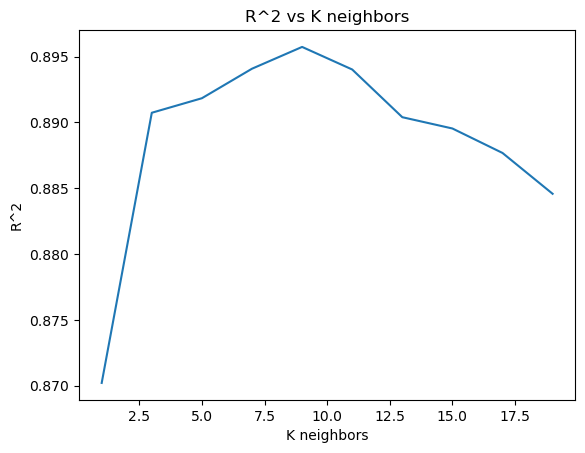

In [85]:
# Visualizamos el R^2

results = [r2_metrics(make_pipeline(StandardScaler(),KNeighborsRegressor(n_neighbors=i)),
            X_train['mean_rem'],X_test['mean_rem'],y_train['mean_rem'],y_test['mean_rem'])[1] for i in range(1,21,2)]
ax = sns.lineplot(x=range(1,21,2),
             y=results)
ax.set(title="R^2 vs K neighbors",ylabel='R^2',xlabel='K neighbors')
kvals = [(col,i) for col,i in zip(results,range(1,21,2))]

print(sorted(kvals, key=lambda x: x[0],reverse=True)[0])

Modelo de K vecinos más cercanos con k=9, datos imputados con la media y eliminando variables altamente correlacionadas.

Hacemos uso de pickle para guardar tanto el modelo ya entrenado como el resultado de las métricas de manera que al finalizar podamos comparar entre todos los modelos implementados y elegir el que presente mejores resultados en cuanto a las métricas más importantes sobre tareas de regresión

In [87]:
#Recuerde que el Regression Metrics guarda el modelo y las métricas

import pickle
# Guardamos el mejor modelo utilizando k=9 con todas las variables independientes e imputación con la media

model,metrics = regression_metrics(make_pipeline(StandardScaler(),KNeighborsRegressor(n_neighbors=9)),
                                   X_train['mean_rem'],X_test['mean_rem'],y_train['mean_rem'],y_test['mean_rem'])
pickle.dump(model, open('models/KnnRegressorImpMeanRem.pkl','wb')) #Modelo lo va a guardar en esta carpeta
pickle.dump(metrics, open('metrics/KnnRegressorImpMeanRemMetrics.pkl','wb')) #Modelo lo va a gurdar en una carpeta

Training R^2 = 0.9229173368512068
Test R^2 = 0.8957301790708759
Training Adj R^2 = 0.9224645752468086
Test Adj R^2 = 0.8942903196334197
Training MAE = 1.8877252060697554
Test MAE = 2.2418821687752213
Training MAPE = 0.028855173725575316
Test MAPE = 0.03457743076562025
Training RMSE = 2.616893414955947
Test RMSE = 3.078291661658348


### Selección de características

Aunque previamente, en la etapa de ingeniería de características habíamos creado nuevas variables y eliminado otras, en esta etapa verificaremos la importancia de las variables independientes con respecto a la objetivo utilizando distintos métodos. 

Esto con el fin de hallar el mejor grupo de variables que sirvan como insumo para nuestros modelos.

In [88]:
# Utilizamos un método para extracción recursiva de características utilizando validación cruzada
# Con este método obtenemos las variables independientes más importantes dentro del dataframe 
#Modelo de random forest con 100 arboles y 5 cross validation (feature selection)

from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestRegressor

estimator = RandomForestRegressor(n_estimators=100)
selector = RFECV(estimator, step=1, cv=5)
selector = selector.fit(X_train['mean_rem'], y_train['mean_rem'])
 
print("Ranking de características", selector.ranking_)

Ranking de características [1 1 4 1 1 1 2 1 3 1 1 5]


Utilizamos el método SelectKBest que nos permite seleccionar las  K mejores características utilizando como función de puntaje el f-regression.

El f-regression realiza una prueba estadística F entre cada característica y el target en un problema de regresión. (las independientes están influenciando a la variable objetivo) 

Calcula la relación entre cada característica independiente y la variable dependiente.

La prueba F compara el modelo de regresión que incluye una característica con un modelo que no la incluye.

Devuelve dos valores: la estadística F y el valor p correspondiente para cada característica. Un valor más alto de la estadística F indica una relación más fuerte entre la característica y la variable objetivo. Un valor p bajo indica que es poco probable que la característica no tenga una relación con la variable objetivo, es decir, la característica es relevante.

Graficamos con respecto al R^2 para observar cuál es el número de variables a seleccionar que nos presentan un mejor resultado.

Iteramos de 1 al número máximo de variables (en este caso 12)

(0.9213449448899993, 5)


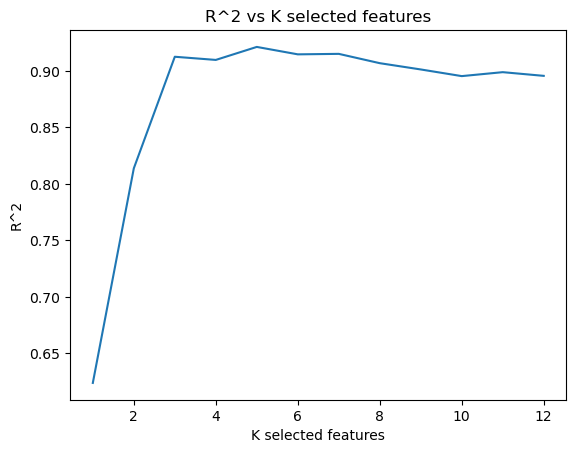

In [89]:
#FEATURE SELECTION


from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

results = [r2_metrics(make_pipeline(SelectKBest(score_func=f_regression, k=i),
                                                 StandardScaler(), #Estandarizo
                                                 KNeighborsRegressor(n_neighbors=9)), #Entreno el modelo con 9 vecinos
            X_train['mean_rem'],X_test['mean_rem'],y_train['mean_rem'],y_test['mean_rem'])[1] for i in range(1,13)]
ax = sns.lineplot(x=range(1,13),
             y=results)
ax.set(title="R^2 vs K selected features",ylabel='R^2',xlabel='K selected features')
kvals = [(col,i) for col,i in zip(results,range(1,13))]

print(sorted(kvals, key=lambda x: x[0],reverse=True)[0])

#EL número optimo de variables es 5, porque refleja el mayor R2. (Recuerdo, ya hemos eliminado las variables que no aportan, aquí después de eso, estamos seleccionando las mejores)

Guardamos el mejor modelo y sus métricas. (Haremos un paso adicional con k igual a 5). Acá mejora el R2 que habíamos encontrado antes.

In [90]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
# Guardamos el mejor modelo utilizando k=9 con feature selection (con 5 elegidas), 
# imputación con la media y eliminación de variables altamente correlacionadas

model,metrics = regression_metrics(make_pipeline(SelectKBest(score_func=f_regression, k=5),
                                                 StandardScaler(),
                                                 KNeighborsRegressor(n_neighbors=9)),
                                   X_train['mean_rem'],X_test['mean_rem'],y_train['mean_rem'],y_test['mean_rem'])
pickle.dump(model, open('models/KnnRegressorFSImpMeanRem.pkl','wb'))
pickle.dump(metrics, open('metrics/KnnRegressorFSImpMeanRemMetrics.pkl','wb'))

Training R^2 = 0.9430914342459045
Test R^2 = 0.9213449448899993
Training Adj R^2 = 0.942757169542503
Test Adj R^2 = 0.9202587991347404
Training MAE = 1.5497538857349404
Test MAE = 1.885848109735698
Training MAPE = 0.023500333797751714
Test MAPE = 0.028949247184399
Training RMSE = 2.2485186760916513
Test RMSE = 2.673583620762382


Ahora trabajamos con el segundo dataframe, en el que los datos se imputaron con knn con k=19 y se eliminaron las variables altamente correlacionadas entre sí

In [91]:
# Podemos encontrar el mejor k para nuestro modelo
# Utilizamos un pipeline para incluir la estandarización y el regresor knn 

for k in range(1,21,2):
    print('Results for k =',k)
    knnReg_st = make_pipeline(StandardScaler(),KNeighborsRegressor(n_neighbors=k))
    regression_metrics(knnReg_st,X_train['knn_rem'],X_test['knn_rem'],y_train['knn_rem'],y_test['knn_rem'])
    print()

Results for k = 1
Training R^2 = 1.0
Test R^2 = 0.86518422362869
Training Adj R^2 = 1.0
Test Adj R^2 = 0.8633225558306972
Training MAE = 0.0
Test MAE = 2.183179063975317
Training MAPE = 0.0
Test MAPE = 0.03368915042530166
Training RMSE = 0.0
Test RMSE = 3.5002640748375695

Results for k = 3
Training R^2 = 0.9495080392699924
Test R^2 = 0.8791565856011059
Training Adj R^2 = 0.949211463876571
Test Adj R^2 = 0.8774878618119382
Training MAE = 1.4129039888584127
Test MAE = 2.2918441693617337
Training MAPE = 0.021334920216210737
Test MAPE = 0.03543886406968164
Training RMSE = 2.117965087093582
Test RMSE = 3.3139194340367677

Results for k = 5
Training R^2 = 0.9319310322649325
Test R^2 = 0.8825824372406459
Training Adj R^2 = 0.9315312145396164
Test Adj R^2 = 0.8809610209539804
Training MAE = 1.7470777253301013
Test MAE = 2.33121817032824
Training MAPE = 0.026606574649390813
Test MAPE = 0.03596306372984171
Training RMSE = 2.4591343785030917
Test RMSE = 3.2666077103627273

Results for k = 7
Trai

(0.8868018527504221, 7)


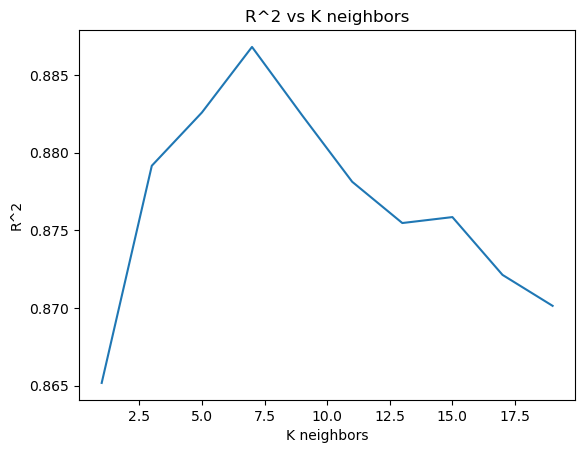

In [92]:
# Visualizamos el R^2 (para ver cuál es la mejor cantidad de vecinos)

results = [r2_metrics(make_pipeline(StandardScaler(),KNeighborsRegressor(n_neighbors=i)),
            X_train['knn_rem'],X_test['knn_rem'],y_train['knn_rem'],y_test['knn_rem'])[1] for i in range(1,21,2)]
ax = sns.lineplot(x=range(1,21,2),
             y=results)
ax.set(title="R^2 vs K neighbors",ylabel='R^2',xlabel='K neighbors')
kvals = [(col,i) for col,i in zip(results,range(1,21,2))]

print(sorted(kvals, key=lambda x: x[0],reverse=True)[0])

In [93]:
model,metrics = regression_metrics(make_pipeline(StandardScaler(),KNeighborsRegressor(n_neighbors=7)),
                                   X_train['knn_rem'],X_test['knn_rem'],y_train['knn_rem'],y_test['knn_rem'])
pickle.dump(model, open('models/KnnRegressorImpKnnRem.pkl','wb'))
pickle.dump(metrics, open('metrics/KnnRegressorImpKnnRemMetrics.pkl','wb'))

Training R^2 = 0.9180385868973758
Test R^2 = 0.8868018527504221
Training Adj R^2 = 0.9175571689055836
Test Adj R^2 = 0.885238702270566
Training MAE = 1.9445386325736518
Test MAE = 2.3440421758086525
Training MAPE = 0.029631949363253085
Test MAPE = 0.036101654498928715
Training RMSE = 2.6984377120199436
Test RMSE = 3.20737774485352


In [94]:
estimator = RandomForestRegressor(n_estimators=100)
selector = RFECV(estimator, step=1, cv=5)
selector = selector.fit(X_train['knn_rem'], y_train['knn_rem'])
 
print("Ranking de características", selector.ranking_)

Ranking de características [1 1 6 2 1 3 4 1 5 1 1 7]


(0.9245879728407468, 5)


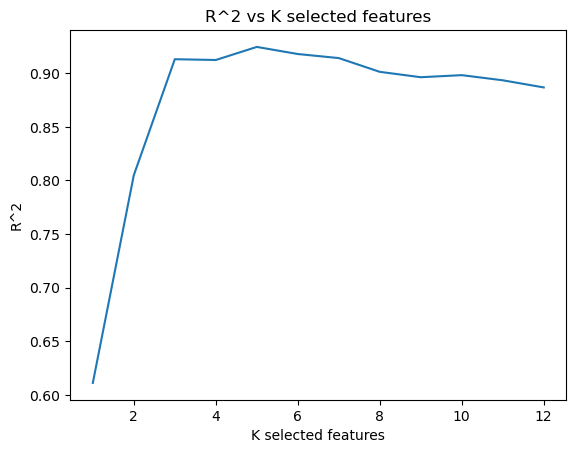

In [95]:
#Select k best (mejores features) con el número de vecinos óptimo

results = [r2_metrics(make_pipeline(SelectKBest(score_func=f_regression, k=i),
                                                 StandardScaler(),
                                                 KNeighborsRegressor(n_neighbors=7)),
            X_train['knn_rem'],X_test['knn_rem'],y_train['knn_rem'],y_test['knn_rem'])[1] for i in range(1,13)]
ax = sns.lineplot(x=range(1,13),
             y=results)
ax.set(title="R^2 vs K selected features",ylabel='R^2',xlabel='K selected features')
kvals = [(col,i) for col,i in zip(results,range(1,13))]

print(sorted(kvals, key=lambda x: x[0],reverse=True)[0])

Modelo de K vecinos más cercanos con k=5, feature selection y datos imputados con knn

In [96]:
# Guardamos el mejor modelo utilizando k=7 con feature selection (con 5 elegidas), 
# imputación con knn y eliminación de variables altamente correlacionadas

model,metrics = regression_metrics(make_pipeline(SelectKBest(score_func=f_regression, k=5),
                                                 StandardScaler(),
                                                 KNeighborsRegressor(n_neighbors=7)),
                                   X_train['knn_rem'],X_test['knn_rem'],y_train['knn_rem'],y_test['knn_rem'])
pickle.dump(model, open('models/KnnRegressorFSImpKnnRem.pkl','wb'))
pickle.dump(metrics, open('metrics/KnnRegressorFSImpKnnRemMetrics.pkl','wb'))

Training R^2 = 0.949793744505733
Test R^2 = 0.9245879728407468
Training Adj R^2 = 0.9494988472634759
Test Adj R^2 = 0.9235466099800896
Training MAE = 1.4309934253091428
Test MAE = 1.7971076486800808
Training MAPE = 0.021685065750051396
Test MAPE = 0.02770006937464407
Training RMSE = 2.111964407633229
Test RMSE = 2.617886175622423


### 6.3. Modelo de árbol de regresión

Training R^2 = 1.0
Test R^2 = 0.9135829234030575
Training Adj R^2 = 1.0
Test Adj R^2 = 0.9123895920806601
Training MAE = 2.4191630108563723e-17
Test MAE = 1.7896007583361213
Training MAPE = 5.305182041351693e-19
Test MAPE = 0.027239201752891178
Training RMSE = 4.1459844476113603e-16
Test RMSE = 2.8024007292633972


[Text(0.5, 0.9, 'x[7] <= 0.65\nsquared_error = 88.841\nsamples = 2056\nvalue = 69.393'),
 Text(0.25, 0.7, 'x[10] <= 0.796\nsquared_error = 35.438\nsamples = 1543\nvalue = 73.488'),
 Text(0.125, 0.5, 'x[0] <= 205.0\nsquared_error = 23.589\nsamples = 1151\nvalue = 71.274'),
 Text(0.0625, 0.3, 'x[10] <= 0.632\nsquared_error = 13.837\nsamples = 940\nvalue = 72.754'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'x[10] <= 0.537\nsquared_error = 13.763\nsamples = 211\nvalue = 64.678'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'x[10] <= 0.843\nsquared_error = 13.582\nsamples = 392\nvalue = 79.988'),
 Text(0.3125, 0.3, 'x[9] <= 0.85\nsquared_error = 7.414\nsamples = 141\nvalue = 76.884'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.3, 'x[0] <= 76.5\nsquared_error = 8.593\nsamples = 251\nvalue = 81.732'),
 Text(0.40625, 0.1, '\n  (...)  \n'),
 Te

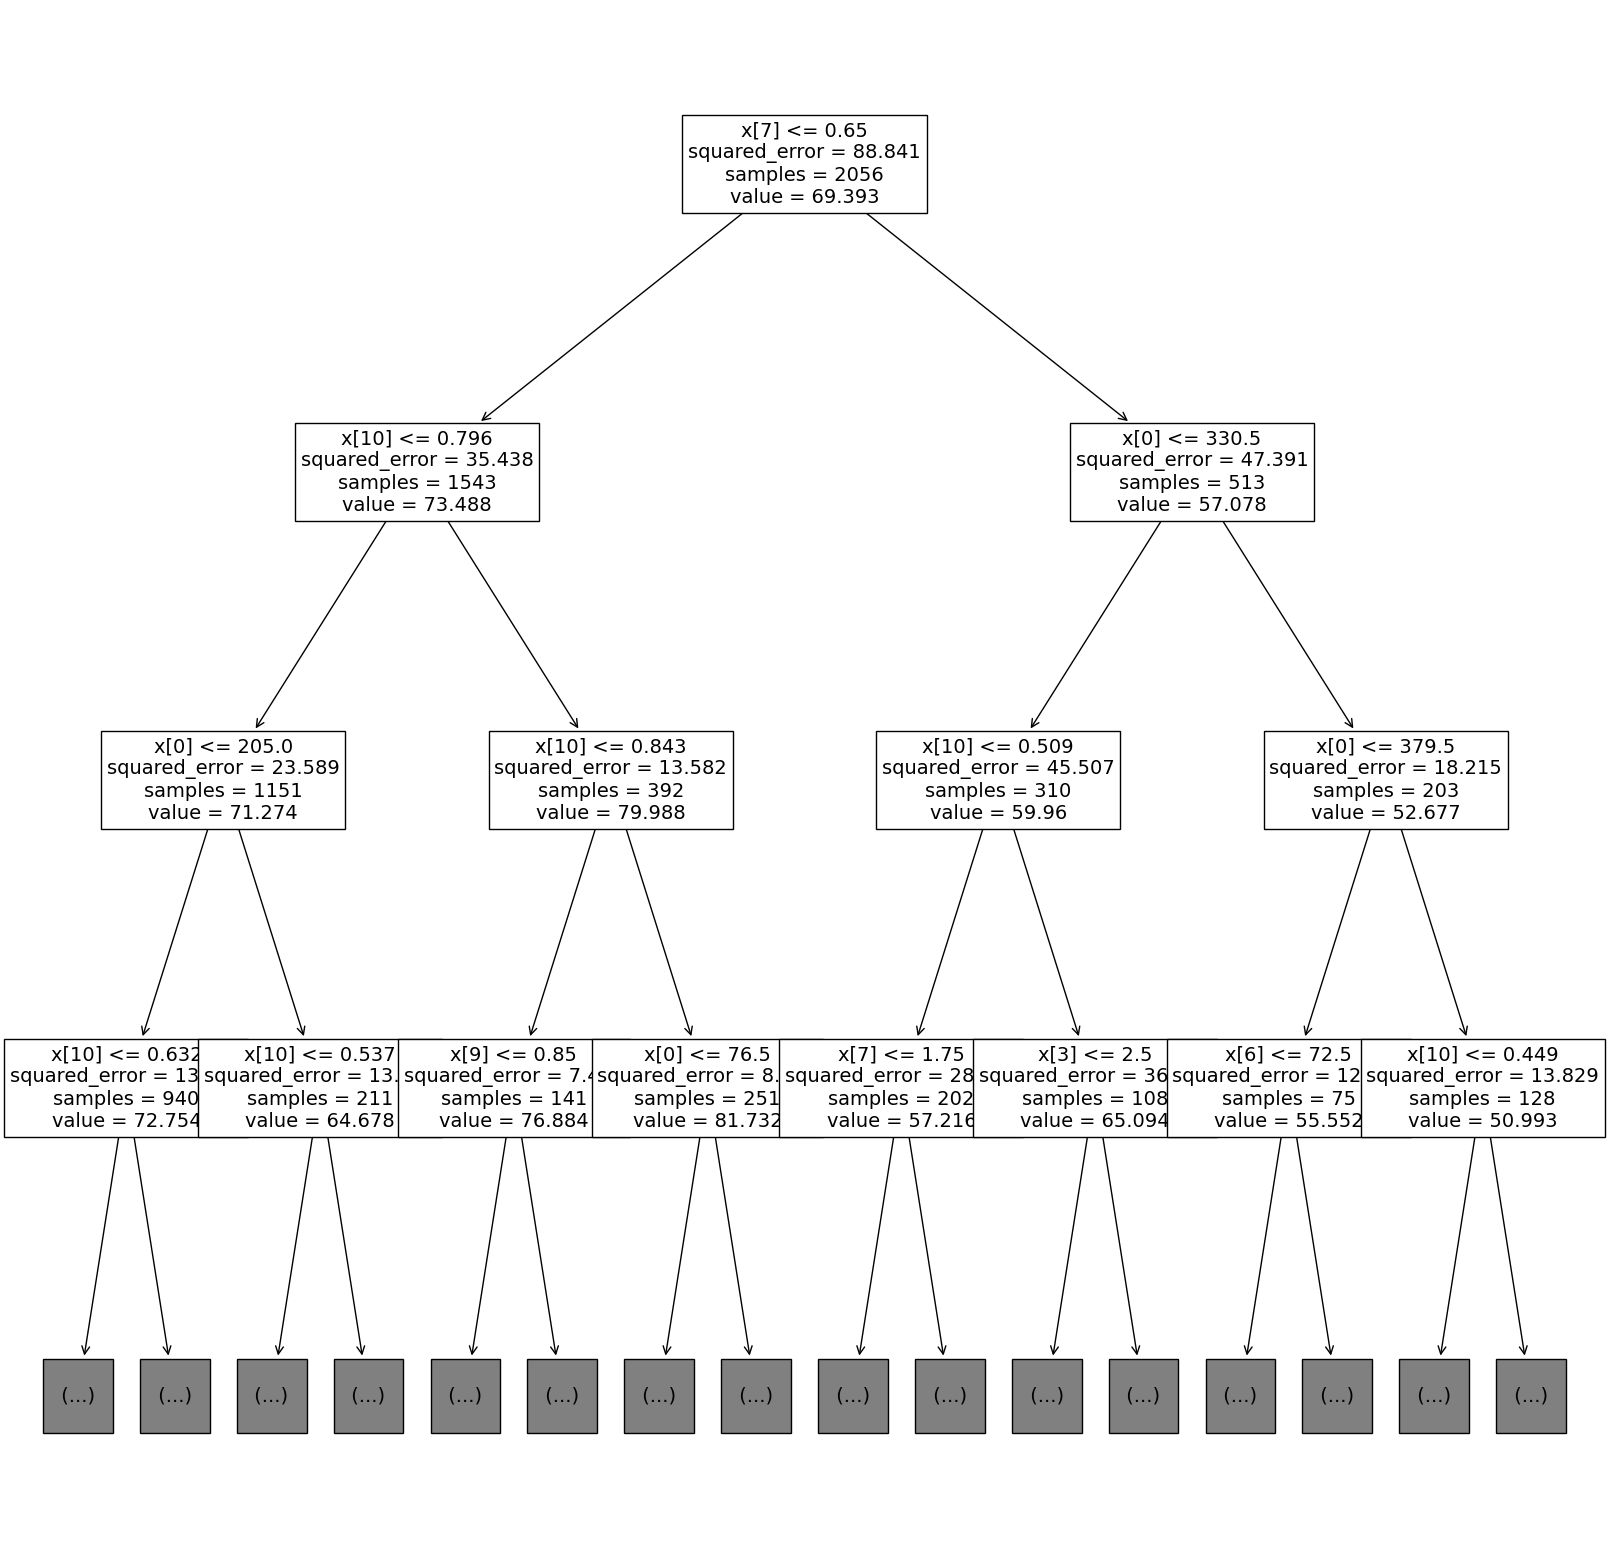

In [97]:
# Utilizamos un árbol de regresión
# Verificamos sus métricas

from sklearn.tree import DecisionTreeRegressor, plot_tree

regression_metrics(DecisionTreeRegressor(random_state=1234),X_train['mean_rem'],X_test['mean_rem'],y_train['mean_rem'],y_test['mean_rem'])

tree_reg = DecisionTreeRegressor(random_state=1234).fit(X_train['mean_rem'],y_train['mean_rem'])

# Diagramamos los primeros tres niveles del árbol resultante

plt.figure(figsize=(20,20))
plot_tree(tree_reg,filled=False,fontsize=14,max_depth=3)


Búsqueda del mejor modelo para árbol de decisión con GridSearchCV
- Conjunto de datos imputados con la media y variables altamente correlacionadas entre sí eliminadas

In [98]:
# Vamos a realizar un ajuste de hiperparámetros para encontrar el mejor modelo de árbol de regresión
# Establecemos la grilla de parámetros que verificar
# Haciendo uso de estos parámetros y una validación cruzada de 3 doblajes buscamos el mejor modelo
# Tiempo de ejecución aprox: 12s

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11],
           "min_samples_leaf":[1,2,3,4,],
           "max_leaf_nodes":[None,10,20,30] } #Solo se usaron 4 hiperparametros y pocos valores por temas de tiempo

from sklearn.model_selection import GridSearchCV

tuning_model=GridSearchCV(DecisionTreeRegressor(random_state=1234),param_grid=parameters,scoring='r2',cv=3,verbose=3)

tuning_model.fit(X_train['mean_rem'],y_train['mean_rem'])

Fitting 3 folds for each of 192 candidates, totalling 576 fits
[CV 1/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=0.527 total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=0.577 total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=0.565 total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=0.532 total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=0.529 total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=0.526 total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=2, splitter=best;, score=0.527 total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=2, splitter=best;, score=0.577 total time=   0.0s
[CV 3/3] END max_de

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=1234),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11],
                         'max_leaf_nodes': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'splitter': ['best', 'random']},
             scoring='r2', verbose=3)

In [99]:
# Los híperparámetros del mejor modelo

tuning_model.best_params_

{'max_depth': 9,
 'max_leaf_nodes': None,
 'min_samples_leaf': 4,
 'splitter': 'best'}

In [100]:
# El R^2 del mejor modelo

tuning_model.best_score_

0.9115668042547725

Modelo de árbol de regresión con datos imputados con la media y variables altamente correlacionadas entre sí eliminadas

In [101]:
# El mejor modelo de árbol de regresión
# Con todas datos imputados con la media y eliminación de variables altamente correlacionadas

tree_reg = DecisionTreeRegressor(random_state=1234,max_depth=9,
                                         max_leaf_nodes=None,
                                         min_samples_leaf=4,
                                         splitter='best')

model,metrics = regression_metrics(tree_reg,X_train['mean_rem'],X_test['mean_rem'],y_train['mean_rem'],y_test['mean_rem'])
pickle.dump(model, open('models/DecissionTreeRegressorImpMeanrem.pkl','wb'))
pickle.dump(metrics, open('metrics/DecisionTreeRegressorImpMeanRemMetrics.pkl','wb'))


Training R^2 = 0.9712325404396553
Test R^2 = 0.9178548596443067
Training Adj R^2 = 0.9710635685773332
Test Adj R^2 = 0.9167205193862303
Training MAE = 1.120828878220059
Test MAE = 1.8881860186009105
Training MAPE = 0.01650646641452081
Test MAPE = 0.028552502411945162
Training RMSE = 1.5986685619802252
Test RMSE = 2.732256010985188


[Text(0.5, 0.9, 'x[7] <= 0.65\nsquared_error = 88.841\nsamples = 2056\nvalue = 69.393'),
 Text(0.25, 0.7, 'x[10] <= 0.796\nsquared_error = 35.438\nsamples = 1543\nvalue = 73.488'),
 Text(0.125, 0.5, 'x[0] <= 205.0\nsquared_error = 23.589\nsamples = 1151\nvalue = 71.274'),
 Text(0.0625, 0.3, 'x[10] <= 0.632\nsquared_error = 13.837\nsamples = 940\nvalue = 72.754'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'x[10] <= 0.537\nsquared_error = 13.763\nsamples = 211\nvalue = 64.678'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'x[10] <= 0.843\nsquared_error = 13.582\nsamples = 392\nvalue = 79.988'),
 Text(0.3125, 0.3, 'x[9] <= 0.85\nsquared_error = 7.414\nsamples = 141\nvalue = 76.884'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.3, 'x[0] <= 76.5\nsquared_error = 8.593\nsamples = 251\nvalue = 81.732'),
 Text(0.40625, 0.1, '\n  (...)  \n'),
 Te

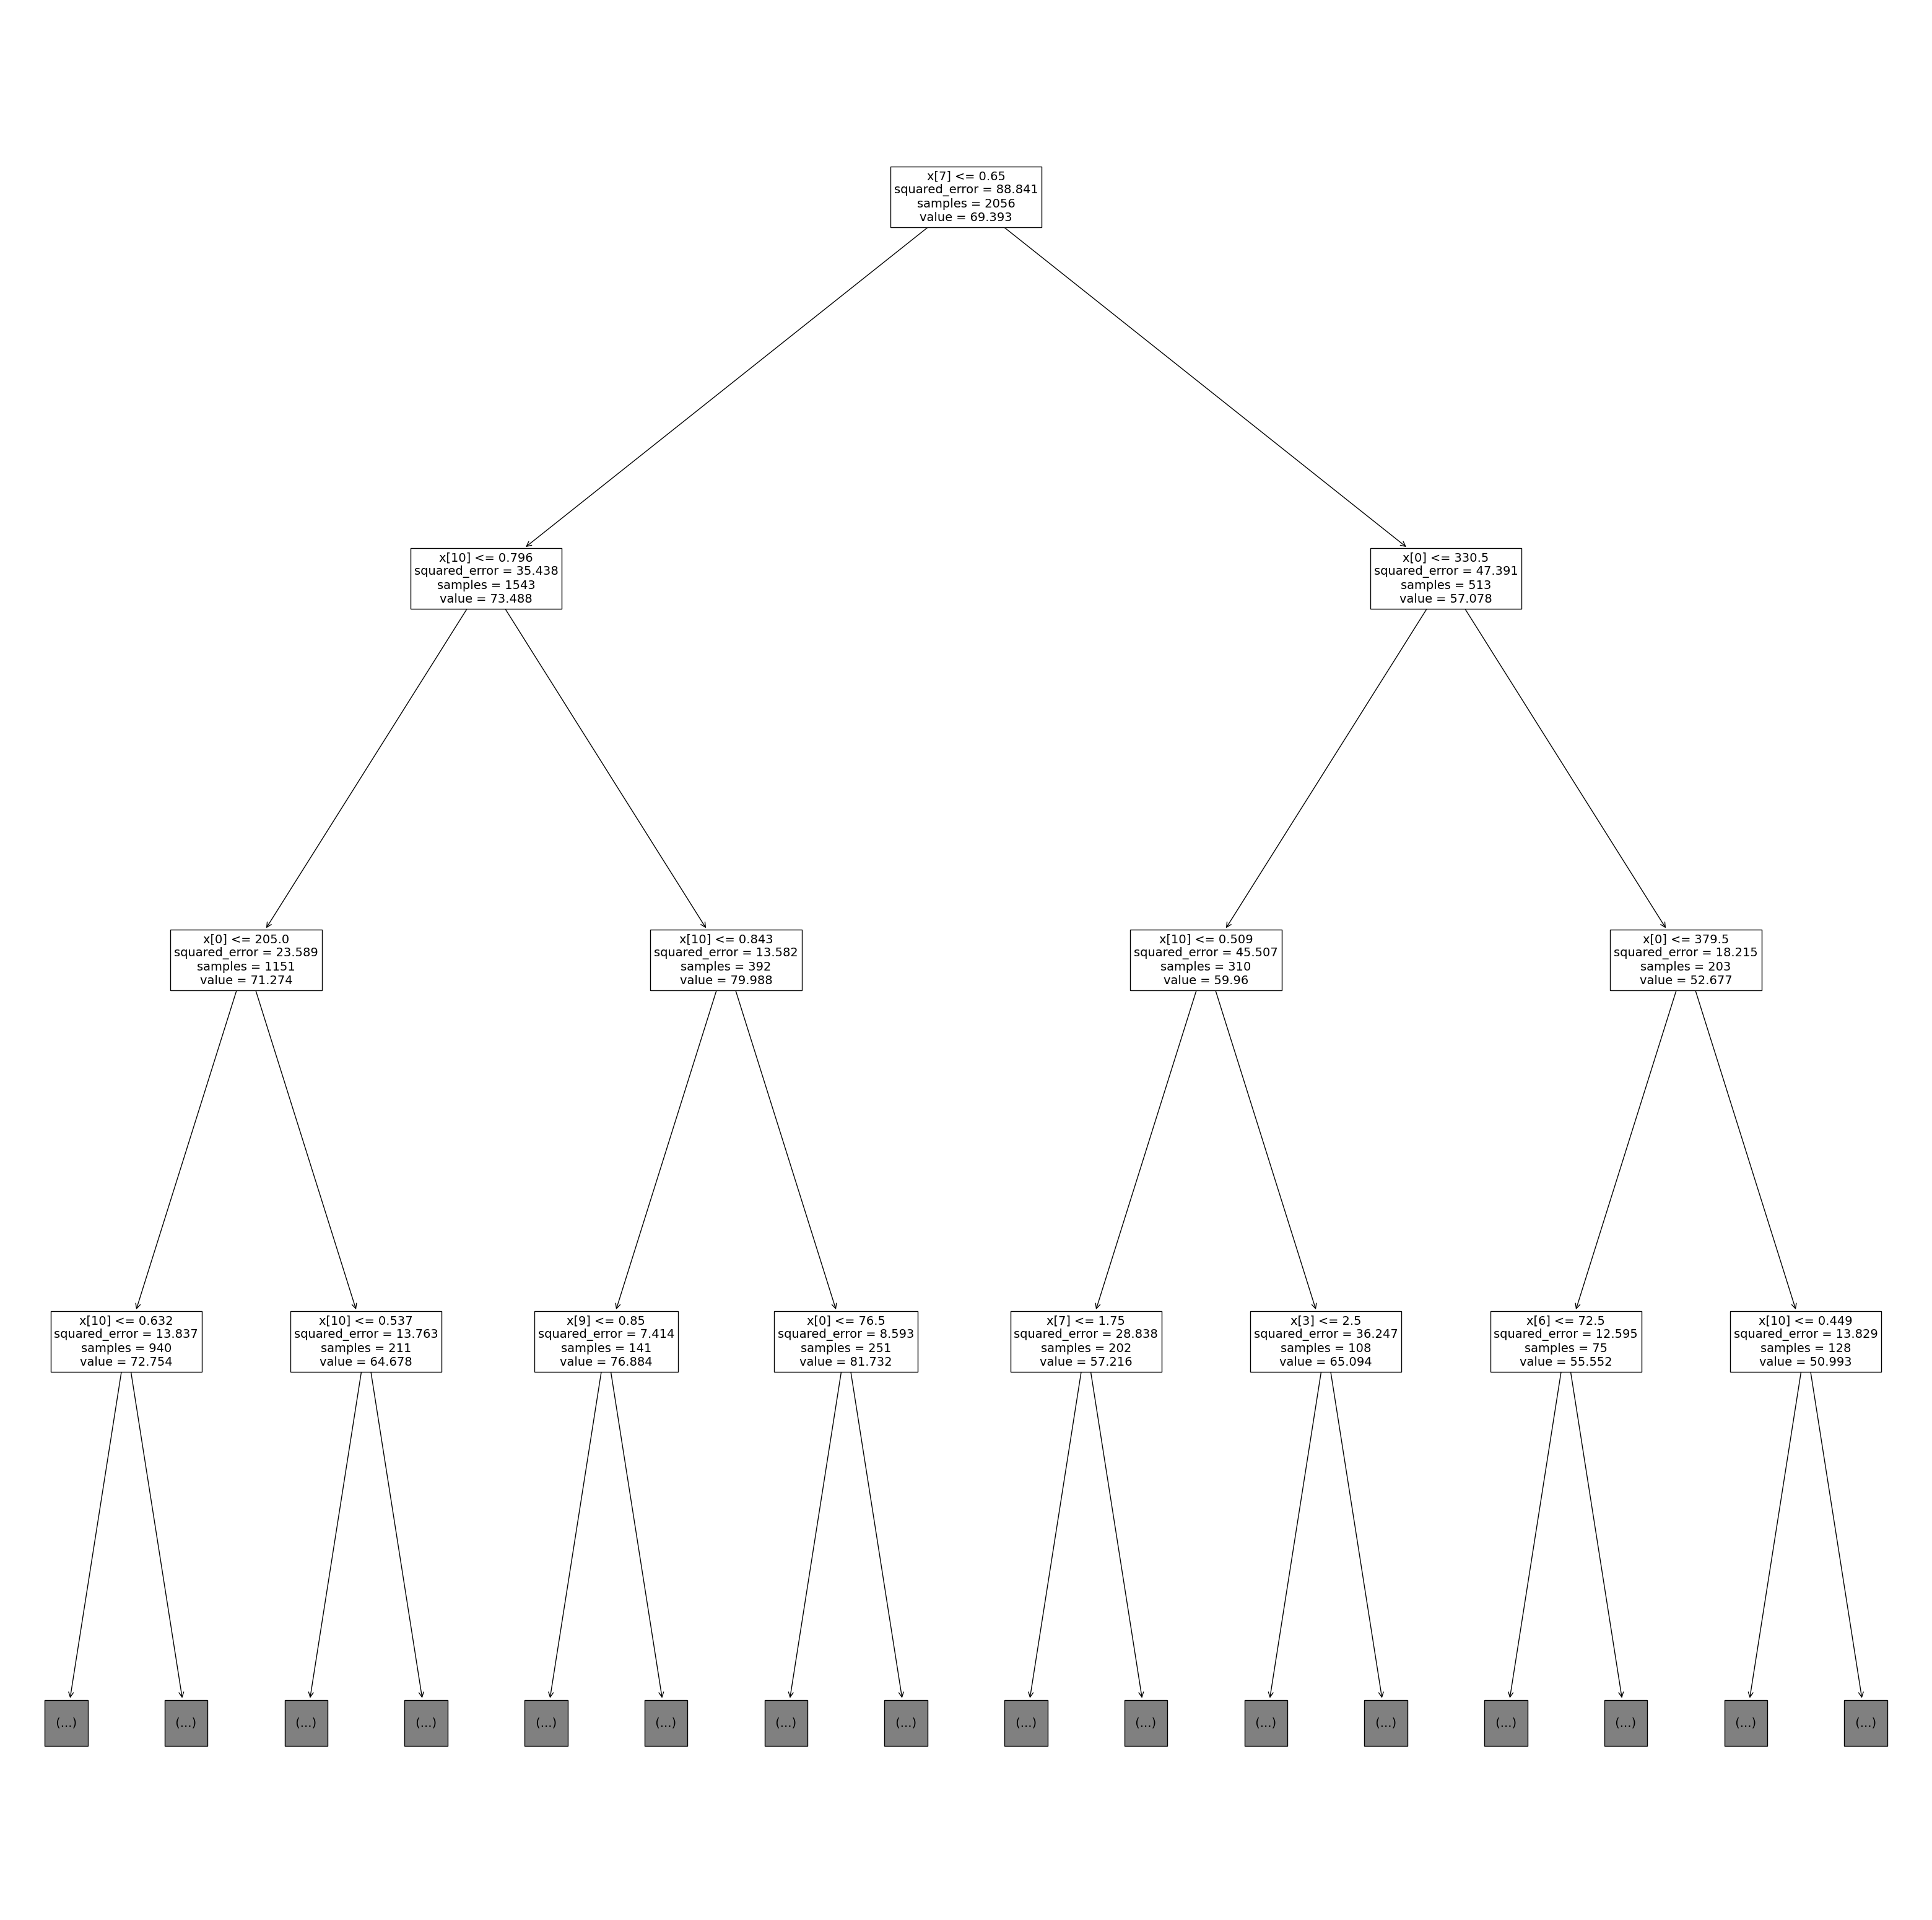

In [102]:
# La visualización del mejor árbol

tree_reg.fit(X_train['mean_rem'],y_train['mean_rem'])
plt.figure(figsize=(40,40))
plot_tree(tree_reg,filled=False,fontsize=14,max_depth=3)


#NOTA PROFESOR: se pueden utilizar las características que particiona el árbol para hacer una especie de feature importance

Búsqueda del mejor modelo para árbol de decisión con GridSearchCV
- Conjunto de datos con feature selection, datos imputados con la media y eliminación de variables altamente correlacionadas entre sí

In [103]:
# Tiempo de ejecución aprox: 10s

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11],
           "min_samples_leaf":[1,2,3,4,],
           "max_leaf_nodes":[None,10,20,30] }

from sklearn.model_selection import GridSearchCV

X_t = SelectKBest(score_func=f_regression, k=5).fit_transform(X_train['mean_rem'],y_train['mean_rem'])                                 

tuning_model=GridSearchCV(DecisionTreeRegressor(random_state=1234),param_grid=parameters,scoring='r2',cv=3,verbose=3)
tuning_model.fit(X_t,y_train['mean_rem'])

Fitting 3 folds for each of 192 candidates, totalling 576 fits
[CV 1/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=0.527 total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=0.577 total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=0.565 total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=0.550 total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=0.546 total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=0.528 total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=2, splitter=best;, score=0.527 total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=2, splitter=best;, score=0.577 total time=   0.0s
[CV 3/3] END max_de

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=1234),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11],
                         'max_leaf_nodes': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'splitter': ['best', 'random']},
             scoring='r2', verbose=3)

In [104]:
tuning_model.best_params_

{'max_depth': 9,
 'max_leaf_nodes': None,
 'min_samples_leaf': 4,
 'splitter': 'best'}

In [105]:
tuning_model.best_score_

0.9084239479024036

Modelo de árbol de regresión con feature selection, datos imputados con la media y eliminación de variables altamente correlacionadas entre sí.

In [106]:

pipe_dt = make_pipeline(SelectKBest(score_func=f_regression, k=5),
              DecisionTreeRegressor(random_state=1234,max_depth=9,
                                         max_leaf_nodes=None,
                                         min_samples_leaf=4,
                                         splitter='best'))

model,metrics = regression_metrics(pipe_dt,X_train['mean_rem'],X_test['mean_rem'],y_train['mean_rem'],y_test['mean_rem'])
pickle.dump(model, open('models/DecissionTreeRegressorFSImpMeanRem.pkl','wb'))
pickle.dump(metrics, open('metrics/DecisionTreeRegressorFSImpMeanRemMetrics.pkl','wb'))

Training R^2 = 0.9645700762279313
Test R^2 = 0.9117922440810948
Training Adj R^2 = 0.9643619709488003
Test Adj R^2 = 0.9105741853112135
Training MAE = 1.25078809458176
Test MAE = 1.866008804650228
Training MAPE = 0.018453571502999536
Test MAPE = 0.02845779985372481
Training RMSE = 1.7741600182286545
Test RMSE = 2.831286634370584


Búsqueda del mejor modelo para árbol de decisión con GridSearchCV
- Conjunto de datos con datos imputados con knn y eliminación de variables altamente correlacionadas entre sí

In [107]:
# Tiempo de ejecución aprox: 9s

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11],
           "min_samples_leaf":[1,2,3,4,],
           "max_leaf_nodes":[None,10,20,30] }

tuning_model=GridSearchCV(DecisionTreeRegressor(random_state=1234),param_grid=parameters,scoring='r2',cv=3,verbose=3)

tuning_model.fit(X_train['knn_rem'],y_train['knn_rem'])

Fitting 3 folds for each of 192 candidates, totalling 576 fits
[CV 1/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=0.527 total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=0.577 total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=0.565 total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=0.532 total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=0.529 total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=0.526 total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=2, splitter=best;, score=0.527 total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=2, splitter=best;, score=0.577 total time=   0.0s
[CV 3/3] END max_de

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=1234),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11],
                         'max_leaf_nodes': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'splitter': ['best', 'random']},
             scoring='r2', verbose=3)

In [108]:
tuning_model.best_params_

{'max_depth': 11,
 'max_leaf_nodes': None,
 'min_samples_leaf': 4,
 'splitter': 'best'}

In [109]:
tuning_model.best_score_

0.9101843826693424

Modelo de árbol de regresión con datos imputados con knn y eliminación de variables altamente correlacionadas entre sí.

In [110]:
tree_reg = DecisionTreeRegressor(random_state=1234,max_depth=11,
                                         max_leaf_nodes=None,
                                         min_samples_leaf=3,
                                         splitter='best')

model,metrics = regression_metrics(tree_reg,X_train['knn_rem'],X_test['knn_rem'],y_train['knn_rem'],y_test['knn_rem'])
pickle.dump(model, open('models/DecissionTreeRegressorImpKnnRem.pkl','wb'))
pickle.dump(metrics, open('metrics/DecisionTreeRegressorImpKnnRemMetrics.pkl','wb'))

Training R^2 = 0.9817863876052191
Test R^2 = 0.9125472894631322
Training Adj R^2 = 0.9816794060346183
Test Adj R^2 = 0.9113396570966853
Training MAE = 0.8317900659555313
Test MAE = 1.8689992541491018
Training MAPE = 0.01217023346485605
Test MAPE = 0.02827386875180966
Training RMSE = 1.2720545156539906
Test RMSE = 2.8191428933415943


Búsqueda del mejor modelo para árbol de decisión con GridSearchCV
- Conjunto de datos con feature selection y datos imputados con knn

In [111]:
# Tiempo de ejecución aprox: 10s

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11],
           "min_samples_leaf":[1,2,3,4,],
           "max_leaf_nodes":[None,10,20,30] }

from sklearn.model_selection import GridSearchCV

X_t = SelectKBest(score_func=f_regression, k=5).fit_transform(X_train['knn_rem'],y_train['knn_rem'])                                 

tuning_model=GridSearchCV(DecisionTreeRegressor(random_state=1234),param_grid=parameters,scoring='r2',cv=3,verbose=3)
tuning_model.fit(X_t,y_train['knn_rem'])

Fitting 3 folds for each of 192 candidates, totalling 576 fits
[CV 1/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=0.527 total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=0.577 total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=0.565 total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=0.550 total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=0.546 total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=0.528 total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=2, splitter=best;, score=0.527 total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=2, splitter=best;, score=0.577 total time=   0.0s
[CV 3/3] END max_de

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=1234),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11],
                         'max_leaf_nodes': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'splitter': ['best', 'random']},
             scoring='r2', verbose=3)

In [112]:
tuning_model.best_params_

{'max_depth': 9,
 'max_leaf_nodes': None,
 'min_samples_leaf': 4,
 'splitter': 'best'}

In [113]:
tuning_model.best_score_

0.9084239479024036

Modelo de árbol de regresión con feature selection y datos imputados con knn

In [114]:
pipe_dt = make_pipeline(SelectKBest(score_func=f_regression, k=5),
              DecisionTreeRegressor(random_state=1234,max_depth=9,
                                         max_leaf_nodes=None,
                                         min_samples_leaf=4,
                                         splitter='best'))

model,metrics = regression_metrics(pipe_dt,X_train['knn_rem'],X_test['knn_rem'],y_train['knn_rem'],y_test['knn_rem'])
pickle.dump(model, open('models/DecissionTreeRegressorFSImpKnnRem.pkl','wb'))
pickle.dump(metrics, open('metrics/DecisionTreeRegressorFSImpKnnRemMetrics.pkl','wb'))

Training R^2 = 0.9645700762279313
Test R^2 = 0.9117922440810948
Training Adj R^2 = 0.9643619709488003
Test Adj R^2 = 0.9105741853112135
Training MAE = 1.25078809458176
Test MAE = 1.866008804650228
Training MAPE = 0.018453571502999536
Test MAPE = 0.02845779985372481
Training RMSE = 1.7741600182286545
Test RMSE = 2.831286634370584


### 6.4. Modelo de Random Forest

Empezamos trabajando con los datos imputados con la media

In [115]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=1234)

regression_metrics(rf,X_train['mean_rem'],X_test['mean_rem'],y_train['mean_rem'],y_test['mean_rem'])

rf.fit(X_train['mean_rem'],y_train['mean_rem'])
print(rf.get_params())

Training R^2 = 0.9934044617908626
Test R^2 = 0.9486495807626147
Training Adj R^2 = 0.9933657214783272
Test Adj R^2 = 0.9479404840642849
Training MAE = 0.4939695652867226
Test MAE = 1.4191190290323772
Training MAPE = 0.007420808402686893
Test MAPE = 0.021641581007244563
Training RMSE = 0.7654781511847378
Test RMSE = 2.160242215935224
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 1234, 'verbose': 0, 'warm_start': False}


Búsqueda del mejor modelo para Random Forest con GridSearchCV
- Conjunto con datos imputados con la media y eliminación de variables

In [116]:
# Tiempo de ejecución aprox: 4m

params = {'max_depth': [10, 20],
          'min_samples_leaf': [2, 4],
          'min_samples_split': [2, 5],
          'n_estimators': [200, 400]}

tuning_model=GridSearchCV(RandomForestRegressor(random_state=1234),param_grid=params,scoring='r2',cv=3,verbose=3)

tuning_model.fit(X_train['mean_rem'],y_train['mean_rem'])

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.943 total time=   2.1s
[CV 2/3] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.940 total time=   2.0s
[CV 3/3] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.947 total time=   2.6s
[CV 1/3] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=400;, score=0.943 total time=   4.5s
[CV 2/3] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=400;, score=0.939 total time=   4.4s
[CV 3/3] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=400;, score=0.948 total time=   4.6s
[CV 1/3] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.943 total time=   2.1s
[CV 2/3] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.939 total time=   

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1234),
             param_grid={'max_depth': [10, 20], 'min_samples_leaf': [2, 4],
                         'min_samples_split': [2, 5],
                         'n_estimators': [200, 400]},
             scoring='r2', verbose=3)

In [117]:
tuning_model.best_params_

{'max_depth': 20,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 400}

In [118]:
tuning_model.best_score_

0.9448435183007001

Modelo de Random Forest con datos imputados con la media y eliminación de variables

In [119]:
# El mejor modelo de Random Forest
# Con imputación con la media y elimnación de variables

rf_reg = RandomForestRegressor(random_state=1234,max_depth=20,
                                         min_samples_leaf=2,
                                         min_samples_split=2,
                                         n_estimators=400)

model,metrics = regression_metrics(rf_reg,X_train['mean_rem'],X_test['mean_rem'],y_train['mean_rem'],y_test['mean_rem'])
pickle.dump(model, open('models/RandomForestRegressorImpMeanRem.pkl','wb'))
pickle.dump(metrics, open('metrics/RandomForestRegressorImpMeanRemMetrics.pkl','wb'))


Training R^2 = 0.9897848515890718
Test R^2 = 0.947685971567298
Training Adj R^2 = 0.9897248507173483
Test Adj R^2 = 0.9469635684128763
Training MAE = 0.5864704044494418
Test MAE = 1.4380986566010714
Training MAPE = 0.008807628181924942
Test MAPE = 0.02192056244836314
Training RMSE = 0.9526426461213509
Test RMSE = 2.180416873023493


Búsqueda del mejor modelo para Random Forest con GridSearchCV
- Conjunto de datos con feature selection y datos imputados con la media

In [120]:
# Tiempo de ejecución aprox: 2m

params = {'max_depth': [10, 20],
          'min_samples_leaf': [2, 4],
          'min_samples_split': [2, 5],
          'n_estimators': [200, 400]}

X_t = SelectKBest(score_func=f_regression,k=5).fit_transform(X_train['mean_rem'],y_train['mean_rem'])

tuning_model=GridSearchCV(RandomForestRegressor(random_state=1234),param_grid=params,scoring='r2',cv=3,verbose=3)
tuning_model.fit(X_t,y_train['mean_rem'])



Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.942 total time=   1.1s
[CV 2/3] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.937 total time=   1.4s
[CV 3/3] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.946 total time=   1.7s
[CV 1/3] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=400;, score=0.942 total time=   2.8s
[CV 2/3] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=400;, score=0.937 total time=   2.6s
[CV 3/3] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=400;, score=0.946 total time=   2.2s
[CV 1/3] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.942 total time=   0.9s
[CV 2/3] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.937 total time=   

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1234),
             param_grid={'max_depth': [10, 20], 'min_samples_leaf': [2, 4],
                         'min_samples_split': [2, 5],
                         'n_estimators': [200, 400]},
             scoring='r2', verbose=3)

In [121]:
tuning_model.best_params_

{'max_depth': 20,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [122]:
tuning_model.best_score_

0.9429111162820313

Modelo de Random Forest con feature selection y datos imputados con la media

In [123]:
# Con feature selection e imputación con la media

pipe_rf = make_pipeline(SelectKBest(score_func=f_regression,k=5),
                        RandomForestRegressor(random_state=1234,max_depth=20,
                                         min_samples_leaf=2,
                                         min_samples_split=2,
                                         n_estimators=400))

model,metrics = regression_metrics(pipe_rf,X_train['knn_rem'],X_test['knn_rem'],y_train['knn_rem'],y_test['knn_rem'])
pickle.dump(model, open('models/RandomForestRegressorFSImpMeanRem.pkl','wb'))
pickle.dump(metrics, open('metrics/RandomForestRegressorFSImpMeanRemMetrics.pkl','wb'))


Training R^2 = 0.987485164461738
Test R^2 = 0.944220396255155
Training Adj R^2 = 0.9874116558829523
Test Adj R^2 = 0.943450137054996
Training MAE = 0.6665127882732957
Test MAE = 1.4605984328060586
Training MAPE = 0.009977643679864546
Test MAPE = 0.022253576812780295
Training RMSE = 1.0544360664916057
Test RMSE = 2.2514803680660536


Búsqueda del mejor modelo para Random Forest con GridSearchCV
- Conjunto con datos imputados con knn y elimnación de variables

In [124]:
# Tiempo de ejecución aprox: 4m

params = {'max_depth': [10, 20],
          'min_samples_leaf': [2, 4],
          'min_samples_split': [2, 5],
          'n_estimators': [200, 400]}

tuning_model=GridSearchCV(RandomForestRegressor(random_state=1234),param_grid=params,scoring='r2',cv=3,verbose=3)

tuning_model.fit(X_train['knn_rem'],y_train['knn_rem'])

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.943 total time=   2.2s
[CV 2/3] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.940 total time=   2.8s
[CV 3/3] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.947 total time=   2.4s
[CV 1/3] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=400;, score=0.943 total time=   6.0s
[CV 2/3] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=400;, score=0.939 total time=   5.4s
[CV 3/3] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=400;, score=0.948 total time=   5.4s
[CV 1/3] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.942 total time=   2.5s
[CV 2/3] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.939 total time=   

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1234),
             param_grid={'max_depth': [10, 20], 'min_samples_leaf': [2, 4],
                         'min_samples_split': [2, 5],
                         'n_estimators': [200, 400]},
             scoring='r2', verbose=3)

In [125]:
tuning_model.best_params_

{'max_depth': 20,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 400}

In [126]:
tuning_model.best_score_

0.9447094273523818

In [127]:
# Guardamos el mejor modelo

rf_reg = RandomForestRegressor(random_state=1234,max_depth=20,
                                         min_samples_leaf=2,
                                         min_samples_split=2,
                                         n_estimators=400)

model,metrics = regression_metrics(rf_reg,X_train['knn_rem'],X_test['knn_rem'],y_train['knn_rem'],y_test['knn_rem'])
pickle.dump(model, open('models/RandomForestRegressorImpKnnRem.pkl','wb'))
pickle.dump(metrics, open('metrics/RandomForestRegressorImpKnnRemMetrics.pkl','wb'))

Training R^2 = 0.9897553528251695
Test R^2 = 0.9473458260318708
Training Adj R^2 = 0.9896951786861102
Test Adj R^2 = 0.9466187258159703
Training MAE = 0.5889216758748003
Test MAE = 1.444211695174425
Training MAPE = 0.008840488190763891
Test MAPE = 0.02201333225609222
Training RMSE = 0.9540171499906906
Test RMSE = 2.1874939174083607


Búsqueda del mejor modelo para Random Forest con GridSearchCV
- Conjunto de datos con feature selection y datos imputados con knn

In [128]:
# Tiempo de ejecución aprox: 2m

params = {'max_depth': [10, 20],
          'min_samples_leaf': [2, 4],
          'min_samples_split': [2, 5],
          'n_estimators': [200, 400]}

tuning_model=GridSearchCV(RandomForestRegressor(random_state=1234),param_grid=params,scoring='r2',cv=3,verbose=3)
X_t = SelectKBest(score_func=f_regression,k=5).fit_transform(X_train['knn_rem'],y_train['knn_rem'])
tuning_model.fit(X_t,y_train['knn_rem'])

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.942 total time=   1.1s
[CV 2/3] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.937 total time=   1.5s
[CV 3/3] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.946 total time=   1.4s
[CV 1/3] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=400;, score=0.942 total time=   2.1s
[CV 2/3] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=400;, score=0.937 total time=   2.2s
[CV 3/3] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=400;, score=0.946 total time=   2.2s
[CV 1/3] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.942 total time=   0.9s
[CV 2/3] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.937 total time=   

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1234),
             param_grid={'max_depth': [10, 20], 'min_samples_leaf': [2, 4],
                         'min_samples_split': [2, 5],
                         'n_estimators': [200, 400]},
             scoring='r2', verbose=3)

In [129]:
tuning_model.best_params_

{'max_depth': 20,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [130]:
tuning_model.best_score_

0.9429111162820313

Modelo de Random Forest con feature selection y datos imputados con knn

In [131]:
# Con feature selection e imputación con knn


pipe_rf = make_pipeline(SelectKBest(score_func=f_regression,k=5),
                         RandomForestRegressor(random_state=1234,max_depth=20,
                                         min_samples_leaf=2,
                                         min_samples_split=2,
                                         n_estimators=200))

model,metrics = regression_metrics(pipe_rf,X_train['knn_rem'],X_test['knn_rem'],y_train['knn_rem'],y_test['knn_rem'])
pickle.dump(model, open('models/RandomForestRegressorFSImpKnnRem.pkl','wb'))
pickle.dump(metrics, open('metrics/RandomForestRegressorFSImpKnnRemMetrics.pkl','wb'))

Training R^2 = 0.9873224651360135
Test R^2 = 0.9442736779023152
Training Adj R^2 = 0.9872480009077376
Test Adj R^2 = 0.9435041544671343
Training MAE = 0.6687879951575848
Test MAE = 1.4601152199382883
Training MAPE = 0.010010306476621145
Test MAPE = 0.02224754256174093
Training RMSE = 1.0612680401307368
Test RMSE = 2.2504047845572046


### 6.5. Modelo de Gradient Boosting

In [132]:
# Datos imputados con la media

from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state=1234)

regression_metrics(gb,X_train['mean_rem'],X_test['mean_rem'],y_train['mean_rem'],y_test['mean_rem'])

gb.fit(X_train['mean_rem'],y_train['mean_rem'])
print(gb.get_params())

Training R^2 = 0.9550589705070731
Test R^2 = 0.9264754522065739
Training Adj R^2 = 0.9547949997024157
Test Adj R^2 = 0.9254601535028673
Training MAE = 1.4686031707755711
Test MAE = 1.8628349669059077
Training MAPE = 0.02181939200459242
Test MAPE = 0.02819051050983772
Training RMSE = 1.998155061150582
Test RMSE = 2.5849171809018854
{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 1234, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


Búsqueda del mejor modelo para Gradient Boosting con GridSearchCV
- Conjunto de datos imputados con la media

In [133]:
# Tiempo de ejecución aprox: 6m

params = {'learning_rate': [0.01,0.03],
                  'subsample'    : [0.5, 0.2],
                  'n_estimators' : [500,1000],
                  'max_depth'    : [4,6,8]    
            }

tuning_model=GridSearchCV(GradientBoostingRegressor(random_state=1234),param_grid=params,scoring='r2',cv=3,verbose=3)
tuning_model.fit(X_train['mean_rem'],y_train['mean_rem'])

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV 1/3] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.5;, score=0.939 total time=   2.8s
[CV 2/3] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.5;, score=0.941 total time=   2.6s
[CV 3/3] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.5;, score=0.942 total time=   2.3s
[CV 1/3] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.2;, score=0.935 total time=   1.1s
[CV 2/3] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.2;, score=0.937 total time=   1.2s
[CV 3/3] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.2;, score=0.938 total time=   2.0s
[CV 1/3] END learning_rate=0.01, max_depth=4, n_estimators=1000, subsample=0.5;, score=0.946 total time=   3.8s
[CV 2/3] END learning_rate=0.01, max_depth=4, n_estimators=1000, subsample=0.5;, score=0.945 total time=   4.4s
[CV 3/3] END learning_rate=0.01, max_depth=4, n_e

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=1234),
             param_grid={'learning_rate': [0.01, 0.03], 'max_depth': [4, 6, 8],
                         'n_estimators': [500, 1000], 'subsample': [0.5, 0.2]},
             scoring='r2', verbose=3)

In [134]:
tuning_model.best_params_

{'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 1000, 'subsample': 0.5}

In [135]:
tuning_model.best_score_

0.9540846458301164

Modelo de Gradient Boosting con datos imputados con la media

In [136]:
# Con todas las variables e imputación con la media

gb_reg = GradientBoostingRegressor(random_state=1234,learning_rate=0.01,
                                         max_depth=8,
                                         n_estimators=1000,
                                         subsample=0.5)

model,metrics = regression_metrics(gb_reg,X_train['mean_rem'],X_test['mean_rem'],y_train['mean_rem'],y_test['mean_rem'])
pickle.dump(model, open('models/GradientBoostingRegressorImpMeanRem.pkl','wb'))
pickle.dump(metrics, open('metrics/GradientBoostingRegressorImpMeanRemMetrics.pkl','wb'))

Training R^2 = 0.9990508521167247
Test R^2 = 0.9584654639996741
Training Adj R^2 = 0.9990452770924471
Test Adj R^2 = 0.9578919145957571
Training MAE = 0.2202116274344487
Test MAE = 1.2507222163851592
Training MAPE = 0.0031917866567625045
Test MAPE = 0.01898966499451237
Training RMSE = 0.2903852954347733
Test RMSE = 1.9428314883184776


Modelo de Gradient Boosting con feature selection y datos imputados con la media

In [137]:
# Tiempo de ejecución aprox: 3m

params = {'learning_rate': [0.01,0.03],
                  'subsample'    : [0.5, 0.2],
                  'n_estimators' : [500,1000],
                  'max_depth'    : [4,6,8]    
            }

X_t = SelectKBest(score_func=f_regression,k=5).fit_transform(X_train['mean_rem'],y_train['mean_rem'])

tuning_model=GridSearchCV(GradientBoostingRegressor(random_state=1234),param_grid=params,scoring='r2',cv=3,verbose=3)
tuning_model.fit(X_t,y_train['mean_rem'])

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV 1/3] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.5;, score=0.937 total time=   1.4s
[CV 2/3] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.5;, score=0.934 total time=   1.8s
[CV 3/3] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.5;, score=0.938 total time=   1.2s
[CV 1/3] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.2;, score=0.936 total time=   0.9s
[CV 2/3] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.2;, score=0.931 total time=   0.6s
[CV 3/3] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.2;, score=0.937 total time=   0.7s
[CV 1/3] END learning_rate=0.01, max_depth=4, n_estimators=1000, subsample=0.5;, score=0.943 total time=   2.3s
[CV 2/3] END learning_rate=0.01, max_depth=4, n_estimators=1000, subsample=0.5;, score=0.937 total time=   2.3s
[CV 3/3] END learning_rate=0.01, max_depth=4, n_e

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=1234),
             param_grid={'learning_rate': [0.01, 0.03], 'max_depth': [4, 6, 8],
                         'n_estimators': [500, 1000], 'subsample': [0.5, 0.2]},
             scoring='r2', verbose=3)

In [138]:
tuning_model.best_params_

{'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 500, 'subsample': 0.5}

In [139]:
tuning_model.best_score_

0.9476951700196956

In [140]:
# Con feature selection e imputación con la media

pipe_gb = make_pipeline(SelectKBest(score_func=f_regression,k=5),
                        GradientBoostingRegressor(random_state=1234,learning_rate=0.01,
                                         max_depth=8,
                                         n_estimators=500,
                                         subsample=0.5))

model,metrics = regression_metrics(pipe_gb,X_train['mean_rem'],X_test['mean_rem'],y_train['mean_rem'],y_test['mean_rem'])
pickle.dump(model, open('models/GradientBoostingRegressorFSImpMeanRem.pkl','wb'))
pickle.dump(metrics, open('metrics/GradientBoostingRegressorFSImpMeanRemMetrics.pkl','wb'))

Training R^2 = 0.9924815237139303
Test R^2 = 0.9491284654055305
Training Adj R^2 = 0.9924373623260532
Test Adj R^2 = 0.9484259816136621
Training MAE = 0.5966834263671829
Test MAE = 1.4317714963575618
Training MAPE = 0.00862747109210207
Test MAPE = 0.021822384984841514
Training RMSE = 0.8172832459121468
Test RMSE = 2.150145608589588


Modelo de Gradient Boosting con datos imputados con knn

In [141]:
# Tiempo de ejecución aprox: 9m

params = {'learning_rate': [0.01,0.03],
                  'subsample'    : [0.5, 0.2],
                  'n_estimators' : [500,1000],
                  'max_depth'    : [4,6,8]    
            }

tuning_model=GridSearchCV(GradientBoostingRegressor(random_state=1234),param_grid=params,scoring='r2',cv=3,verbose=3)
tuning_model.fit(X_train['knn_rem'],y_train['knn_rem'])

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV 1/3] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.5;, score=0.939 total time=   2.0s
[CV 2/3] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.5;, score=0.941 total time=   2.2s
[CV 3/3] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.5;, score=0.942 total time=   2.7s
[CV 1/3] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.2;, score=0.936 total time=   1.4s
[CV 2/3] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.2;, score=0.937 total time=   1.4s
[CV 3/3] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.2;, score=0.938 total time=   1.4s
[CV 1/3] END learning_rate=0.01, max_depth=4, n_estimators=1000, subsample=0.5;, score=0.945 total time=   5.7s
[CV 2/3] END learning_rate=0.01, max_depth=4, n_estimators=1000, subsample=0.5;, score=0.944 total time=   4.1s
[CV 3/3] END learning_rate=0.01, max_depth=4, n_e

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=1234),
             param_grid={'learning_rate': [0.01, 0.03], 'max_depth': [4, 6, 8],
                         'n_estimators': [500, 1000], 'subsample': [0.5, 0.2]},
             scoring='r2', verbose=3)

In [142]:
tuning_model.best_params_

{'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 1000, 'subsample': 0.5}

In [143]:
tuning_model.best_score_

0.9540099324891692

In [144]:
# Con imputación con knn

gb_reg = GradientBoostingRegressor(random_state=1234,learning_rate=0.01,
                                         max_depth=8,
                                         n_estimators=1000,
                                         subsample=0.5)

model,metrics = regression_metrics(gb_reg,X_train['knn_rem'],X_test['knn_rem'],y_train['knn_rem'],y_test['knn_rem'])
pickle.dump(model, open('models/GradientBoostingRegressorImpKnnRem.pkl','wb'))
pickle.dump(metrics, open('metrics/GradientBoostingRegressorImpKnnRemMetrics.pkl','wb'))

Training R^2 = 0.9990426382829463
Test R^2 = 0.9577360523318045
Training Adj R^2 = 0.9990370150129488
Test Adj R^2 = 0.9571524304997926
Training MAE = 0.22173783389537777
Test MAE = 1.2638771461636755
Training MAPE = 0.0032107417633965895
Test MAPE = 0.019187041824009748
Training RMSE = 0.2916390718625074
Test RMSE = 1.9598168263170248


Modelo de Gradient Boosting con feature selection y datos imputados con knn

In [145]:
# Tiempo de ejecución aprox: 5m

params = {'learning_rate': [0.01,0.03],
                  'subsample'    : [0.5, 0.2],
                  'n_estimators' : [500,1000],
                  'max_depth'    : [4,6,8]    
            }

X_t = SelectKBest(score_func=f_regression,k=5).fit_transform(X_train['knn_rem'],y_train['knn_rem']) 

tuning_model=GridSearchCV(GradientBoostingRegressor(random_state=1234),param_grid=params,scoring='r2',cv=3,verbose=3)
tuning_model.fit(X_t,y_train['knn_rem'])

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV 1/3] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.5;, score=0.937 total time=   0.4s
[CV 2/3] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.5;, score=0.934 total time=   0.4s
[CV 3/3] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.5;, score=0.938 total time=   0.4s
[CV 1/3] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.2;, score=0.936 total time=   0.3s
[CV 2/3] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.2;, score=0.931 total time=   0.2s
[CV 3/3] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.2;, score=0.937 total time=   0.2s
[CV 1/3] END learning_rate=0.01, max_depth=4, n_estimators=1000, subsample=0.5;, score=0.943 total time=   1.1s
[CV 2/3] END learning_rate=0.01, max_depth=4, n_estimators=1000, subsample=0.5;, score=0.937 total time=   1.1s
[CV 3/3] END learning_rate=0.01, max_depth=4, n_e

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=1234),
             param_grid={'learning_rate': [0.01, 0.03], 'max_depth': [4, 6, 8],
                         'n_estimators': [500, 1000], 'subsample': [0.5, 0.2]},
             scoring='r2', verbose=3)

In [146]:
tuning_model.best_params_

{'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 500, 'subsample': 0.5}

In [147]:
tuning_model.best_score_

0.9476951700196956

In [148]:
# Con feature selection e imputación con knn

pipe_gb = make_pipeline(SelectKBest(score_func=f_regression,k=5),
                        GradientBoostingRegressor(random_state=1234,learning_rate=0.01,
                                         max_depth=8,
                                         n_estimators=500,
                                         subsample=0.5))

model,metrics = regression_metrics(pipe_gb,X_train['knn_rem'],X_test['knn_rem'],y_train['knn_rem'],y_test['knn_rem'])
pickle.dump(model, open('models/GradientBoostingRegressorFSImpKnnRem.pkl','wb'))
pickle.dump(metrics, open('metrics/GradientBoostingRegressorFSImpKnnRemMetrics.pkl','wb'))

Training R^2 = 0.9924815237139303
Test R^2 = 0.9491284654055305
Training Adj R^2 = 0.9924373623260532
Test Adj R^2 = 0.9484259816136621
Training MAE = 0.5966834263671829
Test MAE = 1.4317714963575618
Training MAPE = 0.00862747109210207
Test MAPE = 0.021822384984841514
Training RMSE = 0.8172832459121468
Test RMSE = 2.150145608589588


### Modelo de XGBoosting

In [151]:
pip install xgboost

   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 320.0 kB/s eta 0:05:12
   ---------------------------------------- 0.0/99.8 MB 388.9 kB/s eta 0:04:17
   ---------------------------------------- 0.0/99.8 MB 388.9 kB/s eta 0:04:17
   ---------------------------------------- 0.0/99.8 MB 388.9 kB/s eta 0:04:17
   ---------------------------------------- 0.1/99.8 MB 272.3 kB/s eta 0:06:07
   ---------------------------------------- 0.1/99.8 MB 368.6 kB/s eta 0:04:31
   ---------------------------------------- 0.2/99.8 MB 482.7 kB/s eta 0:03:27
   ---------------------------------------- 0.2/99.8 MB 506.0 kB/s eta 0:03:17
   ---------------------------------------- 0.3/99.8 MB 759.5 kB/s eta 0:02:11
   ---------------------------------------- 0.4/99.8 MB 902.2 kB/s eta 0:01:51
   ---------------------------------------- 0.6/99.8 MB 1.2 MB/s eta 0

In [152]:
import xgboost as xgb

model = xgb.XGBRegressor(random_state=1234)
regression_metrics(model,X_train['mean_rem'],X_test['mean_rem'],y_train['mean_rem'],y_test['mean_rem'])

Training R^2 = 0.9993586078211756
Test R^2 = 0.9463972449435794
Training Adj R^2 = 0.9993548404662339
Test Adj R^2 = 0.9456570457943537
Training MAE = 0.16821442666905131
Test MAE = 1.4557208695973054
Training MAPE = 0.002447143878597311
Test MAPE = 0.02223727402999415
Training RMSE = 0.23870939323294377
Test RMSE = 2.2071101504693034


(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1234, ...),
 {'Training R^2': 0.9993586078211756,
  'Test R^2': 0.9463972449435794,
  'Training Adj R^2': 0.9993548404662339,
  'Test Adj R^2': 0.9456570457943537,
  'Training MAE': 0.16821442666905131,
  'Test MAE': 1.4557208695973054,
  'Training MAPE

Búsqueda del mejor modelo para XGBoosting con GridSearchCV
- Conjunto de datos con datos imputados con la media

In [153]:
# Tiempo de ejecución aprox: 28m

params = {'learning_rate': [0.01,0.03],
                  'subsample'    : [0.5, 0.2],
                  'n_estimators' : [500,1000],
                  'max_depth'    : [4,6,8],
                  'gamma'        : (0,1),
                  'min_child_weight' : (0,5),
                  'scale_pos_weight' : (5,15),
                  'max_depth'    : (2,5),
                  'alpha'        : (0,10),      
                  'eta'          : (0.001,10)    
            }

tuning_model=GridSearchCV(xgb.XGBRegressor(random_state=1234),
                          param_grid=params,scoring='r2',cv=3,verbose=3)
tuning_model.fit(X_train['mean_rem'],y_train['mean_rem'])

Fitting 3 folds for each of 512 candidates, totalling 1536 fits
[CV 1/3] END alpha=0, eta=0.001, gamma=0, learning_rate=0.01, max_depth=2, min_child_weight=0, n_estimators=500, scale_pos_weight=5, subsample=0.5;, score=0.901 total time=   0.1s
[CV 2/3] END alpha=0, eta=0.001, gamma=0, learning_rate=0.01, max_depth=2, min_child_weight=0, n_estimators=500, scale_pos_weight=5, subsample=0.5;, score=0.905 total time=   0.0s
[CV 3/3] END alpha=0, eta=0.001, gamma=0, learning_rate=0.01, max_depth=2, min_child_weight=0, n_estimators=500, scale_pos_weight=5, subsample=0.5;, score=0.904 total time=   0.0s
[CV 1/3] END alpha=0, eta=0.001, gamma=0, learning_rate=0.01, max_depth=2, min_child_weight=0, n_estimators=500, scale_pos_weight=5, subsample=0.2;, score=0.902 total time=   0.1s
[CV 2/3] END alpha=0, eta=0.001, gamma=0, learning_rate=0.01, max_depth=2, min_child_weight=0, n_estimators=500, scale_pos_weight=5, subsample=0.2;, score=0.906 total time=   0.0s
[CV 3/3] END alpha=0, eta=0.001, gam

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=1234, ...),
             param_grid={'alpha': (0, 10), 'eta': (0.001, 10), 'gamma': (0, 1),
                         'learning_rate': [0.01, 0.03], 'max_depth': (2, 5),
                         'min_child_weight': (0, 5),
                         'n_estimators': [500, 1000],
                         'scale_pos_weight': (5, 15), 'subsample': [0.5, 0.2]},
             scoring='r2', verbose=3)

In [154]:
tuning_model.best_params_

{'alpha': 0,
 'eta': 0.001,
 'gamma': 0,
 'learning_rate': 0.03,
 'max_depth': 5,
 'min_child_weight': 0,
 'n_estimators': 1000,
 'scale_pos_weight': 5,
 'subsample': 0.5}

In [155]:
tuning_model.best_score_

0.9502933935463563

Modelo de XGBoosting con datos imputados con la media

In [156]:
# Con todas las variables e imputación con la media

xgb_reg = xgb.XGBRegressor(random_state=1234,learning_rate=0.03,
                                         max_depth=5,
                                         n_estimators=1000,
                                         subsample=0.5,
                                         alpha=0,
                                         eta=0.001,
                                         gamma=0,
                                         min_child_weight=0,
                                         scale_pos_weight=5)

model,metrics = regression_metrics(xgb_reg,X_train['mean_rem'],X_test['mean_rem'],y_train['mean_rem'],y_test['mean_rem'])
pickle.dump(model, open('models/XGBoostingRegressorImpMeanRem.pkl','wb'))
pickle.dump(metrics, open('metrics/XGBoostingRegressorImpMeanRemMetrics.pkl','wb'))

Training R^2 = 0.9971527022673863
Test R^2 = 0.9576550530972868
Training Adj R^2 = 0.9971359780516293
Test Adj R^2 = 0.9570703127488028
Training MAE = 0.35747457093530033
Test MAE = 1.273705186968306
Training MAPE = 0.005200279115162469
Test MAPE = 0.01933849595575713
Training RMSE = 0.5029491981561227
Test RMSE = 1.961693930632448


Modelo de XGBoosting con feature selection y datos imputados con la media

In [157]:
# Tiempo de ejecución aprox: 30m

params = {'learning_rate': [0.01,0.03],
                  'subsample'    : [0.5, 0.2],
                  'n_estimators' : [500,1000],
                  'max_depth'    : [4,6,8],
                  'gamma'        : (0,1),
                  'min_child_weight' : (0,5),
                  'scale_pos_weight' : (5,15),
                  'max_depth'    : (2,5),
                  'alpha'        : (0,10),      
                  'eta'          : (0.001,10)    
            }

X_t = SelectKBest(score_func=f_regression,k=5).fit_transform(X_train['mean_rem'],y_train['mean_rem'])

tuning_model=GridSearchCV(xgb.XGBRegressor(random_state=1234),
                          param_grid=params,scoring='r2',cv=3,verbose=3)
tuning_model.fit(X_t,y_train['mean_rem'])

Fitting 3 folds for each of 512 candidates, totalling 1536 fits
[CV 1/3] END alpha=0, eta=0.001, gamma=0, learning_rate=0.01, max_depth=2, min_child_weight=0, n_estimators=500, scale_pos_weight=5, subsample=0.5;, score=0.897 total time=   0.0s
[CV 2/3] END alpha=0, eta=0.001, gamma=0, learning_rate=0.01, max_depth=2, min_child_weight=0, n_estimators=500, scale_pos_weight=5, subsample=0.5;, score=0.899 total time=   0.0s
[CV 3/3] END alpha=0, eta=0.001, gamma=0, learning_rate=0.01, max_depth=2, min_child_weight=0, n_estimators=500, scale_pos_weight=5, subsample=0.5;, score=0.901 total time=   0.0s
[CV 1/3] END alpha=0, eta=0.001, gamma=0, learning_rate=0.01, max_depth=2, min_child_weight=0, n_estimators=500, scale_pos_weight=5, subsample=0.2;, score=0.898 total time=   0.0s
[CV 2/3] END alpha=0, eta=0.001, gamma=0, learning_rate=0.01, max_depth=2, min_child_weight=0, n_estimators=500, scale_pos_weight=5, subsample=0.2;, score=0.901 total time=   0.0s
[CV 3/3] END alpha=0, eta=0.001, gam

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=1234, ...),
             param_grid={'alpha': (0, 10), 'eta': (0.001, 10), 'gamma': (0, 1),
                         'learning_rate': [0.01, 0.03], 'max_depth': (2, 5),
                         'min_child_weight': (0, 5),
                         'n_estimators': [500, 1000],
                         'scale_pos_weight': (5, 15), 'subsample': [0.5, 0.2]},
             scoring='r2', verbose=3)

In [158]:
tuning_model.best_params_

{'alpha': 0,
 'eta': 0.001,
 'gamma': 0,
 'learning_rate': 0.03,
 'max_depth': 5,
 'min_child_weight': 5,
 'n_estimators': 500,
 'scale_pos_weight': 5,
 'subsample': 0.5}

In [159]:
tuning_model.best_score_

0.9418799041523599

In [160]:
# Con feature selection e imputación con la media

pipe_xgb = make_pipeline(SelectKBest(score_func=f_regression,k=5),
                         xgb.XGBRegressor(random_state=1234,learning_rate=0.03,
                                         max_depth=5,
                                         n_estimators=500,
                                         subsample=0.5,
                                         alpha=0,
                                         eta=0.001,
                                         gamma=0,
                                         min_child_weight=0,
                                         scale_pos_weight=5))
model,metrics = regression_metrics(pipe_xgb,X_train['mean_rem'],X_test['mean_rem'],y_train['mean_rem'],y_test['mean_rem'])
pickle.dump(model, open('models/XGBoostingRegressorFSImpMeanRem.pkl','wb'))
pickle.dump(metrics, open('metrics/XGBoostingRegressorFSImpMeanRemMetrics.pkl','wb'))

Training R^2 = 0.9837663654451837
Test R^2 = 0.9441743895610349
Training Adj R^2 = 0.9836710137003684
Test Adj R^2 = 0.9434034950555487
Training MAE = 0.8625132952796764
Test MAE = 1.5441745837042045
Training MAPE = 0.012602345095640195
Test MAPE = 0.023554352600437145
Training RMSE = 1.2009241033585523
Test RMSE = 2.2524086806728354


Modelo de XGBoosting con datos imputados con knn

In [161]:
# Tiempo de ejecución aprox: 65m

params = {'learning_rate': [0.01,0.03],
                  'subsample'    : [0.5, 0.2],
                  'n_estimators' : [500,1000],
                  'max_depth'    : [4,6,8],
                  'gamma'        : (0,1),
                  'min_child_weight' : (0,5),
                  'scale_pos_weight' : (5,15),
                  'max_depth'    : (2,5),
                  'alpha'        : (0,10),      
                  'eta'          : (0.001,10)    
            }

tuning_model=GridSearchCV(xgb.XGBRegressor(random_state=1234),
                          param_grid=params,scoring='r2',cv=3,verbose=3)
tuning_model.fit(X_train['knn_rem'],y_train['knn_rem'])

Fitting 3 folds for each of 512 candidates, totalling 1536 fits
[CV 1/3] END alpha=0, eta=0.001, gamma=0, learning_rate=0.01, max_depth=2, min_child_weight=0, n_estimators=500, scale_pos_weight=5, subsample=0.5;, score=0.901 total time=   0.1s
[CV 2/3] END alpha=0, eta=0.001, gamma=0, learning_rate=0.01, max_depth=2, min_child_weight=0, n_estimators=500, scale_pos_weight=5, subsample=0.5;, score=0.905 total time=   0.1s
[CV 3/3] END alpha=0, eta=0.001, gamma=0, learning_rate=0.01, max_depth=2, min_child_weight=0, n_estimators=500, scale_pos_weight=5, subsample=0.5;, score=0.904 total time=   0.1s
[CV 1/3] END alpha=0, eta=0.001, gamma=0, learning_rate=0.01, max_depth=2, min_child_weight=0, n_estimators=500, scale_pos_weight=5, subsample=0.2;, score=0.902 total time=   0.1s
[CV 2/3] END alpha=0, eta=0.001, gamma=0, learning_rate=0.01, max_depth=2, min_child_weight=0, n_estimators=500, scale_pos_weight=5, subsample=0.2;, score=0.906 total time=   0.1s
[CV 3/3] END alpha=0, eta=0.001, gam

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=1234, ...),
             param_grid={'alpha': (0, 10), 'eta': (0.001, 10), 'gamma': (0, 1),
                         'learning_rate': [0.01, 0.03], 'max_depth': (2, 5),
                         'min_child_weight': (0, 5),
                         'n_estimators': [500, 1000],
                         'scale_pos_weight': (5, 15), 'subsample': [0.5, 0.2]},
             scoring='r2', verbose=3)

In [162]:
tuning_model.best_params_

{'alpha': 0,
 'eta': 0.001,
 'gamma': 1,
 'learning_rate': 0.03,
 'max_depth': 5,
 'min_child_weight': 0,
 'n_estimators': 1000,
 'scale_pos_weight': 5,
 'subsample': 0.5}

In [163]:
tuning_model.best_score_

0.9496996101160678

In [164]:
# Con imputación con knn

xgb_reg = xgb.XGBRegressor(random_state=1234,learning_rate=0.03,
                                         max_depth=8,
                                         n_estimators=1000,
                                         subsample=0.5,
                                         alpha=0,
                                         eta=0.001,
                                         gamma=0,
                                         min_child_weight=5,
                                         scale_pos_weight=5)

model,metrics = regression_metrics(xgb_reg,X_train['knn_rem'],X_test['knn_rem'],y_train['knn_rem'],y_test['knn_rem'])
pickle.dump(model, open('models/XGBoostingRegressorImpKnnRem.pkl','wb'))
pickle.dump(metrics, open('metrics/XGBoostingRegressorImpKnnRemMetrics.pkl','wb'))

Training R^2 = 0.9997785952545015
Test R^2 = 0.9588722338684339
Training Adj R^2 = 0.9997772947860992
Test Adj R^2 = 0.9583043015398047
Training MAE = 0.09266536621032433
Test MAE = 1.2388784206426258
Training MAPE = 0.0013386735130186645
Test MAPE = 0.018838946210077003
Training RMSE = 0.1402494418347203
Test RMSE = 1.9332944880233176


Modelo de XGBoosting con feature selection y datos imputados con knn

In [165]:
# Tiempo de ejecución aprox: 34m

params = {'learning_rate': [0.01,0.03],
                  'subsample'    : [0.5, 0.2],
                  'n_estimators' : [500,1000],
                  'max_depth'    : [4,6,8],
                  'gamma'        : (0,1),
                  'min_child_weight' : (0,5),
                  'scale_pos_weight' : (5,15),
                  'max_depth'    : (2,5),
                  'alpha'        : (0,10),      
                  'eta'          : (0.001,10)    
            }

tuning_model=GridSearchCV(xgb.XGBRegressor(random_state=1234),
                          param_grid=params,scoring='r2',cv=3,verbose=3)

X_t = SelectKBest(score_func=f_regression,k=5).fit_transform(X_train['knn_rem'],y_train['knn_rem'])

tuning_model.fit(X_train['knn_rem'],y_train['knn_rem'])

Fitting 3 folds for each of 512 candidates, totalling 1536 fits
[CV 1/3] END alpha=0, eta=0.001, gamma=0, learning_rate=0.01, max_depth=2, min_child_weight=0, n_estimators=500, scale_pos_weight=5, subsample=0.5;, score=0.901 total time=   0.3s
[CV 2/3] END alpha=0, eta=0.001, gamma=0, learning_rate=0.01, max_depth=2, min_child_weight=0, n_estimators=500, scale_pos_weight=5, subsample=0.5;, score=0.905 total time=   0.2s
[CV 3/3] END alpha=0, eta=0.001, gamma=0, learning_rate=0.01, max_depth=2, min_child_weight=0, n_estimators=500, scale_pos_weight=5, subsample=0.5;, score=0.904 total time=   0.2s
[CV 1/3] END alpha=0, eta=0.001, gamma=0, learning_rate=0.01, max_depth=2, min_child_weight=0, n_estimators=500, scale_pos_weight=5, subsample=0.2;, score=0.902 total time=   0.1s
[CV 2/3] END alpha=0, eta=0.001, gamma=0, learning_rate=0.01, max_depth=2, min_child_weight=0, n_estimators=500, scale_pos_weight=5, subsample=0.2;, score=0.906 total time=   0.1s
[CV 3/3] END alpha=0, eta=0.001, gam

KeyboardInterrupt: 

In [ ]:
tuning_model.best_params_

In [ ]:
tuning_model.best_score_

In [ ]:
# Con feature selection e imputación con knn

pipe_xgb = make_pipeline(SelectKBest(score_func=f_regression,k=5),
                         xgb.XGBRegressor(random_state=1234,learning_rate=0.03,
                                         max_depth=5,
                                         n_estimators=1000,
                                         subsample=0.5,
                                         alpha=0,
                                         eta=0.001,
                                         gamma=0,
                                         min_child_weight=0,
                                         scale_pos_weight=5))
model,metrics = regression_metrics(pipe_xgb,X_train['knn_rem'],X_test['knn_rem'],y_train['knn_rem'],y_test['knn_rem'])
pickle.dump(model, open('models/XGBoostingRegressorFSImpKnnRem.pkl','wb'))
pickle.dump(metrics, open('metrics/XGBoostingRegressorFSImpKnnRemMetrics.pkl','wb'))

### Comparación de los distintos modelos

Cargamos las métricas de los modelos previamente guardados 

In [ ]:
metrics = list()
names = list()
metrics.append(pickle.load(open('metrics/KnnRegressorImpMeanRemMetrics.pkl','rb')))
names.append('KnnRegressorImpMeanRemMetrics')
metrics.append(pickle.load(open('metrics/KnnRegressorFSImpMeanRemMetrics.pkl','rb')))
names.append('KnnRegressorFSImpMeanRemMetrics')
metrics.append(pickle.load(open('metrics/KnnRegressorImpKnnRemMetrics.pkl','rb')))
names.append('KnnRegressorImpKnnRemMetrics')
metrics.append(pickle.load(open('metrics/KnnRegressorFSImpKnnRemMetrics.pkl','rb')))
names.append('KnnRegressorFSImpKnnRemMetrics')
metrics.append(pickle.load(open('metrics/DecisionTreeRegressorImpMeanRemMetrics.pkl','rb')))
names.append('DecisionTreeRegressorImpMeanRemMetrics')
metrics.append(pickle.load(open('metrics/DecisionTreeRegressorFSImpMeanRemMetrics.pkl','rb')))
names.append('DecisionTreeRegressorFSImpMeanRemMetrics')
metrics.append(pickle.load(open('metrics/DecisionTreeRegressorImpKnnRemMetrics.pkl','rb')))
names.append('DecisionTreeRegressorImpKnnRemMetrics')
metrics.append(pickle.load(open('metrics/DecisionTreeRegressorFSImpKnnRemMetrics.pkl','rb')))
names.append('DecisionTreeRegressorFSImpKnnRemMetrics')
metrics.append(pickle.load(open('metrics/RandomForestRegressorImpMeanRemMetrics.pkl','rb')))
names.append('RandomForestRegressorImpMeanRemMetrics')
metrics.append(pickle.load(open('metrics/RandomForestRegressorFSImpMeanRemMetrics.pkl','rb')))
names.append('RandomForestRegressorFSImpMeanRemMetrics')
metrics.append(pickle.load(open('metrics/RandomForestRegressorImpKnnRemMetrics.pkl','rb')))
names.append('RandomForestRegressorImpKnnRemMetrics')
metrics.append(pickle.load(open('metrics/RandomForestRegressorFSImpKnnRemMetrics.pkl','rb')))
names.append('RandomForestRegressorFSImpKnnRemMetrics')
metrics.append(pickle.load(open('metrics/GradientBoostingRegressorImpMeanRemMetrics.pkl','rb')))
names.append('GradientBoostingRegressorImpMeanRemMetrics')
metrics.append(pickle.load(open('metrics/GradientBoostingRegressorFSImpMeanRemMetrics.pkl','rb')))
names.append('GradientBoostingRegressorFSImpMeanRemMetrics')
metrics.append(pickle.load(open('metrics/GradientBoostingRegressorImpKnnRemMetrics.pkl','rb')))
names.append('GradientBoostingRegressorImpKnnRemMetrics')
metrics.append(pickle.load(open('metrics/GradientBoostingRegressorFSImpKnnRemMetrics.pkl','rb')))
names.append('GradientBoostingRegressorFSImpKnnRemMetrics')
metrics.append(pickle.load(open('metrics/XGBoostingRegressorImpMeanRemMetrics.pkl','rb')))
names.append('XGBoostingRegressorImpMeanRemMetrics')
metrics.append(pickle.load(open('metrics/XGBoostingRegressorFSImpMeanRemMetrics.pkl','rb')))
names.append('XGBoostingRegressorFSImpMeanRemMetrics')
metrics.append(pickle.load(open('metrics/XGBoostingRegressorImpKnnRemMetrics.pkl','rb')))
names.append('XGBoostingRegressorImpKnnRemMetrics')
metrics.append(pickle.load(open('metrics/XGBoostingRegressorFSImpKnnRemMetrics.pkl','rb')))
names.append('XGBoostingRegressorFSImpKnnRemMetrics')

In [ ]:
# Diagrama de barras para observar el modelo más importante de acuerdo al R^2 de prueba

fig, ax = plt.subplots()
fig.set_size_inches((20,20))
ax.bar(names, [i['Test R^2'] for i in metrics])
ax.set(title='R^2 de prueba',xlabel='Modelos',ylabel='Score')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# Diagrama de barras para observar el modelo más importante de acuerdo al R^2 ajustado de prueba

fig, ax = plt.subplots()
fig.set_size_inches((20,20))
ax.bar(names, [i['Test Adj R^2'] for i in metrics])
ax.set(title='R^2 ajustado de prueba',xlabel='Modelos',ylabel='Score')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# Diagrama de barras para observar el modelo más importante de acuerdo al MAE de prueba

fig, ax = plt.subplots()
fig.set_size_inches((20,20))
ax.bar(names, [i['Test MAE'] for i in metrics])
ax.set(title='MAE de prueba',xlabel='Modelos',ylabel='Score')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# Diagrama de barras para observar el modelo más importante de acuerdo al MAPE de prueba

fig, ax = plt.subplots()
fig.set_size_inches((20,20))
ax.bar(names, [i['Test MAPE'] for i in metrics])
ax.set(title='MAPE de prueba',xlabel='Modelos',ylabel='Score')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# Diagrama de barras para observar el modelo más importante de acuerdo al RMSE de prueba

fig, ax = plt.subplots()
fig.set_size_inches((20,20))
ax.bar(names, [i['Test RMSE'] for i in metrics])
ax.set(title='RMSE de prueba',xlabel='Modelos',ylabel='Score')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# Se organizan los modelos de acuerdo a su R^2 de prueba

models = [(names[i],metrics[i]) for i in range(len(names))]
models = sorted(models,key=lambda x:x[1]['Test R^2'],reverse=True)
ranking = pd.DataFrame(columns=['Model','Test R^2'])
for model in models:
    ranking = ranking._append({'Model':model[0],'Test R^2':model[1]['Test R^2']},ignore_index=True)
ranking

In [ ]:
# Se organizan los modelos de acuerdo a su R^2 ajustado de prueba

models = [(names[i],metrics[i]) for i in range(len(names))]
models = sorted(models,key=lambda x:x[1]['Test Adj R^2'],reverse=True)
ranking = pd.DataFrame(columns=['Model','Test Adj R^2'])
for model in models:
    ranking = ranking._append({'Model':model[0],'Test Adj R^2':model[1]['Test Adj R^2']},ignore_index=True)
ranking

In [ ]:
# Se organizan los modelos de acuerdo a su RMSE de prueba

models = [(names[i],metrics[i]) for i in range(len(names))]
models = sorted(models,key=lambda x:x[1]['Test RMSE'],reverse=False)
ranking = pd.DataFrame(columns=['Model','Test RMSE'])
for model in models:
    ranking = ranking._append({'Model':model[0],'Test RMSE':model[1]['Test RMSE']},ignore_index=True)
ranking

In [ ]:
# Se organizan los modelos de acuerdo a su MAE de prueba

models = [(names[i],metrics[i]) for i in range(len(names))]
models = sorted(models,key=lambda x:x[1]['Test MAE'],reverse=False)
ranking = pd.DataFrame(columns=['Model','Test MAE'])
for model in models:
    ranking = ranking._append({'Model':model[0],'Test MAE':model[1]['Test MAE']},ignore_index=True)
ranking

In [ ]:
# Se organizan los modelos de acuerdo a su MAPE de prueba

models = [(names[i],metrics[i]) for i in range(len(names))]
models = sorted(models,key=lambda x:x[1]['Test MAPE'],reverse=False)
ranking = pd.DataFrame(columns=['Model','Test MAPE'])
for model in models:
    ranking = ranking._append({'Model':model[0],'Test MAPE':model[1]['Test MAPE']},ignore_index=True)
ranking